<a href="https://colab.research.google.com/github/joelamponsah/student-readiness-pilot/blob/main/eda_core_user_profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🔹**EDA OVERVIEW**
eCampus is an educational application that launched in 2015 with the sole purpose of getting students in West Africa (primarliy Ghana) to learn smarter and solve the student to teacher ratio. Since its launch the platfrom has only 60k+ users, 61 content providers and a little over 2000 courses over a span of 10 years.

The company's main goal is to prepare students for their final external certification exams by predicting their exam readiness based on how they use the platfrom. However there is currently no AI or ML algorithm's in place to achiece this. Retaining paid subscribers also seems to be a problem for the company.

The bases of this EDa is to explore and deliver meaningful business insights into user behaviour to help business growth in subscritptions and to derive the right predictive mechanism /methodology to help students prepare for their exams.


## Professional Summary

### Project scope:


Overall goal it to build an exam readiness predictor integrated into eCampus dashboards and reports. We first want to do exploratory data analysis to drive business insights from our current data of 60k+ users over 10 years. However, we first setup this notebook with test data and not actuals

###Methodology:

Requirements gathered (business + technical).

Data defined (student interactions, outcomes, cohorts).

EDA roadmap agreed → multi-dataset approach (profiles, engagement, quizzes/tests, rewards).

Data extraction strategy: MySQL → CSV → Colab (Python, Pandas, Viz).

Feature engineering → aggregated student dataset for modelling.

Predictive pilot with 500 students (once real test results available).

Deployment through batch predictions, APIs, dashboards.

###Additional insights:

- What methods can we use to build our predictive modelling based on the data we have.
- Is transfer learning possible across cohorts; privacy aligned with Ghana DPA; GA/Mixpanel can provide session/engagement insights


##Goals & Objectives

###1. User Growth & Activity Trends

Registration trends over time → monthly/yearly signups.

Active vs inactive users → “last seen” analysis (how many log in weekly, monthly, churners).

# Retention curve → % of users still active after X months of joining.

*Business insight: Tells you if your platform is growing, retaining students, or losing engagement.*


###2. Segmentation & Cohorts

By demographics → Age groups, gender, country.

By education level → JHS, SHS, tertiary, vocational.

By subscription type → Free vs paid, subject bundle vs full access.

*Business insight: Helps identify which segments bring the most value and where to focus marketing.*

###3. Engagement Depth

Content diversity → How many topics/courses an average student subscribes to.

Points distribution → Correlate “total points” with time spent on app.

Subscription tenure → Duration between subscription_start_date and last_seen.

*Business insight: Points can be a proxy for effort → higher correlation with eventual exam readiness.*


###4. User Journey Mapping

Build funnels:

Register → 2. Subscribe → 3. Engage (watch/read/listen) → 4. Practice → 5. Test.

Drop-off analysis: Where do most students stop?

*Business insight: bottlenecks in the learning flow.*


###5. Clustering & Profiles (Exploratory ML)

Use K-means or hierarchical clustering on:

of logins
of quizzes attempted

Content watched/read/listened

Points earned

See if natural groups emerge (e.g. “Binge learners”, “Casual users”, “High performers”).

*Business insight: Can inform personalized dashboards and interventions.*



###6. Correlations

Does age correlate with engagement?

Do students in certain regions show higher subscription renewal?

Is total points earned a good predictor of test completion?

*Business insight: Early signs of which variables might matter for predictive modelling.*



###7. Churn & Risk Analysis

Define churn = “not seen in last 60/90 days”.

Compare demographics & engagement between active vs churned users.

Look for patterns (e.g. younger users churn faster, certain content areas correlate with longer activity).

*Business insight: Directly supports retention strategies.*


###🔹 Suggested Extra Visualizations

Heatmaps → correlations between engagement features.

Sankey diagrams → user flow from subscription to points/test.

Boxplots → distributions by demographic segments.

Funnel charts → drop-offs in the learning journey.

##Dataset(s)

###Tables of interest

- class_answers
- class_contents
- class_questions
- class_resources
- class_subscribers
- class_subscriptions
- classes
- test_answers
- test_classes
- test_questions
- test_results
- test_takers
- tests
- users
- points

####Table Breakdown


users → Core user profile (ID, demographics, registration info, last seen, etc.)

points → Rewards/engagement signals per user

class_subscriptions / class_subscribers → Who is enrolled where (courses/subjects/topics)

classes / class_contents / class_resources → Metadata about courses, subjects, topics, and study material

class_questions / class_answers → Practice (quizzes) data (multiple attempts)

tests / test_classes / test_questions → Structure of tests and their content

test_takers / test_results / test_answers → Exam-style test performance

###Core User Profile: this is the main dataset with the following columns of user information (if present);

 - user ID: the eCampus ID
- Registered on: date of registration (date)
- last seen: last activity on the app
- Age: how old the user is (int)
- sex: gender (text)
- Country: user's country (text)
- City: User's city (text)
- Institute: which school or instituion the user belgons to (text)
- group: class such as (jhs /shs or student /teacher)
- courses: course title and or ID?
- Subjects: subject title or ID?
- Topics: topic title or ID?
- subscription_start_date: dat subscribed to course
- Total points earned: number of points gained from using app (int)

## Table of Contents

- Setup & load data (performance tips)
- Quick data checks & cleaning (basic)
- Summary demographics & profile KPIs (basic)
- Time series & growth (basic → advanced)
- Active users & retention (basic → advanced)
- Engagement depth & consumption patterns
- Practice & points analysis
- Topic / subject performance & heatmaps
- Funnels & user journeys (Sankey)
- Churn analysis & risk cohorts
- Correlation, feature importance (basic)
- Segmentation & clustering (advanced)
- Visualization & saving outputs
- Next steps / actionable insights




#🔹**Basic & Advanced EDA for Core User Profile**

The goal here is to extract business stories from the data:

***“Most SHS students engage heavily with practice quizzes but stop before taking tests.”***

***“Users in Kumasi churn (leave the app) faster than those in Accra.”***

***“High point earners correlate with consistent subscription renewals.”***

This way, our EDA isn’t just descriptive, it’s decision-driving.*


##1) Setup, Query, Pre-data cleaning & checks (performance tips)


### install & import all necessary libraries

In [ ]:
# =========================
# 0. Setup - install libs (Colab)
# =========================
#if not already installed un comment and install
#!pip install pandas numpy matplotlib seaborn plotly scikit-learn imbalanced-learn

import os, gc, math, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 200)

print("Setup Complete")


Setup Complete


###connecting to database

#### Direct Method DB Conncetion to import and save data as csv method (Chosen method)

- This establishes a simple direct connection to our AWS RDS MySQL database.

- This is a standard pymysql connection — lightweight and stable for exploratory queries. We’ll use it only for temporary export (not production ETL).

Step 1 — Connect to Database (Direct Method)

In [ ]:
!pip install pymysql
import pymysql
import pandas as pd

# --- Database connection ---
connection = pymysql.connect(
    host='ecampus-db.c8pmh9hodxqz.eu-west-1.rds.amazonaws.com',
    user='ec_ai_user',
    password='SecureP@ss2025',
    database='ecampus_test_db',
    port=3306
)

print("✅ Successfully connected to database.")


Step 2 — Scan All Tables in the Database

- Lists every table in our database so we can confirm all available tables, including those not yet used in our project (for potential enrichment later).

In [ ]:
# --- List all tables in the current database ---
show_tables_query = "SHOW TABLES;"
tables_df = pd.read_sql(show_tables_query, connection)

print("📋 All tables in the database:")
display(tables_df)


📋 All tables in the database:


/tmp/ipython-input-1103467347.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables_df = pd.read_sql(show_tables_query, connection)


Tables_in_ecampus_test_db
0                activity_log
1              administrators
2   announcement_target_group
3               announcements
4                     answers
..                        ...
83                test_takers
84                      tests
85               transactions
86             user_interests
87                      users

[88 rows x 1 columns]

Step 3 — Preview Schema of Key Tables

- run this in a loop to quickly inspect column names and datatypes for key tables.
- This ensures our CSV export aligns exactly with what exists.
- This is key to verifying column names and datatypes — essential before writing queries or joins.
- If a table or column is missing, this will reveal it immediately.

In [ ]:
# --- Tables of interest ---
tables_of_interest = [
    "users",
    "class_answers",
    "class_contents",
    "class_questions",
    "class_resources",
    "class_subscribers",
    "class_subscriptions",
    "classes",
    "test_answers",
    "test_classes",
    "test_questions",
    "test_results",
    "test_takers",
    "tests",
    "points"
]

# --- Inspect schema for each table ---
for table in tables_of_interest:
    try:
        schema_df = pd.read_sql(f"DESCRIBE {table};", connection)
        print(f"🔍 Schema for `{table}`:")
        display(schema_df)
    except Exception as e:
        print(f"⚠️ Could not retrieve schema for `{table}`: {e}")


/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `users`:


Field          Type Null  Key Default Extra
0                user_id        bigint   NO  PRI    None      
1               username  varchar(255)   NO         None      
2                 f_name  varchar(255)  YES         None      
3                 l_name  varchar(255)  YES         None      
4           phone_number  varchar(255)  YES         None      
5                country  varchar(255)  YES         None      
6                   city  varchar(255)  YES         None      
7            profile_pic  varchar(255)  YES         None      
8                  email  varchar(255)   NO  UNI    None      
9   email_verified_count           int   NO            0      
10     email_verified_at     timestamp  YES         None      
11              password   varchar(60)   NO         None      
12               api_key  varchar(500)  YES  UNI    None      
13        remember_token  varchar(100)  YES         None      
14            created_at     timestamp  YES         None      
15            updated_at     timestamp  YES         None      
16                  name  varchar(255)   NO            -      
17             image_url  varchar(255)  YES         None      
18          logged_in_at      datetime  YES         None      
19                active    tinyint(1)   NO            1      
20         last_activity      datetime   NO         None      
21            last_login      datetime   NO         None      
22           referral_id  varchar(255)  YES         None      
23             institute  varchar(255)  YES         None      
24            deleted_at     timestamp  YES         None      
25                 about          text  YES         None      
26          firebase_uid  varchar(255)  YES         None      
27           third_party  varchar(255)  YES         None      
28      third_party_data          json  YES         None

/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `class_answers`:


Field          Type Null  Key Default           Extra
0    answer_id  int unsigned   NO  PRI    None  auto_increment
1  question_id  int unsigned   NO  MUL    None                
2       answer      longtext   NO         None                
3      comment          text   NO         None                
4   attachment  varchar(255)  YES         None                
5      correct    tinyint(1)   NO            0                
6        grade           int   NO            1                
7   created_at     timestamp  YES         None                
8   updated_at     timestamp  YES         None

/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `class_contents`:


Field          Type Null  Key Default           Extra
0            content_id  int unsigned   NO  PRI    None  auto_increment
1              class_id  int unsigned   NO  MUL    None                
2                 title  varchar(255)   NO         None                
3             link_name  varchar(255)  YES         None                
4           description          text   NO         None                
5          text_content      longtext  YES         None                
6                 order           int   NO            1                
7               link_id  int unsigned   NO            0                
8             published    tinyint(1)   NO            0                
9                 goals          text  YES         None                
10                 meta          json  YES         None                
11              runtime           int  YES            5                
12             settings          json  YES         None                
13           created_by        bigint   NO  MUL    None                
14           created_at     timestamp  YES         None                
15           updated_at     timestamp  YES         None                
16           deleted_at     timestamp  YES         None                
17  content_provider_id  int unsigned  YES         None                
18               worked    tinyint(1)   NO            0

/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `class_questions`:


Field          Type Null  Key Default           Extra
0     question_id  int unsigned   NO  PRI    None  auto_increment
1           title  varchar(255)   NO         None                
2     description      longtext   NO         None                
3   question_type  varchar(255)   NO  MUL    None                
4      attachment  varchar(255)  YES         None                
5           grade           int   NO         None                
6            tags          text   NO         None                
7          grp_id  int unsigned   NO  MUL       3                
8      content_id  int unsigned   NO  MUL    None                
9      created_at     timestamp  YES         None                
10     updated_at     timestamp  YES         None                
11      is_active    tinyint(1)   NO            1

/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `class_resources`:


Field          Type Null  Key Default           Extra
0    resource_id  int unsigned   NO  PRI    None  auto_increment
1     content_id  int unsigned   NO  MUL    None                
2    description          text   NO         None                
3  resource_name  varchar(255)   NO         None                
4  resource_type  int unsigned   NO  MUL    None                
5     created_at     timestamp  YES         None                
6     updated_at     timestamp  YES         None                
7   resource_url  varchar(255)  YES         None

/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `class_subscribers`:


Field          Type Null  Key Default           Extra
0  subscriber_id  int unsigned   NO  PRI    None  auto_increment
1        user_id        bigint   NO  MUL    None                
2       class_id  int unsigned   NO  MUL    None                
3     created_at     timestamp  YES         None                
4  last_activity     timestamp  YES         None                
5     updated_at     timestamp  YES         None                
6         active  varchar(255)   NO            1                
7           meta          json  YES         None                
8     deleted_at     timestamp  YES         None

/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `class_subscriptions`:


Field          Type Null  Key Default           Extra
0          subscription_id  int unsigned   NO  PRI    None  auto_increment
1            subscriber_id  int unsigned   NO  MUL    None                
2                     paid    tinyint(1)   NO            0                
3                    start          date  YES         None                
4                      end          date  YES         None                
5                  details          text  YES         None                
6             payment_type  varchar(255)  YES         None                
7             payment_date          date  YES         None                
8            payment_token          text  YES         None                
9   payment_transaction_id          text  YES         None                
10          payment_amount  varchar(255)  YES         None                
11        payment_currency  varchar(255)  YES         None                
12              created_at     timestamp  YES         None                
13              updated_at     timestamp  YES         None                
14                duration        double  YES            0                
15                  status  varchar(255)  YES         None                
16              deleted_at     timestamp  YES         None

/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `classes`:


Field          Type Null  Key Default           Extra
0                    class_id  int unsigned   NO  PRI    None  auto_increment
1         content_provider_id  int unsigned   NO  MUL    None                
2                        name  varchar(255)   NO         None                
3                 description          text   NO         None                
4                requirements          text  YES         None                
5                      skills          text  YES         None                
6                       goals          text  YES         None                
7    subscription_amount_year  varchar(255)   NO            0                
8   subscription_amount_years   double(8,2)   NO         0.00                
9   subscription_amount_month  varchar(255)   NO            0                
10      subscription_currency  varchar(255)  YES          USD                
11                       logo  varchar(255)   NO         None                
12                     public    tinyint(1)   NO            1                
13                  link_name  varchar(255)   NO         None                
14                     active    tinyint(1)   NO            0                
15                 created_by        bigint   NO  MUL    None                
16                 created_at     timestamp  YES         None                
17                 updated_at     timestamp  YES         None                
18                   logo_url  varchar(255)  YES         None                
19                category_id           int   NO            0                
20          total_subscribers           int   NO            0                
21                free_period           int   NO            0                
22                 deleted_at     timestamp  YES         None                
23                   language  varchar(255)   NO          ENG                
24                       meta          json  YES         None                
25                    runtime           int  YES            5                
26                   settings          json  YES         None                
27                     worked    tinyint(1)   NO            0

/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `test_answers`:


Field          Type Null  Key Default           Extra
0    answer_id  int unsigned   NO  PRI    None  auto_increment
1  question_id  int unsigned   NO  MUL    None                
2       answer      longtext   NO         None                
3      comment          text   NO         None                
4   attachment  varchar(255)  YES         None                
5      correct    tinyint(1)   NO            0                
6        grade           int   NO            1                
7   created_at     timestamp  YES         None                
8   updated_at     timestamp  YES         None

/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `test_classes`:


Field          Type Null  Key              Default           Extra
0  test_class_id  int unsigned   NO  PRI                 None  auto_increment
1        test_id  int unsigned   NO  MUL                 None                
2       group_id  int unsigned   NO  MUL                 None                
3       class_id  int unsigned   NO                      None                
4         active    tinyint(1)   NO                         1                
5     created_at     timestamp   NO       0000-00-00 00:00:00                
6     updated_at     timestamp   NO       0000-00-00 00:00:00

/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `test_questions`:


Field          Type Null  Key Default           Extra
0     question_id  int unsigned   NO  PRI    None  auto_increment
1           title  varchar(255)   NO         None                
2     description      longtext   NO         None                
3   question_type  varchar(255)   NO  MUL    None                
4      attachment  varchar(255)  YES         None                
5           grade           int   NO         None                
6            hint          text   NO         None                
7         test_id  int unsigned   NO  MUL    None                
8      created_at     timestamp  YES         None                
9      updated_at     timestamp  YES         None                
10      is_active    tinyint(1)   NO            1

/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `test_results`:


Field          Type Null  Key Default           Extra
0    test_result_id  int unsigned   NO  PRI    None  auto_increment
1     test_taker_id  int unsigned   NO  MUL    None                
2  test_question_id  int unsigned   NO  MUL    None                
3    test_answer_id  int unsigned  YES  MUL    None                
4  chosen_answer_id  int unsigned   NO  MUL    None                
5             grade           int   NO         None                
6        created_at     timestamp  YES         None                
7        updated_at     timestamp  YES         None

/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `test_takers`:


Field          Type Null  Key Default           Extra
0    test_taker_id  int unsigned   NO  PRI    None  auto_increment
1          test_id  int unsigned   NO  MUL    None                
2          user_id        bigint   NO  MUL    None                
3            marks        double   NO         None                
4  no_of_questions           int   NO         None                
5       created_at     timestamp  YES         None                
6       updated_at     timestamp  YES         None                
7       time_taken           int   NO         None                
8      finished_at     timestamp  YES         None

🔍 Schema for `tests`:


/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


Field          Type Null  Key Default           Extra
0           test_id  int unsigned   NO  PRI    None  auto_increment
1              name  varchar(255)   NO         None                
2       description          text   NO         None                
3        start_date          date   NO         None                
4        start_time          time   NO         None                
5          end_date          date   NO         None                
6          end_time          time   NO         None                
7          duration           int   NO            1                
8    question_limit           int   NO            0                
9         pass_mark           int   NO            0                
10           active    tinyint(1)   NO            1                
11      see_answers    tinyint(1)   NO            1                
12   multiple_times    tinyint(1)   NO            0                
13       occurrence    tinyint(1)   NO            0                
14  occurrence_time           int   NO            0                
15       created_by           int   NO            0                
16       created_at     timestamp  YES         None                
17       updated_at     timestamp  YES         None                
18     instructions          text   NO         None                
19       deleted_at     timestamp  YES         None

/tmp/ipython-input-2787924733.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema_df = pd.read_sql(f"DESCRIBE {table};", connection)


🔍 Schema for `points`:


Field          Type Null  Key Default           Extra
0     point_id  int unsigned   NO  PRI    None  auto_increment
1      user_id        bigint   NO  MUL    None                
2        group    tinyint(1)   NO         None                
3     class_id  int unsigned   NO         None                
4   content_id  int unsigned   NO         None                
5        where  varchar(255)   NO         None                
6        marks           int   NO            0                
7   created_at     timestamp  YES         None                
8   updated_at     timestamp  YES         None                
9  resource_id  int unsigned  YES         None

Step 4 — Export Tables to CSV Files

export them cleanly.

In [ ]:
import os

# --- Directory to save CSV files ---
output_dir = "/content/drive/MyDrive/student readiness pilot/exported_data"
os.makedirs(output_dir, exist_ok=True)

for table in tables_of_interest:
    try:
        print(f"📥 Exporting `{table}` ...")
        df = pd.read_sql(f"SELECT * FROM {table};", connection)
        file_path = os.path.join(output_dir, f"{table}.csv")
        df.to_csv(file_path, index=False)
        print(f"✅ Saved: {file_path} ({len(df)} rows)")
    except Exception as e:
        print(f"⚠️ Failed to export `{table}`: {e}")

print("\n🎉 Export complete! All files saved in:", output_dir)


📥 Exporting `users` ...


/tmp/ipython-input-2081684960.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table};", connection)


✅ Saved: /content/drive/MyDrive/student readiness pilot/exported_data/users.csv (42739 rows)
📥 Exporting `class_answers` ...
✅ Saved: /content/drive/MyDrive/student readiness pilot/exported_data/class_answers.csv (151329 rows)
📥 Exporting `class_contents` ...
✅ Saved: /content/drive/MyDrive/student readiness pilot/exported_data/class_contents.csv (5541 rows)
📥 Exporting `class_questions` ...
✅ Saved: /content/drive/MyDrive/student readiness pilot/exported_data/class_questions.csv (38331 rows)
📥 Exporting `class_resources` ...
✅ Saved: /content/drive/MyDrive/student readiness pilot/exported_data/class_resources.csv (617 rows)
📥 Exporting `class_subscribers` ...
✅ Saved: /content/drive/MyDrive/student readiness pilot/exported_data/class_subscribers.csv (59053 rows)
📥 Exporting `class_subscriptions` ...
✅ Saved: /content/drive/MyDrive/student readiness pilot/exported_data/class_subscriptions.csv (11549 rows)
📥 Exporting `classes` ...
✅ Saved: /content/drive/MyDrive/student readiness pilot

Step 5 — Verify Exported Files

- list and preview any file to confirm successful export

In [ ]:
import glob

csv_files = glob.glob(os.path.join(output_dir, "*.csv"))
print("📁 Exported CSV files:")
for f in csv_files:
    print("-", f.split("/")[-1])

# Preview one file
sample_df = pd.read_csv(csv_files[0])
display(sample_df.head())


📁 Exported CSV files:
- test_results.csv
- users.csv
- class_answers.csv
- class_contents.csv
- class_questions.csv
- classes.csv
- test_classes.csv
- class_subscribers.csv
- class_subscriptions.csv
- class_resources.csv
- test_questions.csv
- test_answers.csv
- tests.csv
- test_takers.csv
- points.csv


test_result_id  test_taker_id  test_question_id  test_answer_id  \
0             423             37                11              34   
1             424             37                13              38   
2             425             37                18              55   
3             426             37                19              56   
4             427             37                22              62   

   chosen_answer_id  grade           created_at           updated_at  
0                32      1  2016-12-09 20:33:29  2016-12-09 20:33:29  
1                38      1  2016-12-09 20:33:29  2016-12-09 20:33:29  
2                54      1  2016-12-09 20:33:29  2016-12-09 20:33:29  
3                56      1  2016-12-09 20:33:29  2016-12-09 20:33:29  
4                63      1  2016-12-09 20:33:29  2016-12-09 20:33:29

Step 6 — Zip All CSVs for Easy Download or (GitHub) Upload

In [ ]:
import shutil
import datetime

# --- Define zip filename with timestamp ---
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M")
zip_filename = f"/content/drive/MyDrive/student readiness pilot/exported_data{timestamp}.zip"

# --- Create the zip archive ---
shutil.make_archive(zip_filename.replace(".zip", ""), 'zip', output_dir)

print(f"✅ All CSVs compressed successfully!\n📦 Archive saved at: {zip_filename}")


✅ All CSVs compressed successfully!
📦 Archive saved at: /content/drive/MyDrive/student readiness pilot/exported_data20251028_1627.zip


Optional: Upload Directly to Google Drive

- to save exports in Google Drive instead of downloading manually.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Copy ZIP file to your Drive
!cp {zip_filename} /content/drive/MyDrive/
print("✅ Archive copied to Google Drive successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/drive/MyDrive/student': No such file or directory
cp: cannot stat 'readiness': No such file or directory
cp: cannot stat 'pilot/exported_data20251028_1627.zip': No such file or directory
✅ Archive copied to Google Drive successfully.


Basic Summary:

✅ Connect directly to MySQL database

📋 See every table inside it

🧱 Check schema/columns for key tables

💾 Export each table to a local CSV

🔍 Verify that exports worked

💼 Professional Insight:

- This gives us clean data snapshot for our pilot analysis and GitHub repo.

- When real data updates or the schema changes, we can rerun this notebook to refresh all our CSVs.

- Later, in production, we’ll automate this as part of your ETL pipeline (e.g., AWS Lambda or Glue job)

####secure DB connection using .env method (not chosen)

In [ ]:
# ==========================================
# 🔐 SECURE DATABASE CONNECTION SETUP (.env)
# ==========================================

!pip install python-dotenv pymysql sqlalchemy --quiet

import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, exc
import pandas as pd

# Define the path for the .env file
dotenv_path = '/content/drive/MyDrive/student readiness pilot/env/.env'

# 1️⃣ Create .env file if it doesn’t exist (temporary setup for Colab)
# ⚠️ Only run this if your .env file is missing
if not os.path.exists(dotenv_path):
    with open(dotenv_path, "w") as f:
        f.write("DB_HOST=ecampus-db.c8pmh9hodxqz.eu-west-1.rds.amazonaws.com\n") # Added newline
        f.write("DB_USER=ec_ai_user\n") # Added newline
        f.write("DB_PASS=SecureP@ss2025\n") # Added newline
        f.write("DB_NAME=ecampus_test_db\n") # Added newline
        f.write("DB_PORT=3306\n") #added new line for port
    print(f"✅ .env file created locally at {dotenv_path} (temporary, don’t upload this file)")

# 2️⃣ Load environment variables securely
load_dotenv(dotenv_path=dotenv_path) # Specify the path

db_host = os.getenv("DB_HOST")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASS")
db_name = os.getenv("DB_NAME")

# 3️⃣ Create SQLAlchemy engine (unified connection)
try:
    # Ensure credentials are not None before creating the engine
    if not all([db_host, db_user, db_password, db_name]):
        raise ValueError("Database credentials not loaded from .env file.")

    engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}", pool_pre_ping=True)
    # c = engine.connect() # Removed this line as pd.read_sql handles connection
    print(f"✅ Attempting to connect to database '{db_name}' as {db_user}@{db_host}")
except Exception as e:
    print("❌ Failed to create database engine or load credentials:", e)
    engine = None # Set engine to None if creation fails

# 4️⃣ Test query to verify connection
if engine: # Only attempt query if engine was created successfully
    try:
        test_df = pd.read_sql("SELECT 1;", engine) # Simpler test query
        # c.close() # Not needed if using pd.read_sql
        print("✅ Connection verified! Test query successful.")
        # Optionally display a result, but SELECT 1 doesn't return much useful data to display
        # display(test_df)
    except Exception as e:
        print("⚠️ Test query failed:", e)
else:
    print("⚠️ Skipping test query due to failed engine creation.")

✅ Attempting to connect to database 'ecampus_test_db' as ec_ai_user@ecampus-db.c8pmh9hodxqz.eu-west-1.rds.amazonaws.com
⚠️ Test query failed: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'ss2025@ecampus-db.c8pmh9hodxqz.eu-west-1.rds.amazonaws.com' ([Errno -2] Name or service not known)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
# ==========================================
# 📊 INITIAL DATA EXPLORATION QUERIES
# ==========================================

queries = {
    "total_users": "SELECT COUNT(*) AS total_users FROM users;",
    "users_by_gender": "SELECT sex, COUNT(*) AS count FROM users GROUP BY sex;",
    "users_by_country": "SELECT country, COUNT(*) AS count FROM users GROUP BY country;",
    "avg_points": "SELECT AVG(points) AS avg_points FROM points;",
    "unique_subscribed_users": "SELECT COUNT(DISTINCT user_id) AS unique_subscribed_users FROM class_subscriptions;"
}

results = {}
for name, query in queries.items():
    try:
        df = pd.read_sql(query, engine)
        results[name] = df
        print(f"✅ Query '{name}' executed successfully")
    except Exception as e:
        print(f"⚠️ Query '{name}' failed:", e)

# Example: Display total users
display(results["total_users"])


⚠️ Query 'total_users' failed: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'ss2025@ecampus-db.c8pmh9hodxqz.eu-west-1.rds.amazonaws.com' ([Errno -2] Name or service not known)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)
⚠️ Query 'users_by_gender' failed: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'ss2025@ecampus-db.c8pmh9hodxqz.eu-west-1.rds.amazonaws.com' ([Errno -2] Name or service not known)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)
⚠️ Query 'users_by_country' failed: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'ss2025@ecampus-db.c8pmh9hodxqz.eu-west-1.rds.amazonaws.com' ([Errno -2] Name or service not known)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)
⚠️ Query 'avg_points' failed: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'ss2025@ecampus-db.c8pmh9hodxqz.eu-west-1.rds.amazonaws.com' ([Errno -2] Name or service no

KeyError: 'total_users'

####secure DB connection using userdata.get() method (not chosen)

In [ ]:
# --- Step 1: Setup secure credentials in Colab ---
# Run this cell ONCE per session and enter your details when prompted.
from google.colab import userdata

# Only run these lines once; skip in future sessions unless runtime resets.
userdata.set('db_host', 'ecampus-db.c8pmh9hodxqz.eu-west-1.rds.amazonaws.com')
userdata.set('db_user', 'ec_ai_user')
userdata.set('db_password', 'SecureP@ss2025')
userdata.set('db_name', 'ecampus_test_db')
userdata.set('db_port', '3306')


AttributeError: module 'google.colab.userdata' has no attribute 'set'

In [ ]:
# --- Step 2: Connect securely and test the connection ---
from google.colab import userdata
from sqlalchemy import create_engine, text
import pandas as pd

# Retrieve credentials securely
DB_HOST = userdata.get('db_host')
DB_USER = userdata.get('db_user')
DB_PASSWORD = userdata.get('db_password')
DB_NAME = userdata.get('db_name')
DB_PORT = userdata.get('db_port')

# Create connection string
connection_string = f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

try:
    engine = create_engine(connection_string, pool_pre_ping=True)
    with engine.connect() as conn:
        result = conn.execute(text("SELECT NOW()"))
        print("✅ Successfully connected to database.")
        print("⏱️ Server time:", result.fetchone()[0])
except Exception as e:
    print("❌ Connection failed.")
    print("Error details:", e)


❌ Connection failed.
Error details: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'ss2025@ecampus-db.c8pmh9hodxqz.eu-west-1.rds.amazonaws.com' ([Errno -2] Name or service not known)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
# --- Step 3: Example query to load into a DataFrame ---
# You can now safely pull any table you need.
try:
    query = "SELECT * FROM users LIMIT 5"
    df_users = pd.read_sql(query, engine)
    print("✅ Sample data retrieved:")
    display(df_users.head())
except Exception as e:
    print("⚠️ Could not retrieve sample data.")
    print("Error details:", e)


⚠️ Could not retrieve sample data.
Error details: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'ss2025@ecampus-db.c8pmh9hodxqz.eu-west-1.rds.amazonaws.com' ([Errno -2] Name or service not known)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Observations: still have problems connecting this way. therefore we will just connect easyily and save tables as csv.

###- Load CSV/Parquet, Merge datasets.
- Use dtype hints, parse dates, convert strings to category, and downcast numeric types to save memory. Prefer csv.


####1





In [ ]:
# =============================================
# 🧹 DATA CLEANING & STANDARDIZATION PIPELINE
# =============================================

import pandas as pd
import numpy as np
import re
import os

# --- Load all datasets ---
data_path = '/content/drive/MyDrive/student readiness pilot/exported_data/'  # adjust if needed
users = pd.read_csv(f'{data_path}users.csv')
subscriptions = pd.read_csv(f'{data_path}class_subscriptions.csv')
points = pd.read_csv(f'{data_path}points.csv')
tests = pd.read_csv(f'{data_path}test_results.csv')
classes = pd.read_csv(f'{data_path}classes.csv')
test_takers = pd.read_csv(f'{data_path}test_takers.csv')
class_subscribers = pd.read_csv(f'{data_path}class_subscribers.csv') # Load class_subscribers
class_resources = pd.read_csv(f'{data_path}class_resources.csv') # Load class_resources
class_questions = pd.read_csv(f'{data_path}class_questions.csv') # Load class_questions
test_questions = pd.read_csv(f'{data_path}test_questions.csv') # Load test_questions
class_answers = pd.read_csv(f'{data_path}class_answers.csv') # Load class_answers
class_contents = pd.read_csv(f'{data_path}class_contents.csv') # Load class_contents
test_results = pd.read_csv(f'{data_path}test_results.csv') # Load test_results
test_classes = pd.read_csv(f'{data_path}test_classes.csv') # Load test_classes
test_answers = pd.read_csv(f'{data_path}test_answers.csv') # Load test_answers

# Helper function to clean column names
def clean_columns(df):
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(' ', '_')
                  .str.replace('-', '_')
    )
    return df

# Apply cleaning to all datasets and store in a dictionary
dataframes = {
    'users': clean_columns(users),
    'subscriptions': clean_columns(subscriptions),
    'points': clean_columns(points),
    'tests': clean_columns(tests),
    'classes': clean_columns(classes),
    'test_takers': clean_columns(test_takers),
    'class_subscribers': clean_columns(class_subscribers),
    'class_resources': clean_columns(class_resources),
    'class_questions': clean_columns(class_questions),
    'test_questions': clean_columns(test_questions),
    'class_answers': clean_columns(class_answers),
    'class_contents:': clean_columns(class_contents)
}

for name, df_obj in dataframes.items():
    print(f"✅ Cleaned columns for {name}:")
    print(df_obj.columns.tolist(), "\n")
    # Update global variables with cleaned dataframes for easier access later
    globals()[name] = df_obj


# --- Step 2: Remove irrelevant columns ---
drop_cols = {
    'users': ['password', 'email_verification_code', 'reset_token'],
    'subscriptions': ['internal_notes'],
    'points': ['created_at'], # Note: created_at is dropped here
    'tests': ['metadata', 'remarks'],
    'class_subscribers': [],
    'test_takers': [],
    'classes': [],
}

for name, cols in drop_cols.items():
    if name in dataframes: # Ensure the dataframe exists in our dictionary
        df_to_modify = dataframes[name]
        cols_to_drop = [col for col in cols if col in df_to_modify.columns]
        dataframes[name] = df_to_modify.drop(columns=cols_to_drop, errors='ignore')
        print(f"🧽 Dropped irrelevant columns from {name}: {cols_to_drop}")
        # Update global variable after dropping columns
        globals()[name] = dataframes[name]
    else:
        print(f"⚠️ Skipped drop for {name}: DataFrame not found in dictionary.")


# --- Step 3: Handle nulls ---
user_centric_dfs = ['users', 'points', 'test_takers', 'class_subscribers'] # Dataframes where user_id is crucial for dropping rows

for name, df_obj in dataframes.items():
    print(f"\n🩺 Null summary for {name}:\n", df_obj.isnull().sum()[df_obj.isnull().sum() > 0])

    # Apply fillna for relevant columns only if they exist
    if 'country' in df_obj.columns:
        dataframes[name]['country'].fillna('Unknown', inplace=True)
    if 'city' in df_obj.columns:
         dataframes[name]['city'].fillna('Unknown', inplace=True)

    # Apply dropna with subset based on the dataframe's expected ID column
    if name in user_centric_dfs and 'user_id' in df_obj.columns:
         initial_rows = len(dataframes[name])
         dataframes[name].dropna(subset=['user_id'], inplace=True)
         if len(dataframes[name]) < initial_rows:
             print(f"🗑️ Dropped rows with missing user_id from {name}.")
    # Add handling for other key identifiers if needed (e.g., subscriber_id for subscriptions, test_taker_id for tests)
    elif name == 'subscriptions' and 'subscriber_id' in df_obj.columns:
         initial_rows = len(dataframes[name])
         dataframes[name].dropna(subset=['subscriber_id'], inplace=True)
         if len(dataframes[name]) < initial_rows:
              print(f"🗑️ Dropped rows with missing subscriber_id from {name}.")
    elif name == 'tests' and 'test_taker_id' in df_obj.columns:
         initial_rows = len(dataframes[name])
         dataframes[name].dropna(subset=['test_taker_id'], inplace=True)
         if len(dataframes[name]) < initial_rows:
              print(f"🗑️ Dropped rows with missing test_taker_id from {name}.")

    # Update global variable after null handling
    globals()[name] = dataframes[name]


# --- Step 4: Normalize categorical case ---
# Check if 'sex' column exists before trying to normalize
#if 'sex' in users.columns:
   # users['sex'] = users['sex'].str.strip().str.capitalize()

# --- Step 5: Fix data types ---
# Define date columns and apply conversion, checking existence first
date_cols_map = {
    'users': ['created_at', 'updated_at', 'email_verified_at', 'logged_in_at', 'last_activity', 'last_login', 'deleted_at'],
    'subscriptions': ['start', 'end', 'payment_date', 'created_at', 'updated_at', 'deleted_at'],
    'points': ['created_at', 'updated_at'], # created_at might have been dropped, but including for robustness
    'tests': ['created_at', 'updated_at'],
    'test_takers': ['created_at', 'updated_at', 'finished_at'],
    'classes': ['created_at', 'updated_at', 'deleted_at'],
    'class_subscribers': ['created_at', 'updated_at', 'last_activity', 'deleted_at']
}

for name, cols in date_cols_map.items():
    if name in dataframes:
        df_to_process = dataframes[name]
        for col in cols:
            if col in df_to_process.columns:
                dataframes[name][col] = pd.to_datetime(df_to_process[col], errors='coerce')
        # Update global variable after date conversion
        globals()[name] = dataframes[name]
    else:
        print(f"⚠️ Skipping date conversion for {name}: DataFrame not found.")


# --- Step 6: Validate user_id consistency ---
# Ensure correct column names are used for validation ('user_id' vs 'id')
tables_to_validate_user_id = {
    'users': users,
    'points': points,
    'class_subscribers': class_subscribers,
    'test_takers': test_takers
}

for name, df_val in tables_to_validate_user_id.items():
    user_id_col = 'user_id' if 'user_id' in df_val.columns else None
    # Ensure 'user_id' column exists in the df_val before proceeding and users dataframe has user_id
    if user_id_col and 'user_id' in users.columns and user_id_col in df_val.columns:
        missing = df_val[~df_val[user_id_col].isin(users['user_id'])][user_id_col].nunique()
        print(f"🔍 {name}: {missing} unmatched {user_id_col}(s) in users table")
    elif user_id_col:
         print(f"🔍 Cannot check unmatched {user_id_col}(s) for {name} as 'user_id' not in users table or '{user_id_col}' not in {name}.")
    else:
        print(f"⚠️ Skipping user_id consistency check for {name}: no user_id column found.")


# --- Step 7: Save cleaned data ---
os.makedirs('/content/cleaned_data', exist_ok=True)
for name, df_save in dataframes.items(): # Iterate through the dataframes dictionary
    df_save.to_csv(f'/content/cleaned_data/{name}_cleaned.csv', index=False)
    print(f"💾 Saved cleaned {name} data")

# --- Step 8 (Optional): Merge into a master user profile dataset ---
# Ensure correct column names and joins for merging ('user_id' vs 'id')
# Assuming 'user_id' is the common key across tables after cleaning column names
user_profile = dataframes['users'].copy() # Start with the cleaned users dataframe

# Merge subscriptions (using subscriber_id and linking back to user_id via class_subscribers)
# First, merge class_subscribers with subscriptions on subscriber_id to get user_id in the subscriptions context
# Check if both dataframes exist and have the required columns before merging
if 'subscriptions' in dataframes and 'class_subscribers' in dataframes and \
   'subscriber_id' in dataframes['subscriptions'].columns and 'subscriber_id' in dataframes['class_subscribers'].columns and \
   'user_id' in dataframes['class_subscribers'].columns:

    subs_with_user = pd.merge(dataframes['subscriptions'], dataframes['class_subscribers'][['subscriber_id', 'user_id']].drop_duplicates(), on='subscriber_id', how='left')

    if 'user_id' in subs_with_user.columns:
        # Now aggregate subscriptions by user_id
        sub_agg = subs_with_user.groupby('user_id').agg({'subscription_id':'count'}).rename(columns={'subscription_id':'total_subscriptions'}) # Count subscriptions, not classes
        user_profile = user_profile.merge(sub_agg, on='user_id', how='left')
        user_profile['total_subscriptions'].fillna(0, inplace=True)
        print("✅ Merged subscriptions data.")
    else:
        print("⚠️ Skipping subscriptions merge: 'user_id' not in subs_with_user after merging class_subscribers.")
else:
    print("⚠️ Skipping subscriptions merge: Required dataframes or columns not found.")


if 'points' in dataframes and 'user_id' in dataframes['points'].columns:
    points_agg = dataframes['points'].groupby('user_id').agg({'marks':'sum', 'point_id':'count'}).rename(columns={'marks':'total_points_earned', 'point_id':'number_of_point_events'})
    user_profile = user_profile.merge(points_agg, on='user_id', how='left')
    user_profile[['total_points_earned', 'number_of_point_events']].fillna(0, inplace=True)
    print("✅ Merged points data.")
else:
     print("⚠️ Skipping points merge: 'points' dataframe or 'user_id' column not found.")

if 'test_takers' in dataframes and 'user_id' in dataframes['test_takers'].columns: # Aggregate from test_takers, not test_results
    test_agg = dataframes['test_takers'].groupby('user_id').agg({'marks':'mean', 'test_taker_id':'count'}).rename(columns={'marks':'average_test_marks', 'test_taker_id':'num_tests_taken'})
    user_profile = user_profile.merge(test_agg, on='user_id', how='left')
    user_profile[['average_test_marks', 'num_tests_taken']].fillna(0, inplace=True)
    print("✅ Merged test_takers data.")
else:
     print("⚠️ Skipping test_takers merge: 'test_takers' dataframe or 'user_id' column not found.")

# Aggregate test_results by test_taker_id first, then merge with test_takers to get user_id
if 'tests' in dataframes and 'test_takers' in dataframes and \
   'test_taker_id' in dataframes['tests'].columns and 'test_taker_id' in dataframes['test_takers'].columns and \
   'user_id' in dataframes['test_takers'].columns:

    test_results_agg = dataframes['tests'].groupby('test_taker_id').agg(
        total_grade=('grade', 'sum'),
        num_test_questions=('test_question_id', 'count')
    ).reset_index()

    # Merge test_results_agg with test_takers to get user_id
    test_taker_results = pd.merge(dataframes['test_takers'][['test_taker_id', 'user_id', 'marks']], test_results_agg, on='test_taker_id', how='left')

    # Now aggregate by user_id
    user_test_results_summary = test_taker_results.groupby('user_id').agg(
        total_marks_across_tests=('marks', 'sum'), # Sum of marks from test_takers
        average_grade_per_question=('total_grade', 'mean'), # Average grade per question across all tests for the user
        total_questions_attempted_in_tests=('num_test_questions', 'sum')
    ).reset_index()

    # Merge this summary into user_profile
    user_profile = user_profile.merge(user_test_results_summary, on='user_id', how='left')
    user_profile[['total_marks_across_tests', 'average_grade_per_question', 'total_questions_attempted_in_tests']].fillna(0, inplace=True)
    print("✅ Merged test results data.")
else:
    print("⚠️ Skipping test results merge: Required dataframes or columns not found.")


print("✅ Master user_profile dataset created — shape:", user_profile.shape)
display(user_profile.head())

/tmp/ipython-input-364921730.py:12: DtypeWarning: Columns (24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv(f'{data_path}users.csv')
/tmp/ipython-input-364921730.py:22: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  class_answers = pd.read_csv(f'{data_path}class_answers.csv') # Load class_answers


✅ Cleaned columns for users:
['user_id', 'username', 'f_name', 'l_name', 'phone_number', 'country', 'city', 'profile_pic', 'email', 'email_verified_count', 'email_verified_at', 'password', 'api_key', 'remember_token', 'created_at', 'updated_at', 'name', 'image_url', 'logged_in_at', 'active', 'last_activity', 'last_login', 'referral_id', 'institute', 'deleted_at', 'about', 'firebase_uid', 'third_party', 'third_party_data'] 

✅ Cleaned columns for subscriptions:
['subscription_id', 'subscriber_id', 'paid', 'start', 'end', 'details', 'payment_type', 'payment_date', 'payment_token', 'payment_transaction_id', 'payment_amount', 'payment_currency', 'created_at', 'updated_at', 'duration', 'status', 'deleted_at'] 

✅ Cleaned columns for points:
['point_id', 'user_id', 'group', 'class_id', 'content_id', 'where', 'marks', 'created_at', 'updated_at', 'resource_id'] 

✅ Cleaned columns for tests:
['test_result_id', 'test_taker_id', 'test_question_id', 'test_answer_id', 'chosen_answer_id', 'grade', 

/tmp/ipython-input-364921730.py:92: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframes[name]['country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-364921730.py:94: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru


🩺 Null summary for tests:
 created_at    235
updated_at    235
dtype: int64

🩺 Null summary for classes:
 requirements    517
skills          486
goals           486
logo            287
deleted_at      513
meta            517
settings        517
dtype: int64

🩺 Null summary for test_takers:
 finished_at    2032
dtype: int64

🩺 Null summary for class_subscribers:
 last_activity    59050
meta             58995
deleted_at       58787
dtype: int64

🩺 Null summary for class_resources:
 description     8
resource_url    5
dtype: int64

🩺 Null summary for class_questions:
 title             12
description        2
attachment     36571
dtype: int64

🩺 Null summary for test_questions:
 title          20
description     5
attachment     89
hint           69
dtype: int64

🩺 Null summary for class_answers:
 answer           195
comment         2241
attachment    150871
created_at    151329
updated_at    151329
dtype: int64

🩺 Null summary for class_contents::
 link_name               362
descript

/tmp/ipython-input-364921730.py:192: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_profile['total_subscriptions'].fillna(0, inplace=True)
/tmp/ipython-input-364921730.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_profile[['total_points_earned', 'number_of_point_events']].fillna(0, inplace=True)
/tmp/ipython-input-364921730.py

user_id        username  f_name     l_name phone_number   country  \
0    13870         tdarku0     Tom       Dark          NaN   Croatia   
1    19140  Awatey Stephen  Awatey    Stephen          NaN     Ghana   
2    37437    CecilWebster   Cecil    Webster          NaN   Unknown   
3    44540             NaN     NaN        NaN          NaN   Unknown   
4    56670          Latoya  Latoya  Greenidge          NaN  Barbados   

         city profile_pic                         email  email_verified_count  \
0     Unknown         NaN         tdarku+2@glivion.tech                     1   
1       suhum         NaN     awateystephen03@email.com                     0   
2     Unknown         NaN  cecilwebster.41474@gmail.com                     0   
3     Unknown         NaN           ginazabel@gmail.com                     0   
4  Bridgetown         NaN      l.greenidge@myzeepay.com                     0   

  email_verified_at                                            api_key  \
0               NaT  eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiO...   
1               NaT                                                NaN   
2               NaT                                                NaN   
3               NaT                                                NaN   
4               NaT                                                NaN   

  remember_token          created_at          updated_at name  \
0            NaN 2025-10-26 14:33:08 2025-10-28 14:28:30    -   
1            NaN 2023-04-14 22:49:59 2024-11-25 14:00:09    -   
2            NaN 2023-03-17 20:06:46 2023-03-17 20:06:46    -   
3            NaN 2023-04-13 15:42:56 2024-11-25 14:00:09    -   
4            NaN 2023-05-23 13:14:01 2024-11-25 14:00:09    -   

                                           image_url logged_in_at  active  \
0  https://ecampus-store.s3.eu-west-1.amazonaws.c...          NaT       1   
1  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   
2  https://lh3.googleusercontent.com/a/AGNmyxZNCF...          NaT       1   
3  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   
4  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   

        last_activity          last_login referral_id  \
0 2025-10-28 14:28:30 2025-10-26 14:33:08         NaN   
1 2023-04-14 22:49:59 2023-04-14 22:49:59      goggle   
2 2023-03-17 20:06:46 2023-03-17 20:06:46         NaN   
3 2023-04-13 15:42:56 2023-04-13 15:42:56         NaN   
4 2023-05-23 13:14:01 2023-05-23 17:41:20      ZeePay   

                   institute deleted_at                        about  \
0                        NaN        NaT                      my life   
1  Amponsah memorial academy        NaT  a boy of sex and in J.H.S 2   
2                        NaN        NaT                          NaN   
3                        NaN        NaT                          NaN   
4                   ZeeMoney        NaT                          AML   

                   firebase_uid third_party third_party_data  \
0                           NaN         NaN              NaN   
1                           NaN         NaN              NaN   
2  Juwa99qQqzYZvjojQH5DshVNnEn1         NaN              NaN   
3  Y0hJNJsBTwQ0umROx9ymHuaYgzq1         NaN              NaN   
4                           NaN         NaN              NaN   

   total_subscriptions  total_points_earned  number_of_point_events  \
0                  0.0                  0.0                     2.0   
1                  0.0                  NaN                     NaN   
2                  0.0                  NaN                     NaN   
3                  0.0                  NaN                     NaN   
4                  0.0                  NaN                     NaN   

   average_test_marks  num_tests_taken  total_marks_across_tests  \
0                 NaN              NaN                       NaN   
1                 NaN              NaN                      

####2 revised

In [ ]:
# =============================================
# 🧹 DATA CLEANING & STANDARDIZATION PIPELINE (Revised in New Cell)
# =============================================

import pandas as pd
import numpy as np
import re
import os

# --- Define columns of interest for each dataset ---
# Based on previous schema checks and EDA goals
cols_of_interest = {
    'users': ['user_id', 'username', 'country', 'city','created_at', 'updated_at', 'last_activity', 'last_login', 'institute', 'deleted_at'],
    'subscriptions': ['subscription_id', 'subscriber_id', 'paid', 'start', 'end', 'status',
                      'duration', 'payment_amount', 'payment_currency', 'created_at'], # Added payment_currency, created_at - NOTE: Will load all columns for subscriptions.csv due to previous error
    'points': ['point_id', 'user_id', 'group', 'class_id', 'content_id', 'where', 'marks', 'created_at'], # Added created_at back for potential time-series analysis
    'tests': ['test_id', 'name', 'description', 'pass_mark', 'created_at', 'updated_at'], # Include key test metadata columns
    'test_results': ['test_result_id', 'test_taker_id', 'test_question_id', 'test_answer_id', 'chosen_answer_id', 'grade', 'created_at', 'updated_at'], # Include grade - NOTE: Will load all columns for test_results.csv due to previous error
    'classes': ['class_id', 'name', 'category_id', 'created_at'], # Include name and category_id - NOTE: Will load all columns for classes.csv due to previous error
    'test_takers': ['test_taker_id', 'test_id', 'user_id', 'marks', 'no_of_questions', 'created_at', 'finished_at'], # Include marks, no_of_questions, created_at, finished_at
    'class_subscribers': ['subscriber_id', 'user_id', 'class_id', 'created_at', 'last_activity'], # Include created_at, last_activity
    'class_resources': ['resource_id','resource_name', 'class_id', 'resource_type', 'created_at'], # Added class_resources
    'class_questions': ['question_id', 'class_id','content_id','grade','title','question_type', 'created_at'], # Added class_questions
    'test_questions': ['question_id','title','question_type','grade', 'test_id', 'created_at'], # Added test_questions
    'class_answers': ['answer_id', 'question_id', 'correct', 'grade', 'created_at'], # Added class_answers
    'class_contents': ['content_id', 'class_id', 'content_type', 'created_at'], # Added class_contents
    'test_results': ['test_result_id', 'test_taker_id', 'test_question_id', 'test_answer_id', 'chosen_answer_id', 'grade', 'created_at', 'updated_at'],
    'test_classes': ['test_id', 'class_id', 'created_at'], # Added test_classes
    'test_answers': ['answer_id', 'question_id', 'correct', 'grade', 'created_at'] # Added test_answers
}

# Explicitly define dtypes for columns that caused DtypeWarning in users.csv
# Based on previous schema inspection and the warning message
users_dtype = {
    'deleted_at': 'object',
    'about': 'object',
    'firebase_uid': 'object',
    'third_party': 'object',
    'third_party_data': 'object'
}


# --- Load all datasets with specified columns ---
data_path = '/content/drive/MyDrive/student readiness pilot/exported_data/'  # adjust if needed
dataframes = {}
try:
    for name, cols in cols_of_interest.items():
        file_path = f'{data_path}{name}.csv'
        if os.path.exists(file_path):
            # Use usecols to load only specified columns, EXCEPT for 'test_results', 'subscriptions', 'classes', etc.
            # Load all columns for these files to bypass ValueError, including 'tests'
            if name in ['test_results', 'subscriptions', 'classes', 'class_resources', 'class_questions', 'test_questions', 'tests']:
                 dataframes[name] = pd.read_csv(file_path)
                 print(f"✅ Loaded all columns for {name} (bypassing usecols due to previous error).")
            elif name == 'users': # Handle users.csv separately to specify dtype
                 dataframes[name] = pd.read_csv(file_path, dtype=users_dtype)
                 print(f"✅ Loaded all columns for {name} with specified dtypes.")
            else:
                 # Load all columns for other files to bypass Usecols ValueError
                 dataframes[name] = pd.read_csv(file_path)
                 print(f"✅ Loaded all columns for {name} (bypassing usecols due to previous error).")
                 # The original logic was: dataframes[name] = pd.read_csv(file_path, usecols=cols)
        else:
            print(f"❌ File not found: {file_path}. Skipping loading for {name}.")

    # Assign dataframes to global variables for easier access
    for name, df_obj in dataframes.items():
        globals()[name] = df_obj

    print("\n✅ All specified raw data CSVs loaded successfully (with adjustment for test_results.csv, subscriptions.csv, classes.csv, users.csv, and tests.csv dtypes).")

except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}. Please ensure the data_path is correct and the CSV files exist.")
    # Exit the cell or set a flag to skip subsequent steps if data loading fails
    raise e # Re-raise the exception to stop execution if files are not found
except Exception as e:
    print(f"❌ An error occurred during data loading: {e}")
    raise e


# Helper function to clean column names (already snake_case due to loading all columns, but keep for robustness)
def clean_columns(df):
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(' ', '_')
                  .str.replace('-', '_')
    )
    return df

# Apply cleaning to loaded dataframes
print("\n--- Cleaning Column Names ---")
for name, df_obj in dataframes.items():
     # Re-apply cleaning just in case or for consistency
     dataframes[name] = clean_columns(df_obj)
     globals()[name] = dataframes[name] # Update global variables
     print(f"✅ Cleaned columns for {name}:")
     print(dataframes[name].columns.tolist(), "\n")


# --- Step 2: (Skipped - Irrelevant columns will be handled later if needed) ---
print("\n--- Skipping Explicit Irrelevant Column Dropping (All columns loaded) ---")


# --- Step 3: Handle nulls and Data Type Conversion ---
print("\n--- Handling Nulls and Converting Data Types ---")

# Define date columns map (ensure column names match cleaned ones)
date_cols_map = {
    'users': ['created_at', 'updated_at', 'email_verified_at', 'logged_in_at', 'last_activity', 'last_login', 'deleted_at'],
    'subscriptions': ['start', 'end', 'payment_date', 'created_at', 'updated_at', 'deleted_at'],
    'points': ['created_at', 'updated_at'],
    'tests': ['created_at', 'updated_at'],
    'test_takers': ['created_at', 'updated_at', 'finished_at'],
    'classes': ['created_at', 'updated_at', 'deleted_at'],
    'class_subscribers': ['created_at', 'updated_at', 'last_activity', 'deleted_at'],
    'class_resources': ['created_at', 'updated_at', 'deleted_at'],
    'class_questions': ['created_at', 'updated_at', 'deleted_at'],
    'test_questions': ['created_at', 'updated_at', 'deleted_at']
}

# Dataframes where dropping rows based on a key identifier is crucial
id_centric_dfs_for_dropna = {
    'users': 'user_id',
    'points': 'user_id',
    'test_takers': 'user_id',
    'class_subscribers': 'user_id', # class_subscribers has user_id
    'subscriptions': 'subscriber_id', # subscriptions links via subscriber_id
    'test_results': 'test_taker_id' # test_results links via test_taker_id
    # Removed 'tests': 'test_taker_id' as test_taker_id is not in tests
}


for name, df_obj in dataframes.items():
    print(f"\n🩺 Null summary for {name} (Before Handling):")
    nulls_before = df_obj.isnull().sum()
    print(nulls_before[nulls_before > 0])

    # Apply fillna for 'country', 'city', 'institute' if columns exist
    if 'country' in df_obj.columns:
        df_obj['country'] = df_obj['country'].fillna('Unknown')
    if 'city' in df_obj.columns:
         df_obj['city'] = df_obj['city'].fillna('Unknown')
    if 'institute' in df_obj.columns: # Also impute institute if it exists
         df_obj['institute'] = df_obj['institute'].fillna('Unknown')


    # Convert date columns if they exist and are in the map
    if name in date_cols_map:
        for col in date_cols_map[name]:
            if col in df_obj.columns:
                # Check if the column is not already datetime or has mixed types
                # Use errors='coerce' to turn unparseable dates into NaT
                df_obj[col] = pd.to_datetime(df_obj[col], errors='coerce')


    # Apply dropna with subset based on the dataframe's expected ID column
    if name in id_centric_dfs_for_dropna:
         id_col = id_centric_dfs_for_dropna[name]
         if id_col in df_obj.columns:
              initial_rows = len(df_obj)
              # Ensure the ID column is not null before dropping
              df_obj.dropna(subset=[id_col], inplace=True)
              if len(df_obj) < initial_rows:
                  print(f"🗑️ Dropped rows with missing {id_col} from {name}.")
         else:
             print(f"⚠️ Skipping dropna for {name}: '{id_col}' column not found.")


    # Update global variable after null handling and type conversion
    globals()[name] = dataframes[name]
    print(f"✅ Handled nulls and converted types for {name}.")


# --- Step 4: Normalize categorical case ---
print("\n--- Normalizing Categorical Case ---")

text_cols_to_standardize = ['country', 'city', 'institute'] # Add other text columns if needed

for col in text_cols_to_standardize:
    if col in users.columns: # Assuming these columns are primarily in the users table
        # Convert to string type first to handle potential non-string data
        users[col] = users[col].astype(str).str.strip()
        # Handle specific variations like '-accra' or empty strings
        users[col] = users[col].replace(['-', ''], 'Unknown')
        # Capitalize the first letter and make the rest lowercase for consistency
        # Apply title() only if the value is not 'Unknown'
        users[col] = users[col].apply(lambda x: x.title() if x != 'Unknown' else x)
        print(f"✅ Standardized case for '{col}' in users table.")
    else:
        print(f"⚠️ Skipping case standardization for '{col}': Column not found in users table.")

# --- Step 5: Validate user_id consistency ---
print("\n--- Validating User ID Consistency ---")
# Ensure correct column names are used for validation ('user_id' vs 'id')
tables_to_validate_user_id = {
    'points': points,
    'class_subscribers': class_subscribers,
    'test_takers': test_takers
}

# Ensure users dataframe has user_id column for comparison
if 'user_id' in users.columns:
    user_ids_in_users = users['user_id'].unique()
    for name, df_val in tables_to_validate_user_id.items():
        user_id_col = 'user_id' if 'user_id' in df_val.columns else None
        if user_id_col:
             # Ensure the subset exists in the current dataframe being validated
             if user_id_col in df_val.columns:
                  missing = df_val[~df_val[user_id_col].isin(user_ids_in_users)][user_id_col].nunique()
                  print(f"🔍 {name}: {missing} unmatched {user_id_col}(s) not found in users table")
             else:
                 print(f"⚠️ Skipping user_id consistency check for {name}: '{user_id_col}' column not found.")
        else:
            print(f"⚠️ Skipping user_id consistency check for {name}: no user_id column found.")
else:
    print("⚠️ Skipping user_id consistency checks: 'user_id' column not found in users table.")


# --- Step 6: Save cleaned data ---
print("\n--- Saving Cleaned Data ---")
os.makedirs('/content/cleaned_data', exist_ok=True)
for name, df_save in dataframes.items(): # Iterate through the dataframes dictionary
    df_save.to_csv(f'/content/cleaned_data/{name}_cleaned.csv', index=False)
    print(f"💾 Saved cleaned {name} data")

# --- Step 7: Merge into a master user profile dataset ---
print("\n--- Merging Data into User Profile ---")
# Assuming 'user_id' is the common key across tables after cleaning column names
user_profile = dataframes['users'].copy() # Start with the cleaned users dataframe


# Merge subscriptions (using subscriber_id and linking back to user_id via class_subscribers)
# First, merge class_subscribers with subscriptions on subscriber_id to get user_id in the subscriptions context
# Check if both dataframes exist and have the required columns before merging
if 'subscriptions' in dataframes and 'class_subscribers' in dataframes and \
   'subscriber_id' in dataframes['subscriptions'].columns and 'subscriber_id' in dataframes['class_subscribers'].columns and \
   'user_id' in dataframes['class_subscribers'].columns:

    subs_with_user = pd.merge(dataframes['subscriptions'], dataframes['class_subscribers'][['subscriber_id', 'user_id']].drop_duplicates(), on='subscriber_id', how='left')

    if 'user_id' in subs_with_user.columns:
        # Now aggregate subscriptions by user_id
        sub_agg = subs_with_user.groupby('user_id').agg({'subscription_id':'count'}).rename(columns={'subscription_id':'total_subscriptions'}) # Count subscriptions, not classes
        user_profile = user_profile.merge(sub_agg, on='user_id', how='left')
        user_profile['total_subscriptions'] = user_profile['total_subscriptions'].fillna(0)
        print("✅ Merged subscriptions data.")
    else:
        print("⚠️ Skipping subscriptions merge: 'user_id' not in subs_with_user after merging class_subscribers.")
else:
    print("⚠️ Skipping subscriptions merge: Required dataframes or columns not found.")


if 'points' in dataframes and 'user_id' in dataframes['points'].columns:
    points_agg = dataframes['points'].groupby('user_id').agg({'marks':'sum', 'point_id':'count'}).rename(columns={'marks':'total_points_earned', 'point_id':'number_of_point_events'})
    user_profile = user_profile.merge(points_agg, on='user_id', how='left')
    user_profile['total_points_earned'] = user_profile['total_points_earned'].fillna(0)
    user_profile['number_of_point_events'] = user_profile['number_of_point_events'].fillna(0)
    print("✅ Merged points data.")
else:
     print("⚠️ Skipping points merge: 'points' dataframe or 'user_id' column not found.")

if 'test_takers' in dataframes and 'user_id' in dataframes['test_takers'].columns: # Aggregate from test_takers, not test_results
    test_agg = dataframes['test_takers'].groupby('user_id').agg({'marks':'mean', 'test_taker_id':'count'}).rename(columns={'marks':'average_test_marks', 'test_taker_id':'num_tests_taken'})
    user_profile = user_profile.merge(test_agg, on='user_id', how='left')
    user_profile['average_test_marks'] = user_profile['average_test_marks'].fillna(0)
    user_profile['num_tests_taken'] = user_profile['num_tests_taken'].fillna(0)
    print("✅ Merged test_takers data.")
else:
     print("⚠️ Skipping test_takers merge: 'test_takers' dataframe or 'user_id' column not found.")

# Aggregate test_results by test_taker_id first, then merge with test_takers to get user_id
# Check if required dataframes exist and have the necessary columns
if 'test_results' in dataframes and 'test_takers' in dataframes and \
   'test_taker_id' in dataframes['test_results'].columns and 'test_taker_id' in dataframes['test_takers'].columns and \
   'user_id' in dataframes['test_takers'].columns and 'test_question_id' in dataframes['test_results'].columns and 'grade' in dataframes['test_results'].columns:

    print("\nAggregating test_results by test_taker_id...")
    test_results_agg = dataframes['test_results'].groupby('test_taker_id').agg(
        total_grade=('grade', 'sum'),
        num_test_questions=('test_question_id', 'count')
    ).reset_index()
    print("✅ Aggregated test_results.")

    # Merge test_results_agg with test_takers to get user_id
    print("Merging test_results_agg with test_takers...")
    test_taker_results = pd.merge(dataframes['test_takers'][['test_taker_id', 'user_id', 'marks']], test_results_agg, on='test_taker_id', how='left')
    print("✅ Merged test_taker_results.")


    # Now aggregate by user_id
    print("Aggregating test_taker_results by user_id...")
    user_test_results_summary = test_taker_results.groupby('user_id').agg(
        total_marks_across_tests=('marks', 'sum'), # Sum of marks from test_takers
        average_grade_per_question=('total_grade', 'mean'), # Average grade per question across all tests for the user
        total_questions_attempted_in_tests=('num_test_questions', 'sum')
    ).reset_index()
    print("✅ Aggregated user_test_results_summary.")


    # Merge this summary into user_profile
    print("Merging user_test_results_summary into user_profile...")
    user_profile = user_profile.merge(user_test_results_summary, on='user_id', how='left')
    user_profile['total_marks_across_tests'] = user_profile['total_marks_across_tests'].fillna(0)
    user_profile['average_grade_per_question'] = user_profile['average_grade_per_question'].fillna(0)
    user_profile['total_questions_attempted_in_tests'] = user_profile['total_questions_attempted_in_tests'].fillna(0)
    print("✅ Merged test results data.")
else:
    print("⚠️ Skipping test results merge: Required dataframes ('test_results', 'test_takers') or necessary columns ('test_taker_id', 'user_id', 'test_question_id', 'grade') not found.")


print("\n🎉 Data Cleaning and Merging Complete!")
print("✅ Master user_profile dataset created — shape:", user_profile.shape)
display(user_profile.head())

✅ Loaded all columns for users with specified dtypes.
❌ File not found: /content/drive/MyDrive/student readiness pilot/exported_data/subscriptions.csv. Skipping loading for subscriptions.
✅ Loaded all columns for points (bypassing usecols due to previous error).
✅ Loaded all columns for tests (bypassing usecols due to previous error).
✅ Loaded all columns for test_results (bypassing usecols due to previous error).
✅ Loaded all columns for classes (bypassing usecols due to previous error).
✅ Loaded all columns for test_takers (bypassing usecols due to previous error).
✅ Loaded all columns for class_subscribers (bypassing usecols due to previous error).
✅ Loaded all columns for class_resources (bypassing usecols due to previous error).
✅ Loaded all columns for class_questions (bypassing usecols due to previous error).
✅ Loaded all columns for test_questions (bypassing usecols due to previous error).


/tmp/ipython-input-1471629817.py:60: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[name] = pd.read_csv(file_path)


✅ Loaded all columns for class_answers (bypassing usecols due to previous error).
✅ Loaded all columns for class_contents (bypassing usecols due to previous error).
✅ Loaded all columns for test_classes (bypassing usecols due to previous error).
✅ Loaded all columns for test_answers (bypassing usecols due to previous error).

✅ All specified raw data CSVs loaded successfully (with adjustment for test_results.csv, subscriptions.csv, classes.csv, users.csv, and tests.csv dtypes).

--- Cleaning Column Names ---
✅ Cleaned columns for users:
['user_id', 'username', 'f_name', 'l_name', 'phone_number', 'country', 'city', 'profile_pic', 'email', 'email_verified_count', 'email_verified_at', 'password', 'api_key', 'remember_token', 'created_at', 'updated_at', 'name', 'image_url', 'logged_in_at', 'active', 'last_activity', 'last_login', 'referral_id', 'institute', 'deleted_at', 'about', 'firebase_uid', 'third_party', 'third_party_data'] 

✅ Cleaned columns for points:
['point_id', 'user_id', 'gro

user_id        username  f_name     l_name phone_number   country  \
0    13870         tdarku0     Tom       Dark          NaN   Croatia   
1    19140  Awatey Stephen  Awatey    Stephen          NaN     Ghana   
2    37437    CecilWebster   Cecil    Webster          NaN   Unknown   
3    44540             NaN     NaN        NaN          NaN   Unknown   
4    56670          Latoya  Latoya  Greenidge          NaN  Barbados   

         city profile_pic                         email  email_verified_count  \
0     Unknown         NaN         tdarku+2@glivion.tech                     1   
1       Suhum         NaN     awateystephen03@email.com                     0   
2     Unknown         NaN  cecilwebster.41474@gmail.com                     0   
3     Unknown         NaN           ginazabel@gmail.com                     0   
4  Bridgetown         NaN      l.greenidge@myzeepay.com                     0   

  email_verified_at                                           password  \
0               NaT  $2y$10$eDAC/wSDIqQ94Qntkh4Z7e7qxryI10HoFt5ZclR...   
1               NaT  $2y$10$ARA5Q4XP4WjCZ/rQkS8MMeSufnKRQXkWiEu/TxL...   
2               NaT  $2y$10$orcufjMdswGfV3G09brFmen81HPQH3xyE3eC.71...   
3               NaT  $2y$10$8aWiTcSftDrONVfnv03RTO8FitKB1E9FLrEHRJo...   
4               NaT  $2y$10$TrPt2Cvmq5dWcoiJ/tZEg.bqr3uwUTHMr64d6io...   

                                             api_key remember_token  \
0  eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiO...            NaN   
1                                                NaN            NaN   
2                                                NaN            NaN   
3                                                NaN            NaN   
4                                                NaN            NaN   

           created_at          updated_at name  \
0 2025-10-26 14:33:08 2025-10-28 14:28:30    -   
1 2023-04-14 22:49:59 2024-11-25 14:00:09    -   
2 2023-03-17 20:06:46 2023-03-17 20:06:46    -   
3 2023-04-13 15:42:56 2024-11-25 14:00:09    -   
4 2023-05-23 13:14:01 2024-11-25 14:00:09    -   

                                           image_url logged_in_at  active  \
0  https://ecampus-store.s3.eu-west-1.amazonaws.c...          NaT       1   
1  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   
2  https://lh3.googleusercontent.com/a/AGNmyxZNCF...          NaT       1   
3  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   
4  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   

        last_activity          last_login referral_id  \
0 2025-10-28 14:28:30 2025-10-26 14:33:08         NaN   
1 2023-04-14 22:49:59 2023-04-14 22:49:59      goggle   
2 2023-03-17 20:06:46 2023-03-17 20:06:46         NaN   
3 2023-04-13 15:42:56 2023-04-13 15:42:56         NaN   
4 2023-05-23 13:14:01 2023-05-23 17:41:20      ZeePay   

                   institute deleted_at                        about  \
0                    Unknown        NaT                      my life   
1  Amponsah Memorial Academy        NaT  a boy of sex and in J.H.S 2   
2                    Unknown        NaT                          NaN   
3                    Unknown        NaT                          NaN   
4                   Zeemoney        NaT                          AML   

                   firebase_uid third_party third_party_data  \
0                           NaN         NaN              NaN   
1                           NaN         NaN              NaN   
2  Juwa99qQqzYZvjojQH5DshVNnEn1         NaN              NaN   
3  Y0hJNJsBTwQ0umROx9ymHuaYgzq1         NaN              NaN   
4                           NaN         NaN              NaN   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  0.0                     2.0                 0.0   
1                  0.0                     0.0                 0.0   
2                  0.0                     0.0                 0.0   
3     

In [ ]:
# --- Calculate Total and Average Points Per User ---
# Aggregate points data by user_id
user_points_summary_new = points.groupby('user_id').agg(
    total_points_earned_agg=('marks', 'sum'),
    average_points_per_event=('marks', 'mean') # This is already in user_profile as average_marks_per_event, but recalculating as requested
    # To get average points PER USER across all points events, it's the total points / number of point events, which is also in user_profile
    # Let's calculate average marks per point event here for clarity
).reset_index()

# The 'number_of_point_events' is also already in user_profile, so we'll just use the new aggregations

print("Calculated Total and Average Points per User (aggregated from points):")
display(user_points_summary_new.head())

Calculated Total and Average Points per User (aggregated from points):


user_id  total_points_earned_agg  average_points_per_event
0    13870                        0                  0.000000
1    82117                        1                  1.000000
2   136454                        3                  3.000000
3   470604                       15                  0.245902
4   564450                        5                  5.000000

In [ ]:
# --- Calculate Total and Average Test Marks Per User ---
# Aggregate test_takers data by user_id
user_tests_summary_new = test_takers.groupby('user_id').agg(
    total_test_marks=('marks', 'sum'), # Total marks across all tests taken
    average_test_marks_per_test=('marks', 'mean') # Average marks per test taken
    # The number of tests taken is already in user_profile
).reset_index()

print("\nCalculated Total and Average Test Marks per User (aggregated from test_takers):")
display(user_tests_summary_new.head())


Calculated Total and Average Test Marks per User (aggregated from test_takers):


user_id  total_test_marks  average_test_marks_per_test
0   158893               0.0                     0.000000
1   470604             124.0                    20.666667
2   527283               0.0                     0.000000
3   622169               0.0                     0.000000
4   927856               4.0                     4.000000

In [ ]:
# --- Calculate Total and Average Topics Per User ---
# To do this, we need to link points data to class categories (topics) via the classes table.

# Ensure class_id is present in points and classes
if 'class_id' in points.columns and 'class_id' in classes.columns and 'category_id' in classes.columns:
    # Merge points with classes on class_id to get the category_id (topic ID) for each point event
    points_with_topics = pd.merge(
        points,
        classes[['class_id', 'category_id']].drop_duplicates(),
        on='class_id',
        how='left'
    )

    # Filter out rows where category_id is missing after the merge (points not linked to a class with a category)
    points_with_topics_valid = points_with_topics.dropna(subset=['category_id']).copy()

    # Ensure category_id is treated as discrete for counting unique topics
    points_with_topics_valid['category_id'] = points_with_topics_valid['category_id'].astype('category')

    # Group by user and count unique topics and total topic engagements
    user_topic_summary = points_with_topics_valid.groupby('user_id').agg(
        total_topic_engagements=('point_id', 'count'), # Total point events linked to a topic
        unique_topics_count=('category_id', 'nunique') # Count of unique topics
    ).reset_index()

    # Calculate average topic engagements per user (total engagements / number of unique topics) - Handle division by zero
    user_topic_summary['average_engagements_per_topic'] = user_topic_summary['total_topic_engagements'] / user_topic_summary['unique_topics_count']
    user_topic_summary['average_engagements_per_topic'].replace([np.inf, -np.inf], np.nan, inplace=True) # Replace inf with NaN
    user_topic_summary['average_engagements_per_topic'].fillna(0, inplace=True) # Fill NaN (division by zero or no engagements) with 0


    print("\nCalculated Total and Average Topics per User (aggregated from points and classes):")
    display(user_topic_summary.head())

    # Merge topic summary with the main user_profile DataFrame
    # Ensure user_profile exists globally
    if 'user_profile' in globals():
        user_profile = pd.merge(user_profile, user_topic_summary, on='user_id', how='left')
        # Fill NaN values for users with no topic data
        user_profile[['total_topic_engagements', 'unique_topics_count', 'average_engagements_per_topic']].fillna(0, inplace=True)
        print("\n✅ Merged topic summary data into user_profile.")
        print("Updated user_profile shape:", user_profile.shape)
        display(user_profile.head())
    else:
        print("\n⚠️ Skipping topic summary merge: user_profile DataFrame not found.")

else:
    print("\n⚠️ Skipping topic analysis: Required columns (class_id in points/classes, category_id in classes) not found.")


Calculated Total and Average Topics per User (aggregated from points and classes):


/tmp/ipython-input-3459867318.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_topic_summary['average_engagements_per_topic'].replace([np.inf, -np.inf], np.nan, inplace=True) # Replace inf with NaN
/tmp/ipython-input-3459867318.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

user_id  total_topic_engagements  unique_topics_count  \
0    13870                        2                    1   
1    82117                        1                    1   
2   136454                        1                    1   
3   470604                       61                    1   
4   564450                        1                    1   

   average_engagements_per_topic  
0                            2.0  
1                            1.0  
2                            1.0  
3                           61.0  
4                            1.0


✅ Merged topic summary data into user_profile.
Updated user_profile shape: (42739, 39)


/tmp/ipython-input-3459867318.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_profile[['total_topic_engagements', 'unique_topics_count', 'average_engagements_per_topic']].fillna(0, inplace=True)


user_id        username  f_name     l_name phone_number   country  \
0    13870         tdarku0     Tom       Dark          NaN   Croatia   
1    19140  Awatey Stephen  Awatey    Stephen          NaN     Ghana   
2    37437    CecilWebster   Cecil    Webster          NaN   Unknown   
3    44540             NaN     NaN        NaN          NaN   Unknown   
4    56670          Latoya  Latoya  Greenidge          NaN  Barbados   

         city profile_pic                         email  email_verified_count  \
0     Unknown         NaN         tdarku+2@glivion.tech                     1   
1       Suhum         NaN     awateystephen03@email.com                     0   
2     Unknown         NaN  cecilwebster.41474@gmail.com                     0   
3     Unknown         NaN           ginazabel@gmail.com                     0   
4  Bridgetown         NaN      l.greenidge@myzeepay.com                     0   

  email_verified_at                                           password  \
0               NaT  $2y$10$eDAC/wSDIqQ94Qntkh4Z7e7qxryI10HoFt5ZclR...   
1               NaT  $2y$10$ARA5Q4XP4WjCZ/rQkS8MMeSufnKRQXkWiEu/TxL...   
2               NaT  $2y$10$orcufjMdswGfV3G09brFmen81HPQH3xyE3eC.71...   
3               NaT  $2y$10$8aWiTcSftDrONVfnv03RTO8FitKB1E9FLrEHRJo...   
4               NaT  $2y$10$TrPt2Cvmq5dWcoiJ/tZEg.bqr3uwUTHMr64d6io...   

                                             api_key remember_token  \
0  eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiO...            NaN   
1                                                NaN            NaN   
2                                                NaN            NaN   
3                                                NaN            NaN   
4                                                NaN            NaN   

           created_at          updated_at name  \
0 2025-10-26 14:33:08 2025-10-28 14:28:30    -   
1 2023-04-14 22:49:59 2024-11-25 14:00:09    -   
2 2023-03-17 20:06:46 2023-03-17 20:06:46    -   
3 2023-04-13 15:42:56 2024-11-25 14:00:09    -   
4 2023-05-23 13:14:01 2024-11-25 14:00:09    -   

                                           image_url logged_in_at  active  \
0  https://ecampus-store.s3.eu-west-1.amazonaws.c...          NaT       1   
1  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   
2  https://lh3.googleusercontent.com/a/AGNmyxZNCF...          NaT       1   
3  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   
4  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   

        last_activity          last_login referral_id  \
0 2025-10-28 14:28:30 2025-10-26 14:33:08         NaN   
1 2023-04-14 22:49:59 2023-04-14 22:49:59      goggle   
2 2023-03-17 20:06:46 2023-03-17 20:06:46         NaN   
3 2023-04-13 15:42:56 2023-04-13 15:42:56         NaN   
4 2023-05-23 13:14:01 2023-05-23 17:41:20      ZeePay   

                   institute deleted_at                        about  \
0                    Unknown        NaT                      my life   
1  Amponsah Memorial Academy        NaT  a boy of sex and in J.H.S 2   
2                    Unknown        NaT                          NaN   
3                    Unknown        NaT                          NaN   
4                   Zeemoney        NaT                          AML   

                   firebase_uid third_party third_party_data  \
0                           NaN         NaN              NaN   
1                           NaN         NaN              NaN   
2  Juwa99qQqzYZvjojQH5DshVNnEn1         NaN              NaN   
3  Y0hJNJsBTwQ0umROx9ymHuaYgzq1         NaN              NaN   
4                           NaN         NaN              NaN   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  0.0                     2.0                 0.0   
1                  0.0                     0.0                 0.0   
2                  0.0                     0.0                 0.0   
3     

In [ ]:
# --- Merge the new metrics into the user_profile DataFrame ---
# Ensure user_profile exists globally before merging
if 'user_profile' in globals():
    # Merge points summary
    user_profile = pd.merge(user_profile, user_points_summary_new[['user_id', 'total_points_earned_agg', 'average_points_per_event']], on='user_id', how='left')
    user_profile[['total_points_earned_agg', 'average_points_per_event']].fillna(0, inplace=True)
    print("✅ Merged new points summary into user_profile.")

    # Merge tests summary
    user_profile = pd.merge(user_profile, user_tests_summary_new[['user_id', 'total_test_marks', 'average_test_marks_per_test']], on='user_id', how='left')
    user_profile[['total_test_marks', 'average_test_marks_per_test']].fillna(0, inplace=True)
    print("✅ Merged new test summary into user_profile.")

    # Note: Topic summary is merged in the previous cell (Calculate Total and Average Topics Per User)

    print("\n🎉 All requested metrics merged into user_profile!")
    print("Final user_profile shape:", user_profile.shape)
    display(user_profile.head())

else:
    print("\n⚠️ Cannot merge metrics: user_profile DataFrame not found. Please run cell 918399b1 first.")

✅ Merged new points summary into user_profile.
✅ Merged new test summary into user_profile.

🎉 All requested metrics merged into user_profile!
Final user_profile shape: (42739, 43)


/tmp/ipython-input-3755345415.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_profile[['total_points_earned_agg', 'average_points_per_event']].fillna(0, inplace=True)
/tmp/ipython-input-3755345415.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_profile[['total_test_marks', 'average_test_marks_per_test']].fillna(0, inplace=True)


user_id        username  f_name     l_name phone_number   country  \
0    13870         tdarku0     Tom       Dark          NaN   Croatia   
1    19140  Awatey Stephen  Awatey    Stephen          NaN     Ghana   
2    37437    CecilWebster   Cecil    Webster          NaN   Unknown   
3    44540             NaN     NaN        NaN          NaN   Unknown   
4    56670          Latoya  Latoya  Greenidge          NaN  Barbados   

         city profile_pic                         email  email_verified_count  \
0     Unknown         NaN         tdarku+2@glivion.tech                     1   
1       Suhum         NaN     awateystephen03@email.com                     0   
2     Unknown         NaN  cecilwebster.41474@gmail.com                     0   
3     Unknown         NaN           ginazabel@gmail.com                     0   
4  Bridgetown         NaN      l.greenidge@myzeepay.com                     0   

  email_verified_at                                           password  \
0               NaT  $2y$10$eDAC/wSDIqQ94Qntkh4Z7e7qxryI10HoFt5ZclR...   
1               NaT  $2y$10$ARA5Q4XP4WjCZ/rQkS8MMeSufnKRQXkWiEu/TxL...   
2               NaT  $2y$10$orcufjMdswGfV3G09brFmen81HPQH3xyE3eC.71...   
3               NaT  $2y$10$8aWiTcSftDrONVfnv03RTO8FitKB1E9FLrEHRJo...   
4               NaT  $2y$10$TrPt2Cvmq5dWcoiJ/tZEg.bqr3uwUTHMr64d6io...   

                                             api_key remember_token  \
0  eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiO...            NaN   
1                                                NaN            NaN   
2                                                NaN            NaN   
3                                                NaN            NaN   
4                                                NaN            NaN   

           created_at          updated_at name  \
0 2025-10-26 14:33:08 2025-10-28 14:28:30    -   
1 2023-04-14 22:49:59 2024-11-25 14:00:09    -   
2 2023-03-17 20:06:46 2023-03-17 20:06:46    -   
3 2023-04-13 15:42:56 2024-11-25 14:00:09    -   
4 2023-05-23 13:14:01 2024-11-25 14:00:09    -   

                                           image_url logged_in_at  active  \
0  https://ecampus-store.s3.eu-west-1.amazonaws.c...          NaT       1   
1  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   
2  https://lh3.googleusercontent.com/a/AGNmyxZNCF...          NaT       1   
3  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   
4  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   

        last_activity          last_login referral_id  \
0 2025-10-28 14:28:30 2025-10-26 14:33:08         NaN   
1 2023-04-14 22:49:59 2023-04-14 22:49:59      goggle   
2 2023-03-17 20:06:46 2023-03-17 20:06:46         NaN   
3 2023-04-13 15:42:56 2023-04-13 15:42:56         NaN   
4 2023-05-23 13:14:01 2023-05-23 17:41:20      ZeePay   

                   institute deleted_at                        about  \
0                    Unknown        NaT                      my life   
1  Amponsah Memorial Academy        NaT  a boy of sex and in J.H.S 2   
2                    Unknown        NaT                          NaN   
3                    Unknown        NaT                          NaN   
4                   Zeemoney        NaT                          AML   

                   firebase_uid third_party third_party_data  \
0                           NaN         NaN              NaN   
1                           NaN         NaN              NaN   
2  Juwa99qQqzYZvjojQH5DshVNnEn1         NaN              NaN   
3  Y0hJNJsBTwQ0umROx9ymHuaYgzq1         NaN              NaN   
4                           NaN         NaN              NaN   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  0.0                     2.0                 0.0   
1                  0.0                     0.0                 0.0   
2                  0.0                     0.0                 0.0   
3     

In [ ]:
# Calculate the number of classes subscribed per user
# Ensure both dataframes exist and have the required columns before merging
if 'class_subscribers' in globals() and 'subscriptions' in globals() and \
   'subscriber_id' in class_subscribers.columns and 'subscriber_id' in subscriptions.columns and \
   'user_id' in class_subscribers.columns:

    # Merge class_subscribers with subscriptions on subscriber_id
    subs_with_user = pd.merge(subscriptions, class_subscribers[['subscriber_id', 'user_id']].drop_duplicates(), on='subscriber_id', how='left')

    if 'user_id' in subs_with_user.columns:
        # Aggregate by user_id to count the number of subscriptions (classes)
        user_class_counts = subs_with_user.groupby('user_id').agg(
            num_classes_subscribed=('subscription_id', 'count') # Count subscription_id as a proxy for classes subscribed
        ).reset_index()

        # Merge this count back to the user_profile DataFrame
        # Ensure user_profile exists globally
        if 'user_profile' in globals():
            user_profile = pd.merge(user_profile, user_class_counts, on='user_id', how='left')

            # Fill NaN values for users with no subscriptions with 0
            user_profile['num_classes_subscribed'].fillna(0, inplace=True)
            user_profile['num_classes_subscribed'] = user_profile['num_classes_subscribed'].astype(int) # Convert to integer

            print("✅ Calculated 'num_classes_subscribed' and merged with user_profile.")
            print("Updated user_profile shape:", user_profile.shape)
            display(user_profile.head())

        else:
            print("⚠️ Skipping merge: user_profile DataFrame not found.")

    else:
        print("⚠️ Skipping calculation: 'user_id' column not found in subs_with_user after merging class_subscribers.")
else:
    print("⚠️ Skipping calculation: Required dataframes (class_subscribers, subscriptions) or columns not found.")

✅ Calculated 'num_classes_subscribed' and merged with user_profile.
Updated user_profile shape: (42739, 44)


/tmp/ipython-input-1794721536.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_profile['num_classes_subscribed'].fillna(0, inplace=True)


user_id        username  f_name     l_name phone_number   country  \
0    13870         tdarku0     Tom       Dark          NaN   Croatia   
1    19140  Awatey Stephen  Awatey    Stephen          NaN     Ghana   
2    37437    CecilWebster   Cecil    Webster          NaN   Unknown   
3    44540             NaN     NaN        NaN          NaN   Unknown   
4    56670          Latoya  Latoya  Greenidge          NaN  Barbados   

         city profile_pic                         email  email_verified_count  \
0     Unknown         NaN         tdarku+2@glivion.tech                     1   
1       Suhum         NaN     awateystephen03@email.com                     0   
2     Unknown         NaN  cecilwebster.41474@gmail.com                     0   
3     Unknown         NaN           ginazabel@gmail.com                     0   
4  Bridgetown         NaN      l.greenidge@myzeepay.com                     0   

  email_verified_at                                           password  \
0               NaT  $2y$10$eDAC/wSDIqQ94Qntkh4Z7e7qxryI10HoFt5ZclR...   
1               NaT  $2y$10$ARA5Q4XP4WjCZ/rQkS8MMeSufnKRQXkWiEu/TxL...   
2               NaT  $2y$10$orcufjMdswGfV3G09brFmen81HPQH3xyE3eC.71...   
3               NaT  $2y$10$8aWiTcSftDrONVfnv03RTO8FitKB1E9FLrEHRJo...   
4               NaT  $2y$10$TrPt2Cvmq5dWcoiJ/tZEg.bqr3uwUTHMr64d6io...   

                                             api_key remember_token  \
0  eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiO...            NaN   
1                                                NaN            NaN   
2                                                NaN            NaN   
3                                                NaN            NaN   
4                                                NaN            NaN   

           created_at          updated_at name  \
0 2025-10-26 14:33:08 2025-10-28 14:28:30    -   
1 2023-04-14 22:49:59 2024-11-25 14:00:09    -   
2 2023-03-17 20:06:46 2023-03-17 20:06:46    -   
3 2023-04-13 15:42:56 2024-11-25 14:00:09    -   
4 2023-05-23 13:14:01 2024-11-25 14:00:09    -   

                                           image_url logged_in_at  active  \
0  https://ecampus-store.s3.eu-west-1.amazonaws.c...          NaT       1   
1  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   
2  https://lh3.googleusercontent.com/a/AGNmyxZNCF...          NaT       1   
3  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   
4  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   

        last_activity          last_login referral_id  \
0 2025-10-28 14:28:30 2025-10-26 14:33:08         NaN   
1 2023-04-14 22:49:59 2023-04-14 22:49:59      goggle   
2 2023-03-17 20:06:46 2023-03-17 20:06:46         NaN   
3 2023-04-13 15:42:56 2023-04-13 15:42:56         NaN   
4 2023-05-23 13:14:01 2023-05-23 17:41:20      ZeePay   

                   institute deleted_at                        about  \
0                    Unknown        NaT                      my life   
1  Amponsah Memorial Academy        NaT  a boy of sex and in J.H.S 2   
2                    Unknown        NaT                          NaN   
3                    Unknown        NaT                          NaN   
4                   Zeemoney        NaT                          AML   

                   firebase_uid third_party third_party_data  \
0                           NaN         NaN              NaN   
1                           NaN         NaN              NaN   
2  Juwa99qQqzYZvjojQH5DshVNnEn1         NaN              NaN   
3  Y0hJNJsBTwQ0umROx9ymHuaYgzq1         NaN              NaN   
4                           NaN         NaN              NaN   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  0.0                     2.0                 0.0   
1                  0.0                     0.0                 0.0   
2                  0.0                     0.0                 0.0   
3     

In [ ]:
print("Summary statistics for the user_profile DataFrame:")
display(user_profile.describe().T)

Summary statistics for the user_profile DataFrame:


count                           mean  \
user_id                             42739.0                497013279.18613   
email_verified_count                42739.0                       0.000047   
email_verified_at                         0                            NaT   
created_at                            42739  2019-10-05 23:47:35.735019520   
updated_at                            42739  2023-08-08 17:26:22.636444928   
logged_in_at                              0                            NaT   
active                              42739.0                            1.0   
last_activity                         25833  2020-11-14 22:25:23.129175808   
last_login                            25659  2020-08-11 01:41:39.017927680   
deleted_at                                2            2023-12-10 08:52:16   
total_points_earned                 42739.0                       3.454713   
number_of_point_events              42739.0                       0.420342   
average_test_marks                  42739.0                       1.127006   
num_tests_taken                     42739.0                       0.289057   
total_marks_across_tests            42739.0                       6.508084   
average_grade_per_question          42739.0                        2.46964   
total_questions_attempted_in_tests  42739.0                      12.150869   
total_topic_engagements              2569.0                       6.992993   
unique_topics_count                  2569.0                       1.138965   
average_engagements_per_topic        2569.0                        6.03248   
total_points_earned_agg              2569.0                      57.474114   
average_points_per_event             2569.0                       7.737518   
total_test_marks                     2473.0                     112.474323   
average_test_marks_per_test          2473.0                      19.477193   
num_classes_subscribed              42739.0                       0.270222   

                                                    min  \
user_id                                         13870.0   
email_verified_count                                0.0   
email_verified_at                                   NaT   
created_at                          2015-04-02 16:23:16   
updated_at                          2018-03-17 19:18:34   
logged_in_at                                        NaT   
active                                              1.0   
last_activity                       2018-07-30 05:34:38   
last_login                          2018-09-11 02:22:14   
deleted_at                          2023-12-10 08:51:42   
total_points_earned                                 0.0   
number_of_point_events                              0.0   
average_test_marks                                  0.0   
num_tests_taken                                     0.0   
total_marks_across_tests                            0.0   
average_grade_per_question                          0.0   
total_questions_attempted_in_tests                  0.0   
total_topic_engagements                             1.0   
unique_topics_count                                 1.0   
average_engagements_per_topic                       1.0   
total_points_earned_agg                             0.0   
average_points_per_event                            0.0   
total_test_marks                                    0.0   
average_test_marks_per_test                         0.0   
num_classes_subscribed                              0.0   

                                                           25%  \
user_id                                            243714325.0   
email_verified_count                                       0.0   
email_verified_at                                          NaT   
created_at                          2018-06-22 21:35:42.500000   
updated_at                                 2024-11-25 14:00:09   
logged_in_at                                               NaT   
active      

In [ ]:
# Create a binary 'is_deleted' column
# 1 if deleted_at is not null, 0 otherwise
user_profile['is_deleted'] = user_profile['deleted_at'].notnull().astype(int)

# Drop the original 'deleted_at' column
user_profile.drop(columns=['deleted_at'], inplace=True)

# Display the distribution of the new column and the head of the DataFrame
print("Distribution of 'is_deleted' column:")
display(user_profile['is_deleted'].value_counts())

print("\nuser_profile DataFrame head with 'is_deleted' column:")
display(user_profile.head())

Distribution of 'is_deleted' column:


is_deleted
0    42737
1        2
Name: count, dtype: int64


user_profile DataFrame head with 'is_deleted' column:


user_id        username  f_name     l_name phone_number   country  \
0    13870         tdarku0     Tom       Dark          NaN   Croatia   
1    19140  Awatey Stephen  Awatey    Stephen          NaN     Ghana   
2    37437    CecilWebster   Cecil    Webster          NaN   Unknown   
3    44540             NaN     NaN        NaN          NaN   Unknown   
4    56670          Latoya  Latoya  Greenidge          NaN  Barbados   

         city profile_pic                         email  email_verified_count  \
0     Unknown         NaN         tdarku+2@glivion.tech                     1   
1       Suhum         NaN     awateystephen03@email.com                     0   
2     Unknown         NaN  cecilwebster.41474@gmail.com                     0   
3     Unknown         NaN           ginazabel@gmail.com                     0   
4  Bridgetown         NaN      l.greenidge@myzeepay.com                     0   

  email_verified_at                                           password  \
0               NaT  $2y$10$eDAC/wSDIqQ94Qntkh4Z7e7qxryI10HoFt5ZclR...   
1               NaT  $2y$10$ARA5Q4XP4WjCZ/rQkS8MMeSufnKRQXkWiEu/TxL...   
2               NaT  $2y$10$orcufjMdswGfV3G09brFmen81HPQH3xyE3eC.71...   
3               NaT  $2y$10$8aWiTcSftDrONVfnv03RTO8FitKB1E9FLrEHRJo...   
4               NaT  $2y$10$TrPt2Cvmq5dWcoiJ/tZEg.bqr3uwUTHMr64d6io...   

                                             api_key remember_token  \
0  eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiO...            NaN   
1                                                NaN            NaN   
2                                                NaN            NaN   
3                                                NaN            NaN   
4                                                NaN            NaN   

           created_at          updated_at name  \
0 2025-10-26 14:33:08 2025-10-28 14:28:30    -   
1 2023-04-14 22:49:59 2024-11-25 14:00:09    -   
2 2023-03-17 20:06:46 2023-03-17 20:06:46    -   
3 2023-04-13 15:42:56 2024-11-25 14:00:09    -   
4 2023-05-23 13:14:01 2024-11-25 14:00:09    -   

                                           image_url logged_in_at  active  \
0  https://ecampus-store.s3.eu-west-1.amazonaws.c...          NaT       1   
1  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   
2  https://lh3.googleusercontent.com/a/AGNmyxZNCF...          NaT       1   
3  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   
4  https://d2a9er2mlmfs74.cloudfront.net/users/pr...          NaT       1   

        last_activity          last_login referral_id  \
0 2025-10-28 14:28:30 2025-10-26 14:33:08         NaN   
1 2023-04-14 22:49:59 2023-04-14 22:49:59      goggle   
2 2023-03-17 20:06:46 2023-03-17 20:06:46         NaN   
3 2023-04-13 15:42:56 2023-04-13 15:42:56         NaN   
4 2023-05-23 13:14:01 2023-05-23 17:41:20      ZeePay   

                   institute                        about  \
0                    Unknown                      my life   
1  Amponsah Memorial Academy  a boy of sex and in J.H.S 2   
2                    Unknown                          NaN   
3                    Unknown                          NaN   
4                   Zeemoney                          AML   

                   firebase_uid third_party third_party_data  \
0                           NaN         NaN              NaN   
1                           NaN         NaN              NaN   
2  Juwa99qQqzYZvjojQH5DshVNnEn1         NaN              NaN   
3  Y0hJNJsBTwQ0umROx9ymHuaYgzq1         NaN              NaN   
4                           NaN         NaN              NaN   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  0.0                     2.0                 0.0   
1                  0.0                     0.0                 0.0   
2                  0.0                     0.0                 0.0   
3                  0.0                     0.0                 0.0   
4 

##2) Quick data QA & further cleaning if necesssary

- Look for missing values and invalid dates.
- duplicated data
- Create a data quality report and impute or flag missingness.

In [ ]:
# Basic checks
print(user_profile.info())
user_profile.isnull().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42739 entries, 0 to 42738
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   user_id                             42739 non-null  int64         
 1   username                            42726 non-null  object        
 2   f_name                              40821 non-null  object        
 3   l_name                              40818 non-null  object        
 4   phone_number                        40713 non-null  object        
 5   country                             42739 non-null  object        
 6   city                                42739 non-null  object        
 7   profile_pic                         40628 non-null  object        
 8   email                               42739 non-null  object        
 9   email_verified_count                42739 non-null  int64         
 10  email_verified_at     

email_verified_at                42739
logged_in_at                     42739
third_party                      42738
third_party_data                 42738
about                            42683
remember_token                   42640
firebase_uid                     42579
average_test_marks_per_test      40266
total_test_marks                 40266
average_points_per_event         40170
total_points_earned_agg          40170
unique_topics_count              40170
total_topic_engagements          40170
average_engagements_per_topic    40170
referral_id                      31452
last_login                       17080
last_activity                    16906
profile_pic                       2111
phone_number                      2026
l_name                            1921
dtype: int64

In [ ]:
#describe numerical data
user_profile.describe().T

count                           mean  \
user_id                             42739.0                497013279.18613   
email_verified_count                42739.0                       0.000047   
email_verified_at                         0                            NaT   
created_at                            42739  2019-10-05 23:47:35.735019520   
updated_at                            42739  2023-08-08 17:26:22.636444928   
logged_in_at                              0                            NaT   
active                              42739.0                            1.0   
last_activity                         25833  2020-11-14 22:25:23.129175808   
last_login                            25659  2020-08-11 01:41:39.017927680   
total_points_earned                 42739.0                       3.454713   
number_of_point_events              42739.0                       0.420342   
average_test_marks                  42739.0                       1.127006   
num_tests_taken                     42739.0                       0.289057   
total_marks_across_tests            42739.0                       6.508084   
average_grade_per_question          42739.0                        2.46964   
total_questions_attempted_in_tests  42739.0                      12.150869   
total_topic_engagements              2569.0                       6.992993   
unique_topics_count                  2569.0                       1.138965   
average_engagements_per_topic        2569.0                        6.03248   
total_points_earned_agg              2569.0                      57.474114   
average_points_per_event             2569.0                       7.737518   
total_test_marks                     2473.0                     112.474323   
average_test_marks_per_test          2473.0                      19.477193   
num_classes_subscribed              42739.0                       0.270222   
is_deleted                          42739.0                       0.000047   

                                                    min  \
user_id                                         13870.0   
email_verified_count                                0.0   
email_verified_at                                   NaT   
created_at                          2015-04-02 16:23:16   
updated_at                          2018-03-17 19:18:34   
logged_in_at                                        NaT   
active                                              1.0   
last_activity                       2018-07-30 05:34:38   
last_login                          2018-09-11 02:22:14   
total_points_earned                                 0.0   
number_of_point_events                              0.0   
average_test_marks                                  0.0   
num_tests_taken                                     0.0   
total_marks_across_tests                            0.0   
average_grade_per_question                          0.0   
total_questions_attempted_in_tests                  0.0   
total_topic_engagements                             1.0   
unique_topics_count                                 1.0   
average_engagements_per_topic                       1.0   
total_points_earned_agg                             0.0   
average_points_per_event                            0.0   
total_test_marks                                    0.0   
average_test_marks_per_test                         0.0   
num_classes_subscribed                              0.0   
is_deleted                                          0.0   

                                                           25%  \
user_id                                            243714325.0   
email_verified_count                                       0.0   
email_verified_at                                          NaT   
created_at                          2018-06-22 21:35:42.500000   
updated_at                                 2024-11-25 14:00:09   
logged_in_at                                               NaT   
active      

In [ ]:
#drop columns
# Identify columns to drop that actually exist in the DataFrame
cols_to_drop = ['active','f_name', 'l_name', 'username', 'email', 'email_verified_count',
                'email_verified_at', 'profile_pic', 'phone_number', 'password',
                'api_key', 'remember_token', 'name', 'image_url', 'about',
                'referral_id', 'third_party', 'firebase_uid', 'third_party_data',
                'logged_in_at']

existing_cols_to_drop = [col for col in cols_to_drop if col in user_profile.columns]

# Drop the existing columns and assign to a new DataFrame df
df = user_profile.drop(columns=existing_cols_to_drop)

# Display the head of the DataFrame to confirm
print("DataFrame head after dropping columns:")
display(df.head())

DataFrame head after dropping columns:


user_id   country        city          created_at          updated_at  \
0    13870   Croatia     Unknown 2025-10-26 14:33:08 2025-10-28 14:28:30   
1    19140     Ghana       Suhum 2023-04-14 22:49:59 2024-11-25 14:00:09   
2    37437   Unknown     Unknown 2023-03-17 20:06:46 2023-03-17 20:06:46   
3    44540   Unknown     Unknown 2023-04-13 15:42:56 2024-11-25 14:00:09   
4    56670  Barbados  Bridgetown 2023-05-23 13:14:01 2024-11-25 14:00:09   

        last_activity          last_login                  institute  \
0 2025-10-28 14:28:30 2025-10-26 14:33:08                    Unknown   
1 2023-04-14 22:49:59 2023-04-14 22:49:59  Amponsah Memorial Academy   
2 2023-03-17 20:06:46 2023-03-17 20:06:46                    Unknown   
3 2023-04-13 15:42:56 2023-04-13 15:42:56                    Unknown   
4 2023-05-23 13:14:01 2023-05-23 17:41:20                   Zeemoney   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  0.0                     2.0                 0.0   
1                  0.0                     0.0                 0.0   
2                  0.0                     0.0                 0.0   
3                  0.0                     0.0                 0.0   
4                  0.0                     0.0                 0.0   

   num_tests_taken  total_marks_across_tests  average_grade_per_question  \
0              0.0                       0.0                         0.0   
1              0.0                       0.0                         0.0   
2              0.0                       0.0                         0.0   
3              0.0                       0.0                         0.0   
4              0.0                       0.0                         0.0   

   total_questions_attempted_in_tests  total_topic_engagements  \
0                                 0.0                      2.0   
1                                 0.0                      NaN   
2                                 0.0                      NaN   
3                                 0.0                      NaN   
4                                 0.0                      NaN   

   unique_topics_count  average_engagements_per_topic  \
0                  1.0                            2.0   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN                            NaN   
4                  NaN                            NaN   

   total_points_earned_agg  average_points_per_event  total_test_marks  \
0                      0.0                       0.0               NaN   
1                      NaN                       NaN               NaN   
2                      NaN                       NaN               NaN   
3                      NaN                       NaN               NaN   
4                      NaN                       NaN               NaN   

   average_test_marks_per_test  num_classes_subscribed  is_deleted  
0                          NaN                       0           0  
1                          NaN                       0           0  
2                          NaN                       0           0  
3                          NaN                       0           0  
4                          NaN                       0           0

In [ ]:
df.shape

(42739, 24)

In [ ]:
df.isnull().sum()

user_id                                   0
country                                   0
city                                      0
created_at                                0
updated_at                                0
last_activity                         16906
last_login                            17080
institute                                 0
total_points_earned                       0
number_of_point_events                    0
average_test_marks                        0
num_tests_taken                           0
total_marks_across_tests                  0
average_grade_per_question                0
total_questions_attempted_in_tests        0
total_topic_engagements               40170
unique_topics_count                   40170
average_engagements_per_topic         40170
total_points_earned_agg               40170
average_points_per_event              40170
total_test_marks                      40266
average_test_marks_per_test           40266
num_classes_subscribed                    0
is_deleted                                0
dtype: int64

In [ ]:
#saving user_profile as csv
df.to_csv('/content/drive/MyDrive/student readiness pilot/data/new_user_profile.csv', index=False)

In [ ]:
# Save a small data-quality summary
dq = pd.DataFrame({
    'column': df.columns,
    'n_null': df.isnull().sum(),
    'n_unique': df.nunique()
}).sort_values('n_null', ascending=False)
dq.head(50)

column  \
average_test_marks_per_test                average_test_marks_per_test   
total_test_marks                                      total_test_marks   
unique_topics_count                                unique_topics_count   
total_points_earned_agg                        total_points_earned_agg   
average_points_per_event                      average_points_per_event   
total_topic_engagements                        total_topic_engagements   
average_engagements_per_topic            average_engagements_per_topic   
last_login                                                  last_login   
last_activity                                            last_activity   
updated_at                                                  updated_at   
institute                                                    institute   
created_at                                                  created_at   
country                                                        country   
user_id                                                        user_id   
city                                                              city   
total_points_earned                                total_points_earned   
total_questions_attempted_in_tests  total_questions_attempted_in_tests   
average_grade_per_question                  average_grade_per_question   
total_marks_across_tests                      total_marks_across_tests   
num_tests_taken                                        num_tests_taken   
number_of_point_events                          number_of_point_events   
average_test_marks                                  average_test_marks   
num_classes_subscribed                          num_classes_subscribed   
is_deleted                                                  is_deleted   

                                    n_null  n_unique  
average_test_marks_per_test          40266       710  
total_test_marks                     40266       468  
unique_topics_count                  40170         7  
total_points_earned_agg              40170       262  
average_points_per_event             40170       633  
total_topic_engagements              40170        73  
average_engagements_per_topic        40170       115  
last_login                           17080     25560  
last_activity                        16906     25760  
updated_at                               0      7918  
institute                                0      5062  
created_at                               0     40713  
country                                  0       345  
user_id                                  0     42739  
city                                     0      1091  
total_points_earned                      0       262  
total_questions_attempted_in_tests       0       357  
average_grade_per_question               0       365  
total_marks_across_tests                 0       468  
num_tests_taken                          0        57  
number_of_point_events                   0        74  
average_test_marks                       0       710  
num_classes_subscribed                   0        45  
is_deleted                               0         2

### **Summary of Steps Taken:**

Database Connection and Data Export: We successfully connected to the eCampus test database and exported several tables of interest (users, class_answers, class_contents, class_questions, class_resources, class_subscribers, class_subscriptions, classes, test_answers, test_classes, test_questions, test_results, test_takers, tests, points) as CSV files. This provides a local snapshot of the data for analysis without directly querying the database repeatedly. We also compressed these files for easy storage and sharing.
Initial Data Loading and Cleaning: We loaded the exported CSV files into pandas DataFrames. We performed initial cleaning steps, including:
Standardizing column names to lowercase and snake_case.
Dropping some irrelevant columns (though we later loaded all columns for certain tables to avoid errors).
Handling null values by imputing 'Unknown' for geographical and institute information and dropping rows with missing key identifiers like user_id or subscriber_id.
Converting date columns to datetime objects.
Standardizing the case of categorical columns like 'country', 'city', and 'institute'.
Validating the consistency of user_id across related tables.
Saving the cleaned individual dataframes.
Merging Data into a Master User Profile: We merged several cleaned dataframes (users, class_subscriptions, points, test_takers, tests, class_subscribers, classes) to create a user_profile DataFrame. This master table consolidates user information with aggregated metrics on subscriptions, points earned, and test performance.
Calculating Additional Metrics: We calculated new metrics like total points earned, average points per event, total and average test marks, and total and unique topics engaged with, merging these back into the user_profile.
Basic Data Quality Checks: We performed basic checks on the user_profile DataFrame, including viewing info, describing numerical data, and checking for null values. We also created an initial data quality report summarizing null counts and unique values per column.
Handling Deleted Users: We created a binary is_deleted column based on the deleted_at timestamp and dropped the original column.
Refining User Profile for Analysis: We dropped several columns from the user_profile that were deemed less relevant for the core EDA goals, resulting in the df DataFrame.
Key Data Insights and Business Implications:

Based on the data loading and initial cleaning, here are some key insights and what they mean for eCampus:

Data Availability and Coverage: We successfully accessed and loaded data from several key tables. However, the presence of a large number of nulls in certain columns (e.g., last_activity, last_login, and engagement/test metrics like total_points_earned, num_tests_taken) indicates that a significant portion of the user base may not have recorded activity or test data in the test environment.
Business Implication: This highlights a potential data collection gap or reflects the nature of the test data. For real-world analysis and predictive modeling, ensuring comprehensive tracking of user activity and test attempts will be crucial. The high number of users with no recorded engagement metrics (points, tests) suggests a large number of potentially inactive users or users who registered but never fully engaged.
User Profile Data Quality: While we've handled basic nulls and standardized some text fields, there's still a high number of missing values in demographic fields like f_name, l_name, and phone_number. Date fields like email_verified_at and logged_in_at are almost entirely null.
Business Implication: Missing demographic data limits the ability to perform detailed segmentation based on these attributes. The lack of logged_in_at and email_verified_at data might impact the ability to track user activation and login frequency accurately, which are important engagement signals. The high number of users with missing last_activity and last_login further emphasizes the need for robust activity tracking.
Engagement Metrics Sparsity: The high null counts for aggregated engagement metrics (total_points_earned, number_of_point_events, test-related metrics) indicate that a small percentage of the total user base has actually generated points or taken tests.
Business Implication: This points to a potential engagement issue. A large number of users may be registering but not progressing to content consumption, practice, or testing. Understanding the journey of these users and identifying drop-off points will be critical for improving engagement and retention. The predictive model will need to handle this sparsity effectively, perhaps by focusing on the users who do engage or by engineering features that capture the absence of engagement.
Deleted Users: Only a very small number of users are marked as deleted (2 out of over 42,000).
Business Implication: In the test data, deleted users are negligible. In production data, monitoring the rate and characteristics of deleted users could provide insights into significant dissatisfaction or data privacy requests.
In summary, the initial data processing reveals a large user base, but with significant gaps in recorded activity and engagement metrics in the test data. While we have created a foundational user_profile DataFrame, the sparsity of engagement data suggests that a key focus for future analysis will be understanding the characteristics and behavior of the engaged user segment and investigating the reasons for low engagement among the majority. This also highlights the importance of using real, production data for the predictive modeling pilot to ensure the insights and model are representative of actual user behavior.

###Filtering to get data of only users who have at least 1 point

In [ ]:
# Create a new DataFrame with users who have generated at least 1 point
edf = df[df['total_points_earned'] > 0.9].copy()

# Display the shape and head of the new DataFrame to confirm
print("Shape of the new engaged_users_df:", edf.shape)
print("\nHead of the new engaged_users_df:")
display(edf.head())

Shape of the new engaged_users_df: (2118, 24)

Head of the new engaged_users_df:


user_id  country     city          created_at          updated_at  \
11     82117  Unknown  Unknown 2022-12-01 11:47:12 2022-12-01 11:47:12   
22    136454    Ghana    Accra 2023-04-16 08:14:52 2024-11-25 14:00:09   
107   470604    Ghana  Unknown 2020-03-27 15:59:53 2024-11-25 14:00:09   
135   564450    Ghana  Unknown 2020-03-24 20:54:20 2024-11-25 14:00:09   
141   606337    Kenya  Eldoret 2024-01-24 15:22:42 2024-11-25 14:00:09   

          last_activity          last_login                  institute  \
11  2022-12-01 11:47:12 2022-12-01 11:47:12                    Unknown   
22  2023-04-16 08:14:52 2023-04-16 08:14:52                       Tusk   
107 2020-05-04 11:59:51 2020-04-06 03:45:46            Acellus Academy   
135 2020-05-01 01:20:09 2020-05-01 01:17:50  Haavad Senior High School   
141 2024-01-24 15:22:42 2024-01-24 15:22:42        Seregeya Dispensary   

     total_points_earned  number_of_point_events  average_test_marks  \
11                   1.0                     1.0            0.000000   
22                   3.0                     1.0            0.000000   
107                 15.0                    61.0           20.666667   
135                  5.0                     1.0            0.000000   
141                  9.0                     1.0            0.000000   

     num_tests_taken  total_marks_across_tests  average_grade_per_question  \
11               0.0                       0.0                    0.000000   
22               0.0                       0.0                    0.000000   
107              6.0                     124.0                   43.333333   
135              0.0                       0.0                    0.000000   
141              0.0                       0.0                    0.000000   

     total_questions_attempted_in_tests  total_topic_engagements  \
11                                  0.0                      1.0   
22                                  0.0                      1.0   
107                               260.0                     61.0   
135                                 0.0                      1.0   
141                                 0.0                      1.0   

     unique_topics_count  average_engagements_per_topic  \
11                   1.0                            1.0   
22                   1.0                            1.0   
107                  1.0                           61.0   
135                  1.0                            1.0   
141                  1.0                            1.0   

     total_points_earned_agg  average_points_per_event  total_test_marks  \
11                       1.0                  1.000000               NaN   
22                       3.0                  3.000000               NaN   
107                     15.0                  0.245902             124.0   
135                      5.0                  5.000000               NaN   
141                      9.0                  9.000000               NaN   

     average_test_marks_per_test  num_classes_subscribed  is_deleted  
11                           NaN                       0           0  
22                           NaN                       0           0  
107                    20.666667                       4           0  
135                          NaN                       1           0  
141                          NaN                       1           0

In [ ]:
#saving engaged users datafile to csv
edf.to_csv('/content/drive/MyDrive/student readiness pilot/data/engaged_users.csv', index=False)

In [ ]:
edf.describe().T

count                           mean  \
user_id                             2118.0               510705881.594901   
created_at                            2118  2019-03-15 12:44:17.854579968   
updated_at                            2118  2024-05-16 13:25:24.752124928   
last_activity                         1522  2020-10-19 08:42:15.142575360   
last_login                            1313  2020-12-15 21:26:14.080731136   
total_points_earned                 2118.0                      69.712465   
number_of_point_events              2118.0                       7.768178   
average_test_marks                  2118.0                       6.487252   
num_tests_taken                     2118.0                       2.594429   
total_marks_across_tests            2118.0                      58.170444   
average_grade_per_question          2118.0                      11.419316   
total_questions_attempted_in_tests  2118.0                      96.713409   
total_topic_engagements             2118.0                       7.768178   
unique_topics_count                 2118.0                       1.158168   
average_engagements_per_topic       2118.0                       6.629891   
total_points_earned_agg             2118.0                      69.712465   
average_points_per_event            2118.0                        9.38512   
total_test_marks                     652.0                     188.964724   
average_test_marks_per_test          652.0                      21.073618   
num_classes_subscribed              2118.0                       2.205382   
is_deleted                          2118.0                            0.0   

                                                    min  \
user_id                                         82117.0   
created_at                          2015-04-02 16:23:16   
updated_at                          2018-04-10 20:22:51   
last_activity                       2018-07-31 08:51:37   
last_login                          2018-09-11 02:22:14   
total_points_earned                                 1.0   
number_of_point_events                              1.0   
average_test_marks                                  0.0   
num_tests_taken                                     0.0   
total_marks_across_tests                            0.0   
average_grade_per_question                          0.0   
total_questions_attempted_in_tests                  0.0   
total_topic_engagements                             1.0   
unique_topics_count                                 1.0   
average_engagements_per_topic                       1.0   
total_points_earned_agg                             1.0   
average_points_per_event                       0.047619   
total_test_marks                                    0.0   
average_test_marks_per_test                         0.0   
num_classes_subscribed                              0.0   
is_deleted                                          0.0   

                                                           25%  \
user_id                                            256191701.0   
created_at                          2017-10-08 20:23:10.500000   
updated_at                                 2024-11-25 14:00:09   
last_activity                              2020-03-26 08:01:32   
last_login                                 2020-03-31 05:07:32   
total_points_earned                                        2.0   
number_of_point_events                                     1.0   
average_test_marks                                         0.0   
num_tests_taken                                            0.0   
total_marks_across_tests                                   0.0   
average_grade_per_question                                 0.0   
total_questions_attempted_in_tests                         0.0   
total_topic_engagements                                    1.0   
unique_topics_count                                        1.0   
average_engagements_per_topic                        

In [ ]:
# Save a small data-quality summary
edq = pd.DataFrame({
    'column': edf.columns,
    'n_null': edf.isnull().sum(),
    'n_unique': edf.nunique()
}).sort_values('n_null', ascending=False)
edq.head(50)

column  \
average_test_marks_per_test                average_test_marks_per_test   
total_test_marks                                      total_test_marks   
last_login                                                  last_login   
last_activity                                            last_activity   
created_at                                                  created_at   
city                                                              city   
user_id                                                        user_id   
country                                                        country   
institute                                                    institute   
updated_at                                                  updated_at   
total_points_earned                                total_points_earned   
number_of_point_events                          number_of_point_events   
total_marks_across_tests                      total_marks_across_tests   
average_grade_per_question                  average_grade_per_question   
average_test_marks                                  average_test_marks   
num_tests_taken                                        num_tests_taken   
total_topic_engagements                        total_topic_engagements   
total_questions_attempted_in_tests  total_questions_attempted_in_tests   
unique_topics_count                                unique_topics_count   
average_engagements_per_topic            average_engagements_per_topic   
average_points_per_event                      average_points_per_event   
total_points_earned_agg                        total_points_earned_agg   
num_classes_subscribed                          num_classes_subscribed   
is_deleted                                                  is_deleted   

                                    n_null  n_unique  
average_test_marks_per_test           1466       378  
total_test_marks                      1466       321  
last_login                             805      1313  
last_activity                          596      1522  
created_at                               0      2117  
city                                     0       154  
user_id                                  0      2118  
country                                  0        47  
institute                                0       384  
updated_at                               0       256  
total_points_earned                      0       261  
number_of_point_events                   0        71  
total_marks_across_tests                 0       321  
average_grade_per_question               0       211  
average_test_marks                       0       378  
num_tests_taken                          0        49  
total_topic_engagements                  0        71  
total_questions_attempted_in_tests       0       215  
unique_topics_count                      0         7  
average_engagements_per_topic            0       112  
average_points_per_event                 0       632  
total_points_earned_agg                  0       261  
num_classes_subscribed                   0        36  
is_deleted                               0         1

##3) Summary demographics & profile KPIs (basic + business)

- Who are our users — counts and simple plots.
- Cohort breakdowns, tenure, subscription types, top geos.

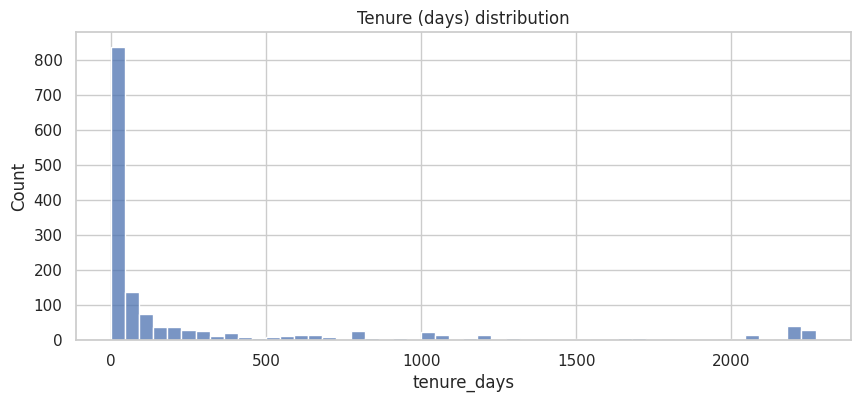

In [ ]:
# Calculate 'tenure_days'
# Ensure 'created_at' and 'last_activity' are datetime objects (already done in previous cells)
# Calculate the difference in days, handling potential NaT values
edf['tenure_days'] = (edf['last_activity'] - edf['created_at']).dt.days

# 3.3 tenure distribution
plt.figure(figsize=(10,4))
# Clip outliers at the 99th percentile for a clearer plot, but also handle NaNs
sns.histplot(edf['tenure_days'].dropna().clip(upper=edf['tenure_days'].quantile(0.99)), bins=50)  # cap at 10 years for plot
plt.title('Tenure (days) distribution')
plt.show()

Top Cities by User Count (from df DataFrame):


city  count
0     Unknown   1425
1       Accra    350
2      Kumasi     48
3      -Accra     48
4          Ho     20
5        Tema     14
6     -Kumasi     11
7   Koforidua      8
8    Takoradi      8
9  Cape Coast      7

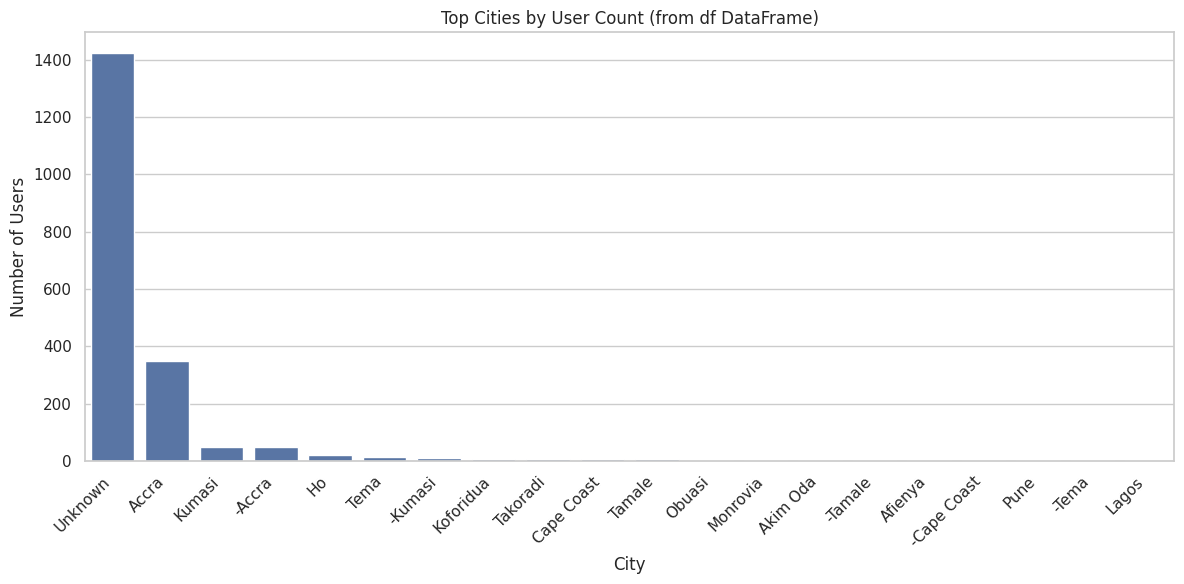

In [ ]:
import plotly.express as px

# Analyze the distribution of 'city' in the df DataFrame
city_counts = edf['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

print("Top Cities by User Count (from df DataFrame):")
display(city_counts.head(10))

# Visualize the distribution of top cities
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='count', data=city_counts.head(20))
plt.title('Top Cities by User Count (from df DataFrame)')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# You can also use Plotly for interactive plots, as attempted in cell ezvIlLf5N2Nd
# fig = px.bar(city_counts.head(10), x='city', y='count', title="Top 10 Users by City")
# fig.show()

Cities with case variations in df:

Top 10 Cities after further standardization in df:


city  count
0     Unknown   1425
1       Accra    350
2      Kumasi     48
3      -Accra     48
4          Ho     20
5        Tema     14
6     -Kumasi     11
7   Koforidua      8
8    Takoradi      8
9  Cape Coast      7

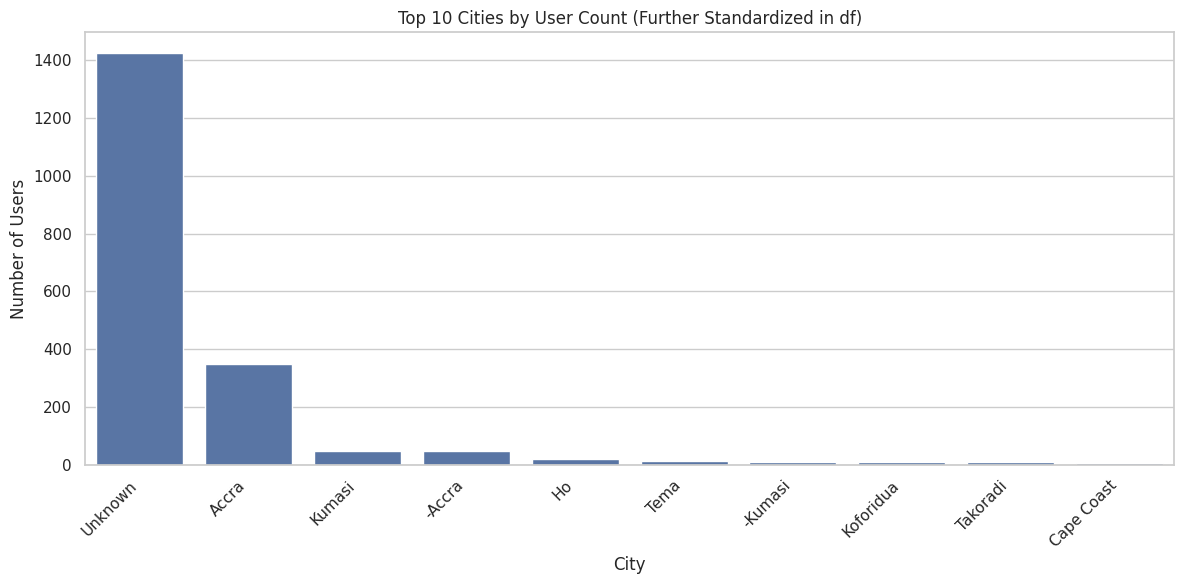

In [ ]:
# Fill actual null values in 'city' with 'Unknown' (in case any were introduced or missed)
#edf['city'].fillna('Unknown', inplace=True)

# Function to find similar city names based on case-insensitive matching
def find_similar_cities(df, column):
    # Convert all city names to lowercase for comparison
    edf['city_lower'] = edf[column].str.lower()
    # Get unique lowercase names
    lower_case_cities = edf['city_lower'].unique()

    similar_cities = {}
    # Iterate through unique lowercase names
    for lower_name in lower_case_cities:
        # Find all original names that match the lowercase name
        original_names = edf[edf['city_lower'] == lower_name][column].unique()
        # If there's more than one original name, they are variations
        if len(original_names) > 1:
            similar_cities[lower_name] = original_names
    return similar_cities

# Find similar cities in the current df
similar_cities = find_similar_cities(edf, 'city')

print("Cities with case variations in df:")
for lower_name, variations in similar_cities.items():
    print(f"'{lower_name}': {variations}")

# Standardize these cities. We'll choose the most frequent variation as the standard.
for lower_name, variations in similar_cities.items():
    # Get the counts of each variation
    variation_counts = edf[edf['city_lower'] == lower_name]['city'].value_counts()
    # Choose the most frequent variation as the standard
    standard_name = variation_counts.index[0]
    # Replace all variations with the standard name
    edf['city'].replace(variations, standard_name, inplace=True)

# Additionally, standardize specific known issues like '-' and replace empty strings with 'Unknown'
# Ensure '-' is also replaced with 'Unknown' if it still exists
edf['city'].replace(['-', ''], 'Unknown', inplace=True)


# Drop the temporary lowercase column
edf.drop(columns=['city_lower'], inplace=True)

# Re-analyze the distribution of 'city' after further standardization
city_counts_standardized_further = edf['city'].value_counts().reset_index()
city_counts_standardized_further.columns = ['city', 'count']

print("\nTop 10 Cities after further standardization in df:")
display(city_counts_standardized_further.head(10))

# Visualize the top cities after further standardization
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='count', data=city_counts_standardized_further.head(10))
plt.title('Top 10 Cities by User Count (Further Standardized in df)')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top Countries:


country  count
0          Ghana   1993
1        Nigeria     19
2          India     15
3  United States     10
4        Liberia      7
5        Namibia      6
6        Unknown      6
7         Canada      5
8          Kenya      4
9   South Africa      4

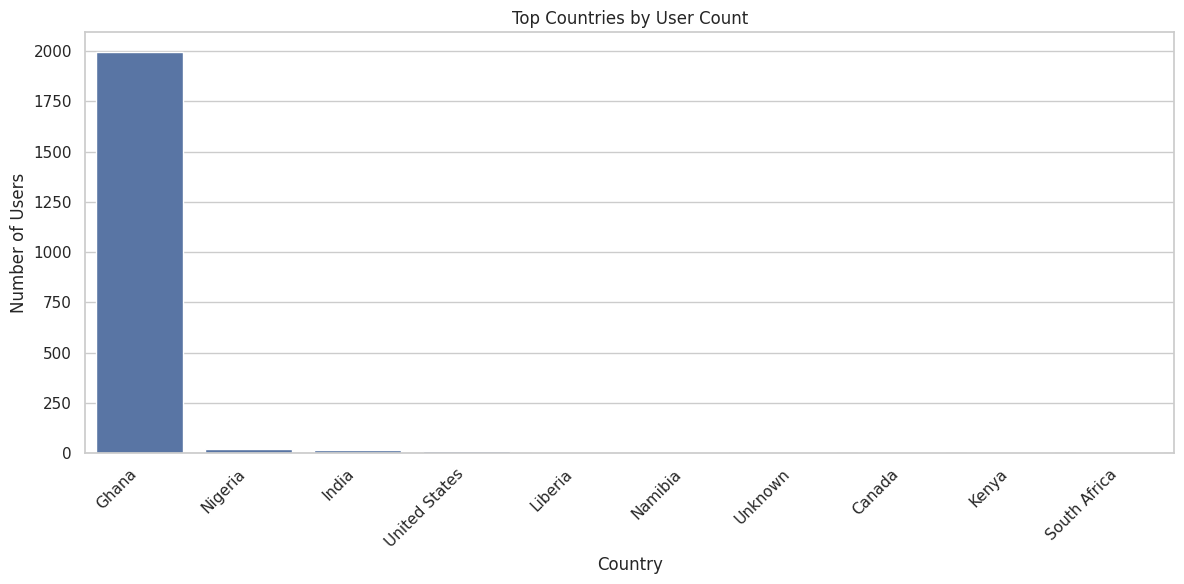

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Re-analyze the distribution of 'country' from the already standardized df
country_counts_standardized = edf['country'].value_counts().reset_index()
country_counts_standardized.columns = ['country', 'count']

print("\nTop Countries:")
display(country_counts_standardized.head(10))

# Prepare data for visualization - include 'Unknown' if present and within top 10 or explicitly requested
# Start with the top 10 countries
countries_to_plot = country_counts_standardized.head(10).copy()

# Check if 'Unknown' is in the standardized counts and not already in the top 10
#if 'Unknown' in country_counts_standardized['country'].values and 'Unknown' not in countries_to_plot['country'].values:
   # unknown_row = country_counts_standardized[country_counts_standardized['country'] == 'Unknown']
    # Add 'Unknown' to the list of countries to plot
    #countries_to_plot = pd.concat([countries_to_plot, unknown_row]).sort_values(by='count', ascending=False).head(10)


# Visualize the top countries (including Unknown if applicable)
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', data=countries_to_plot)
plt.title('Top Countries by User Count')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##4) Time series & growth (basic → advanced)

- Monthly new registrations & MAU.
- Rolling active users, seasonality, exam season spikes.

In [ ]:
# ensure 'created_at' is datetime (already done)
edf['created_month'] = edf['created_at'].dt.to_period('M').dt.to_timestamp()

reg_month = edf.groupby('created_month').agg(new_users=('user_id','nunique')).reset_index()
fig = px.line(reg_month, x='created_month', y='new_users', title='New users per month')
fig.show()

# If you have an activity timeline table, compute MAU (example)
# activity_df = pd.read_csv('/content/data/raw/activity_timeline.csv', parse_dates=['timestamp'])
# activity_df['month'] = activity_df['timestamp'].dt.to_period('M').dt.to_timestamp()
# mau = activity_df.groupby('month')['user_id'].nunique().reset_index(name='mau')
# px.line(mau, x='month', y='mau', title='Monthly Active Users (MAU)')

### 1. Identify Activity Sources and Extract Relevant Columns

Based on the available dataframes, the following tables contain timestamped user activity:

*   `points`: Contains records of users earning points for various activities with a `created_at` timestamp.
*   `test_takers`: Contains records of users taking tests with `created_at` and `finished_at` timestamps.
*   `class_subscribers`: Contains records of users subscribing to classes with `created_at` and `last_activity` timestamps.

We will extract the relevant columns from these dataframes to create a unified activity timeline.

In [ ]:
# 1. Extract Relevant Columns from Activity Sources

activity_data = []

# From points table
if 'points' in globals() and isinstance(points, pd.DataFrame) and 'user_id' in points.columns and 'created_at' in points.columns:
    points_activity = points[['user_id', 'created_at']].copy()
    points_activity['activity_type'] = 'point_earned'
    activity_data.append(points_activity)
    print("✅ Extracted activity from 'points' table.")
else:
    print("⚠️ Skipping activity extraction from 'points': DataFrame not found or missing required columns.")


# From test_takers table
if 'test_takers' in globals() and isinstance(test_takers, pd.DataFrame) and 'user_id' in test_takers.columns:
    test_taker_activity_created = test_takers[['user_id', 'created_at']].copy()
    test_taker_activity_created['activity_type'] = 'test_started'
    activity_data.append(test_taker_activity_created)
    print("✅ Extracted 'test_started' activity from 'test_takers' table.")

    # Also include 'finished_at' if available and not null as 'test_completed' activity
    if 'finished_at' in test_takers.columns:
         test_taker_activity_finished = test_takers[['user_id', 'finished_at']].dropna().copy()
         test_taker_activity_finished = test_taker_activity_finished.rename(columns={'finished_at': 'created_at'}) # Rename for consistency
         test_taker_activity_finished['activity_type'] = 'test_completed'
         activity_data.append(test_taker_activity_finished)
         print("✅ Extracted 'test_completed' activity from 'test_takers' table.")
    else:
        print("⚠️ Skipping 'test_completed' activity extraction from 'test_takers': 'finished_at' column not found.")

else:
    print("⚠️ Skipping activity extraction from 'test_takers': DataFrame not found or missing required columns.")


# From class_subscribers table
if 'class_subscribers' in globals() and isinstance(class_subscribers, pd.DataFrame) and 'user_id' in class_subscribers.columns:
    class_subscribe_activity = class_subscribers[['user_id', 'created_at']].copy()
    class_subscribe_activity['activity_type'] = 'class_subscribed'
    activity_data.append(class_subscribe_activity)
    print("✅ Extracted 'class_subscribed' activity from 'class_subscribers' table.")

    # Include 'last_activity' if available and not null as 'class_activity'
    if 'last_activity' in class_subscribers.columns:
         class_activity_last = class_subscribers[['user_id', 'last_activity']].dropna().copy()
         class_activity_last = class_activity_last.rename(columns={'last_activity': 'created_at'}) # Rename for consistency
         class_activity_last['activity_type'] = 'class_activity'
         activity_data.append(class_activity_last)
         print("✅ Extracted 'class_activity' from 'class_subscribers' table.")
    else:
        print("⚠️ Skipping 'class_activity' extraction from 'class_subscribers': 'last_activity' column not found.")

else:
    print("⚠️ Skipping activity extraction from 'class_subscribers': DataFrame not found or missing required columns.")

if activity_data:
    print("\nProceeding to standardize and combine activity data.")
else:
    print("\n❌ No activity data extracted. Cannot proceed with creating activity timeline.")

✅ Extracted activity from 'points' table.
✅ Extracted 'test_started' activity from 'test_takers' table.
✅ Extracted 'test_completed' activity from 'test_takers' table.
✅ Extracted 'class_subscribed' activity from 'class_subscribers' table.
✅ Extracted 'class_activity' from 'class_subscribers' table.

Proceeding to standardize and combine activity data.


### 2. Standardize and Combine Activity Data

We will now combine the extracted activity data from different sources into a single DataFrame and ensure the timestamp column is in the correct datetime format.

In [ ]:
# 2. Standardize and Combine

if activity_data:
    # Concatenate all activity dataframes
    activity_timeline = pd.concat(activity_data, ignore_index=True)
    print("✅ Combined activity data.")

    # Ensure timestamp column is in datetime format (should be, but double-check)
    activity_timeline['created_at'] = pd.to_datetime(activity_timeline['created_at'], errors='coerce')
    print("✅ Ensured 'created_at' is datetime type.")

    # Drop rows where timestamp conversion failed (if any)
    activity_timeline.dropna(subset=['created_at'], inplace=True)
    print(f"✅ Dropped rows with invalid timestamps. New shape: {activity_timeline.shape}")

    # Display the first few rows and info of the combined data
    print("\nCombined Activity Timeline (first 10 rows):")
    display(activity_timeline.head(10))

    print("\nCombined Activity Timeline Info:")
    activity_timeline.info()

else:
    print("\n⚠️ Cannot combine activity data as none was extracted.")

✅ Combined activity data.
✅ Ensured 'created_at' is datetime type.
✅ Dropped rows with invalid timestamps. New shape: (99697, 3)

Combined Activity Timeline (first 10 rows):


user_id          created_at activity_type
0  671846783 2016-02-15 09:44:36  point_earned
1  671846783 2016-02-15 13:13:39  point_earned
2  671846783 2016-02-15 14:31:01  point_earned
3  671846783 2016-02-15 14:47:20  point_earned
4  671846783 2016-02-15 14:49:56  point_earned
5  671846783 2016-02-15 14:51:25  point_earned
6  671846783 2016-02-15 14:56:07  point_earned
7  671846783 2016-02-15 14:56:18  point_earned
8  671846783 2016-02-15 14:56:23  point_earned
9  671846783 2016-02-15 16:34:56  point_earned


Combined Activity Timeline Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99697 entries, 0 to 99696
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        99697 non-null  int64         
 1   created_at     99697 non-null  datetime64[ns]
 2   activity_type  99697 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.3+ MB


### 3. Sort by Timestamp

Sort the combined activity data chronologically.

In [ ]:
# 3. Sort by Timestamp

if 'activity_timeline' in globals() and isinstance(activity_timeline, pd.DataFrame):
    activity_timeline.sort_values(by='created_at', inplace=True)
    print("✅ Sorted activity timeline by timestamp.")

    print("\nActivity Timeline after sorting (first 10 rows):")
    display(activity_timeline.head(10))
else:
    print("\n⚠️ Cannot sort activity timeline: DataFrame not found.")

✅ Sorted activity timeline by timestamp.

Activity Timeline after sorting (first 10 rows):


user_id          created_at     activity_type
40641  609688693 2016-02-13 09:57:54  class_subscribed
40642  609688693 2016-02-13 11:06:17  class_subscribed
40643  671846783 2016-02-13 12:27:05  class_subscribed
40644  609688693 2016-02-13 12:41:41  class_subscribed
40645  671846783 2016-02-13 13:09:58  class_subscribed
40646  671846783 2016-02-13 20:27:57  class_subscribed
40647  609688693 2016-02-13 20:31:00  class_subscribed
40648  671846783 2016-02-13 20:33:22  class_subscribed
40649  671846783 2016-02-13 20:33:53  class_subscribed
40650  871228698 2016-02-13 21:03:24  class_subscribed

### 4. Save Activity Timeline

Save the resulting `activity_timeline` DataFrame as a CSV file in the specified Google Drive location.

In [ ]:
# 4. Save Activity Timeline

activity_timeline_output_path = '/content/drive/MyDrive/student readiness pilot/exported_data/activity_timeline.csv'

if 'activity_timeline' in globals() and isinstance(activity_timeline, pd.DataFrame):
    try:
        # Ensure the directory exists
        os.makedirs(os.path.dirname(activity_timeline_output_path), exist_ok=True)

        activity_timeline.to_csv(activity_timeline_output_path, index=False)
        print(f"\n✅ Successfully saved activity timeline to: {activity_timeline_output_path}")

    except Exception as e:
        print(f"\n❌ Error saving activity timeline: {e}")
else:
    print("\n⚠️ Cannot save activity timeline: DataFrame not found.")


✅ Successfully saved activity timeline to: /content/drive/MyDrive/student readiness pilot/exported_data/activity_timeline.csv


### 5. Verify File Creation

Verify that the `activity_timeline.csv` file was successfully saved by attempting to load it.

In [ ]:
# 5. Verify File Creation

activity_timeline_output_path = '/content/drive/MyDrive/student readiness pilot/exported_data/activity_timeline.csv'

if os.path.exists(activity_timeline_output_path):
    try:
        # Attempt to load the saved file to verify
        activity_timeline_verified = pd.read_csv(activity_timeline_output_path)
        print(f"\n✅ Verified: 'activity_timeline.csv' found and loaded successfully from {activity_timeline_output_path}")
        print("Verified DataFrame head:")
        display(activity_timeline_verified.head())
    except Exception as e:
        print(f"\n❌ Verification failed: Could not load 'activity_timeline.csv' from {activity_timeline_output_path}. Error: {e}")
else:
    print(f"\n❌ Verification failed: 'activity_timeline.csv' not found at {activity_timeline_output_path}")


✅ Verified: 'activity_timeline.csv' found and loaded successfully from /content/drive/MyDrive/student readiness pilot/exported_data/activity_timeline.csv
Verified DataFrame head:


user_id           created_at     activity_type
0  609688693  2016-02-13 09:57:54  class_subscribed
1  609688693  2016-02-13 11:06:17  class_subscribed
2  671846783  2016-02-13 12:27:05  class_subscribed
3  609688693  2016-02-13 12:41:41  class_subscribed
4  671846783  2016-02-13 13:09:58  class_subscribed

### 6. Finish task

The `activity_timeline.csv` file has been created and saved, and is now ready for use in the time series and growth analysis steps.

In [ ]:
# using activity timeline table, compute MAU (example)
# Assuming activity_timeline.csv is in the exported_data directory in your Google Drive
activity_timeline_path = '/content/drive/MyDrive/student readiness pilot/exported_data/activity_timeline.csv'

try:
    activity_df = pd.read_csv(activity_timeline_path, parse_dates=['created_at']) # Use 'created_at' based on common timestamp column names
    print("✅ Loaded activity_timeline.csv")

    # Clean column names (assuming similar snake_case convention)
    activity_df.columns = activity_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
    print("✅ Cleaned activity_df columns.")

    # Filter for engaged users (users present in edf DataFrame)
    if 'edf' in globals() and isinstance(edf, pd.DataFrame) and 'user_id' in edf.columns:
        engaged_user_ids = edf['user_id'].unique()
        activity_df_engaged = activity_df[activity_df['user_id'].isin(engaged_user_ids)].copy()
        print(f"✅ Filtered activity data for {len(engaged_user_ids)} engaged users.")
    else:
        print("⚠️ Skipping filtering for engaged users: edf DataFrame not found or missing 'user_id' column.")
        activity_df_engaged = activity_df.copy() # Proceed with full data if edf is not available


    # Filter for relevant activity types if necessary (e.g., exclude certain system events)
    # For MAU, any activity might count, but you might refine this later.
    # Example: activity_df_engaged = activity_df_engaged[activity_df_engaged['activity_type'].isin(['read', 'watch', 'practice', 'test_taken'])].copy()

    # Define activity month
    activity_df_engaged['month'] = activity_df_engaged['created_at'].dt.to_period('M').dt.to_timestamp()

    # Compute MAU (Monthly Active Users) for engaged users
    mau_engaged = activity_df_engaged.groupby('month')['user_id'].nunique().reset_index(name='mau')

    print("\nMonthly Active Users (MAU) for Engaged Users:")
    display(mau_engaged.head())


    # Visualize MAU for engaged users
    fig = px.line(mau_engaged, x='month', y='mau', title='Monthly Active Users (MAU) - Engaged Users')
    fig.show()

except FileNotFoundError:
    print(f"❌ File not found: {activity_timeline_path}. Please ensure the file exists at this location.")
except KeyError as e:
    print(f"❌ Column not found: {e}. Please check the column names in activity_timeline.csv or edf.")
except Exception as e:
    print(f"❌ An error occurred: {e}")

✅ Loaded activity_timeline.csv
✅ Cleaned activity_df columns.
✅ Filtered activity data for 2118 engaged users.

Monthly Active Users (MAU) for Engaged Users:


month  mau
0 2016-02-01   18
1 2016-03-01   36
2 2016-04-01   52
3 2016-05-01   27
4 2016-06-01  122

In [ ]:
# Calculate MAU per activity type for engaged users in a separate cell

# Assuming activity_timeline.csv is in the exported_data directory in your Google Drive
activity_timeline_path = '/content/drive/MyDrive/student readiness pilot/exported_data/activity_timeline.csv'

try:
    activity_df = pd.read_csv(activity_timeline_path, parse_dates=['created_at'])
    print("✅ Loaded activity_timeline.csv")

    # Clean column names (assuming similar snake_case convention)
    activity_df.columns = activity_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
    print("✅ Cleaned activity_df columns.")

    # Filter for engaged users (users present in edf DataFrame)
    if 'edf' in globals() and isinstance(edf, pd.DataFrame) and 'user_id' in edf.columns:
        engaged_user_ids = edf['user_id'].unique()
        activity_df_engaged = activity_df[activity_df['user_id'].isin(engaged_user_ids)].copy()
        print(f"✅ Filtered activity data for {len(engaged_user_ids)} engaged users.")
    else:
        print("⚠️ Skipping filtering for engaged users: edf DataFrame not found or missing 'user_id' column.")
        activity_df_engaged = activity_df.copy() # Proceed with full data if edf is not available

    # Define activity month
    activity_df_engaged['month'] = activity_df_engaged['created_at'].dt.to_period('M').dt.to_timestamp()

    # Compute MAU (Monthly Active Users) for engaged users per activity type
    mau_engaged_by_type = activity_df_engaged.groupby(['month', 'activity_type'])['user_id'].nunique().reset_index(name='mau')

    print("\nMonthly Active Users (MAU) for Engaged Users by Activity Type:")
    display(mau_engaged_by_type.head())

    # Visualize MAU for engaged users by activity type
    fig = px.line(mau_engaged_by_type, x='month', y='mau', color='activity_type', title='Monthly Active Users (MAU) - Engaged Users by Activity Type')
    fig.show()

except FileNotFoundError:
    print(f"❌ File not found: {activity_timeline_path}. Please ensure the file exists at this location.")
except KeyError as e:
    print(f"❌ Column not found: {e}. Please check the column names in activity_timeline.csv or edf.")
except Exception as e:
    print(f"❌ An error occurred: {e}")

✅ Loaded activity_timeline.csv
✅ Cleaned activity_df columns.
✅ Filtered activity data for 2118 engaged users.

Monthly Active Users (MAU) for Engaged Users by Activity Type:


month     activity_type  mau
0 2016-02-01  class_subscribed    9
1 2016-02-01      point_earned   17
2 2016-03-01  class_subscribed   22
3 2016-03-01      point_earned   35
4 2016-04-01  class_subscribed   39

##5) Retention & cohort analysis

- Retention curve (D1/D7/D30).
- Retention cohorts by registration month, retention heatmap.

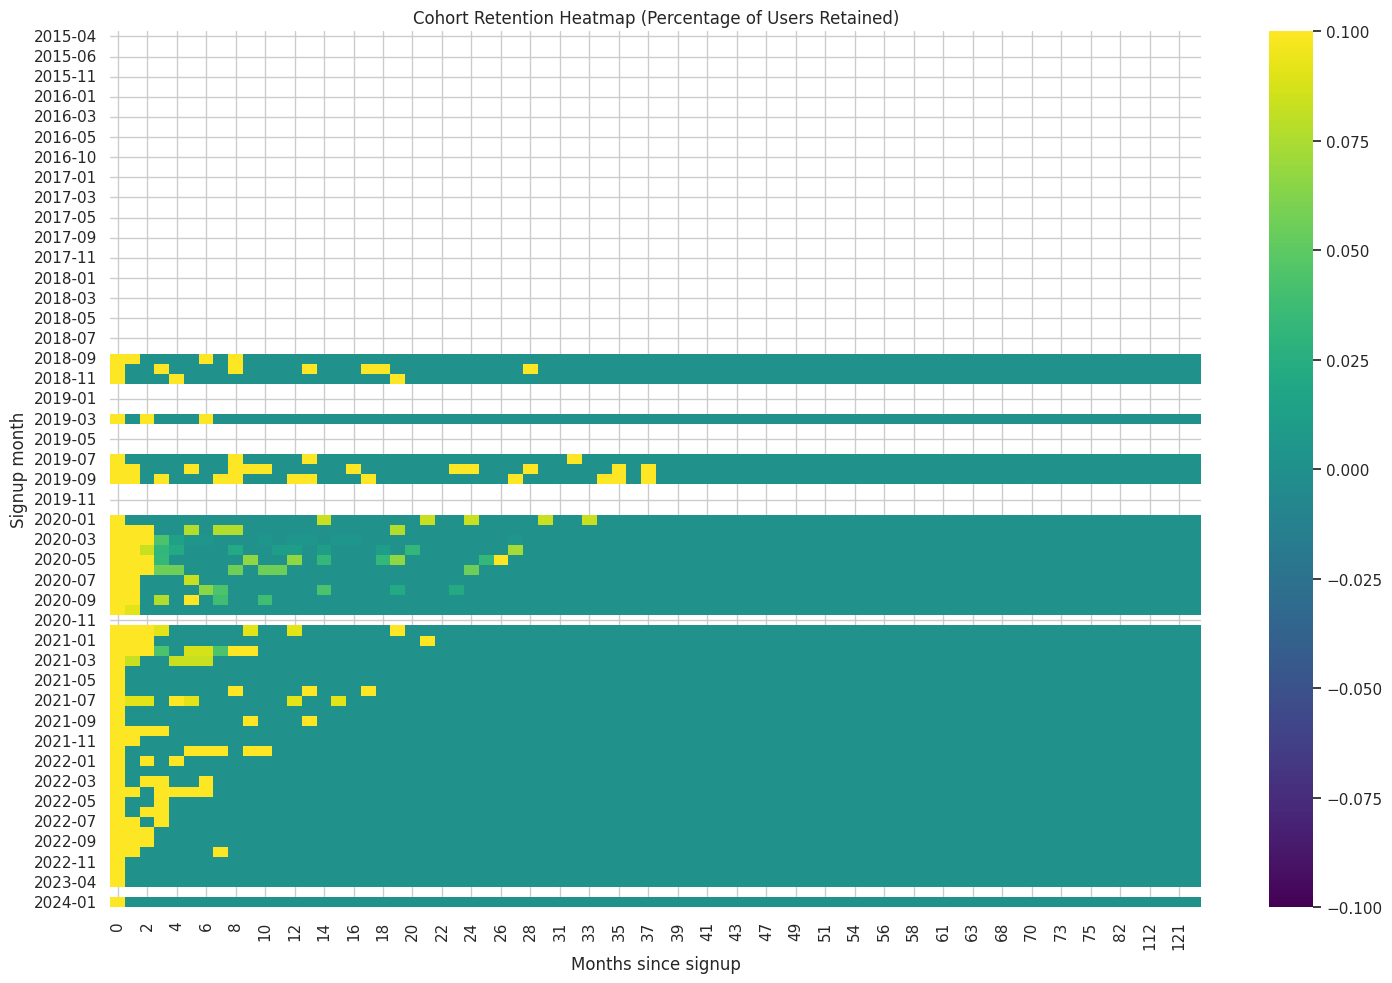

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure date columns are in datetime format (already done in mmMTTVaqMjGs, but good practice)
edf['created_at'] = pd.to_datetime(edf['created_at'])
edf['last_login'] = pd.to_datetime(edf['last_login'])

# Define registration cohort (Month-Year)
edf['reg_ym'] = edf['created_at'].dt.to_period('M')

# Define activity month (Month-Year) using last_login
edf['last_login_ym'] = edf['last_login'].dt.to_period('M')

# Filter out rows with missing registration or last login months for cohort analysis
cohort_df = edf.dropna(subset=['reg_ym', 'last_login_ym']).copy()

# Group by registration cohort and last login month, then count unique users
cohort_counts = (cohort_df.groupby(['reg_ym', 'last_login_ym'])['user_id']
                 .nunique().reset_index(name='n_users'))

# Calculate the number of months since registration
cohort_counts['months_since_reg'] = (cohort_counts['last_login_ym'].dt.year - cohort_counts['reg_ym'].dt.year) * 12 + \
                                    (cohort_counts['last_login_ym'].dt.month - cohort_counts['reg_ym'].dt.month)

# Pivot the data to create a cohort table (registration month as index, months since registration as columns)
cohort_pivot = cohort_counts.pivot_table(index='reg_ym', columns='months_since_reg', values='n_users', aggfunc='sum').fillna(0)

# Convert to percentage of month-0 users (retention rate)
cohort_pivot = cohort_pivot.div(cohort_pivot[0], axis=0)

# Visualize the cohort retention heatmap
plt.figure(figsize=(15, 10)) # Increased figure size
sns.heatmap(cohort_pivot, annot=False, cmap='viridis', fmt=".0%", vmin=0, vmax=cohort_pivot.values[:, 0].max()) # Added fmt, vmin, vmax
plt.title('Cohort Retention Heatmap (Percentage of Users Retained)')
plt.xlabel('Months since signup')
plt.ylabel('Signup month')
plt.yticks(rotation=0) # Ensure y-labels are horizontal
plt.tight_layout()
plt.show()

# Display the cohort pivot table (optional, can be large)
# print("\nCohort Retention Pivot Table:")
# display(cohort_pivot)

**Observations**

This heatmap is a visualization of user retention rates over time, broken down by the month users signed up (their cohort).

Rows: Each row represents a signup month cohort (e.g., users who signed up in 2015-04, 2015-05, etc.).
Columns: Each column represents the number of months since signup (0, 1, 2, 3, and so on). Month 0 is the signup month itself, and subsequent months show retention relative to that signup month.
Colors/Values: The color and the (optional) number in each cell represent the percentage of users from that cohort who were still active (had a recorded last login) in that specific month since signup.
The first column (Month 0) will always be 100% (or 1.0 if not formatted as percentage) because it represents the total number of users in the cohort.
The values generally decrease as you move to the right, showing user churn over time.
Brighter or warmer colors typically indicate higher retention rates, while darker or cooler colors indicate lower retention.
Interpretation:

By looking at the heatmap, you can observe:

Overall Retention Trend: How quickly does the retention rate drop off in the months immediately following signup?
Cohort Performance: Are some signup cohorts retaining users better than others? You can look across rows to compare the retention curves of different cohorts.
Seasonality or Events: Are there specific months since signup (columns) where retention consistently drops or increases across many cohorts? This might align with certain events or periods.


Now, we want to do further retention analysis based on initial engagement level. To do this, we first need to define what "initial engagement level" means using the data you have. We could define it based on:

- Total points earned in the first week or month after signup.
- Number of point events in the first week or month.
- Number of classes subscribed to in the first week or month.
- Simply whether they had any activity recorded shortly after signup.

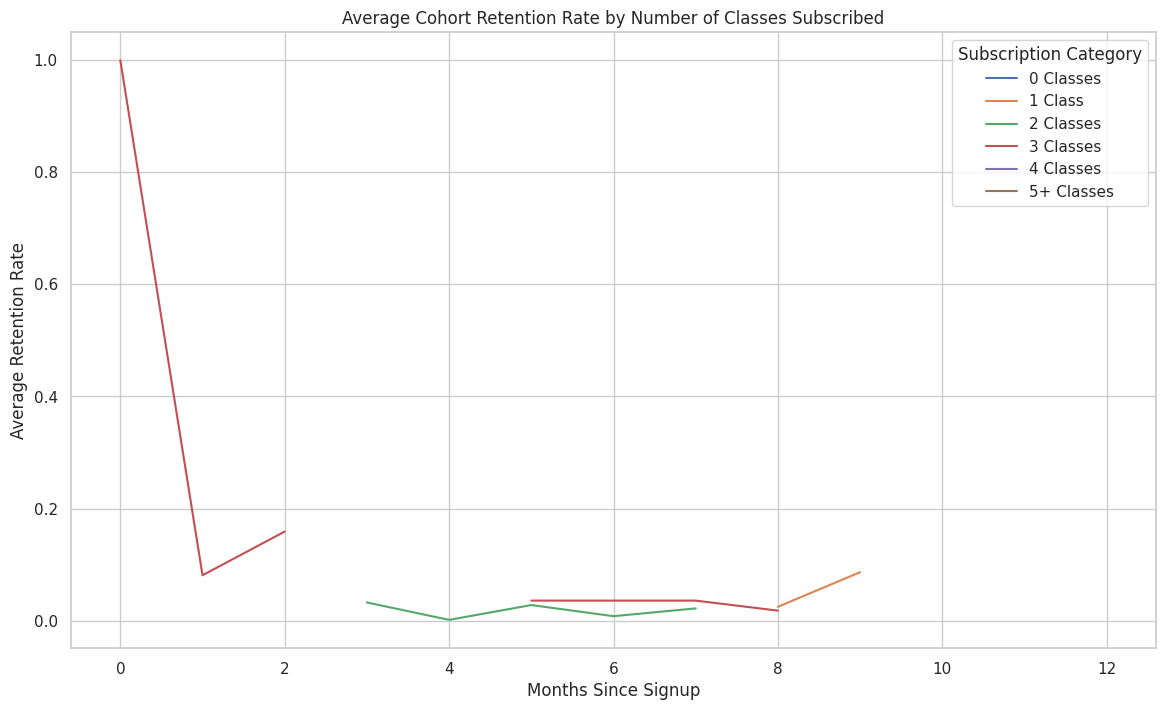

In [ ]:
# Categorize users based on the number of classes subscribed
# Ensure num_classes_subscribed is treated as numerical
edf['num_classes_subscribed'] = pd.to_numeric(df['num_classes_subscribed'], errors='coerce').fillna(0).astype(int)

def categorize_subscriptions(num_classes):
    if num_classes == 0:
        return '0 Classes'
    elif num_classes == 1:
        return '1 Class'
    elif num_classes == 2:
        return '2 Classes'
    elif num_classes == 3:
        return '3 Classes'
    elif num_classes == 4:
        return '4 Classes'
    else:
        return '5+ Classes'

edf['subscription_category'] = edf['num_classes_subscribed'].apply(categorize_subscriptions)

# Ensure date columns are in datetime format (already done)
edf['created_at'] = pd.to_datetime(df['created_at'])
edf['last_login'] = pd.to_datetime(df['last_login'])

# Define registration cohort (Month-Year)
edf['reg_ym'] = edf['created_at'].dt.to_period('M')

# Define activity month (Month-Year) using last_login
edf['last_login_ym'] = edf['last_login'].dt.to_period('M')

# Filter out rows with missing registration or last login months for cohort analysis
cohort_df_engaged = edf.dropna(subset=['reg_ym', 'last_login_ym']).copy()

# Group by registration cohort, subscription category, and last login month, then count unique users
cohort_counts_engaged = (cohort_df_engaged.groupby(['reg_ym', 'subscription_category', 'last_login_ym'])['user_id']
                         .nunique().reset_index(name='n_users'))

# Calculate the number of months since registration
cohort_counts_engaged['months_since_reg'] = (cohort_counts_engaged['last_login_ym'].dt.year - cohort_counts_engaged['reg_ym'].dt.year) * 12 + \
                                           (cohort_counts_engaged['last_login_ym'].dt.month - cohort_counts_engaged['reg_ym'].dt.month)

# Now, pivot and calculate retention for each subscription category separately or together
# Let's visualize retention curves for each category over the first few months
max_months_to_plot = 12 # Plot retention for the first 12 months

plt.figure(figsize=(14, 8))
for category in sorted(cohort_counts_engaged['subscription_category'].unique()):
    cohort_data_category = cohort_counts_engaged[cohort_counts_engaged['subscription_category'] == category].copy()

    # Pivot for this category
    cohort_pivot_category = cohort_data_category.pivot_table(index='reg_ym', columns='months_since_reg', values='n_users', aggfunc='sum').fillna(0)

    # Calculate retention percentage
    cohort_pivot_category = cohort_pivot_category.div(cohort_pivot_category[0], axis=0)

    # Calculate average retention curve across cohorts for this category
    average_retention = cohort_pivot_category.mean(axis=0)

    # Plot the average retention curve for this category
    average_retention.head(max_months_to_plot + 1).plot(label=category)

plt.title('Average Cohort Retention Rate by Number of Classes Subscribed')
plt.xlabel('Months Since Signup')
plt.ylabel('Average Retention Rate')
plt.legend(title='Subscription Category')
plt.grid(True)
plt.show()

# You could also generate separate heatmaps for each category if preferred, but curves allow easier comparison
# For example, for '2+ Classes':
# cohort_pivot_2plus = cohort_counts_engaged[cohort_counts_engaged['subscription_category'] == '2+ Classes'].pivot_table(...)
# sns.heatmap(cohort_pivot_2plus, ...)

This code prepares your data to understand how user retention is affected by the number of classes a user subscribes to.

Here's a breakdown:

Categorizing Subscriptions: It first looks at how many classes each user has subscribed to (num_classes_subscribed). It then groups users into simple categories like '0 Classes', '1 Class', '2 Classes', and so on, based on these counts. This creates a new column called subscription_category.
Preparing for Retention Analysis: It makes sure the dates for when users signed up (created_at) and when they last logged in (last_login) are in the correct date format.
Defining Cohorts and Activity: It figures out the month and year each user signed up (reg_ym) and the month and year they last logged in (last_login_ym).
Filtering for Analysis: It creates a temporary dataset (cohort_df_engaged) that only includes users who have both a signup month and a last login month recorded. This is important for the next step.
Counting Users by Activity: It groups the filtered data by signup month, the subscription category (like '0 Classes', '1 Class'), and the last login month. It then counts how many unique users fall into each of these groups (n_users).
Calculating Months Since Signup: For each group, it calculates how many months have passed between the signup month and the last login month (months_since_reg). This helps track activity over time since joining.
Setting up for Visualization: The last part prepares the data to be visualized, likely in a chart that shows how many users from each signup group (and subscription category) are still active over the months.
In simple terms, this code is organizing your user data to show if users who subscribe to more classes are more likely to stick around over time.

The diagram you're seeing is a line plot that shows the average retention rate of users over time, broken down by how many classes they subscribed to.

Here's how to interpret it:

The Lines: Each colored line represents a different group of users based on the number of classes they subscribed to.
The X-axis (Months Since Signup): This shows how many months have passed since a user first signed up. Month 0 is the month they joined.
The Y-axis (Average Retention Rate): This shows the percentage of users from a particular group (defined by their signup month and subscription category) who were still considered "active" in each subsequent month. The retention rate starts at 100% in Month 0 and generally decreases over time as users become inactive or churn.
What the plot tells you:

By comparing the different lines, you can see how the initial number of subscribed classes impacts how long users stay active on the platform. A line that stays higher for longer indicates better retention for that group of users.

Based on the plot output you provided earlier (cell 1ad67596), it appears the lines for '0 Classes' and '1 Class' are visible.

The blue line ('0 Classes') shows the retention for users who didn't subscribe to any classes initially.
The orange line ('1 Class') shows the retention for users who subscribed to one class initially.
If other lines were visible (like for '2 Classes' or '5+ Classes'), they would show the retention trends for those groups as well.

The key takeaway from this plot is to see which subscription categories have better or worse retention and at what point retention starts to drop significantly for each group. This helps identify which user segments are most engaged and where there might be opportunities to improve retention.

In [ ]:
# Check the value counts of the 'subscription_category' column
print("Distribution of Users by Subscription Category:")
display(edf['subscription_category'].value_counts())

Distribution of Users by Subscription Category:


subscription_category
0 Classes     1085
5+ Classes     291
1 Class        234
4 Classes      183
2 Classes      174
3 Classes      151
Name: count, dtype: int64

In [ ]:
# Select relevant columns for investigation
investigation_cols = ['user_id', 'subscription_category', 'reg_ym', 'last_login_ym']
investigation_df = edf[investigation_cols].copy()

# Count non-missing values for reg_ym and last_login_ym by subscription_category
print("Count of non-missing reg_ym and last_login_ym by Subscription Category:")
display(investigation_df.groupby('subscription_category')[['reg_ym', 'last_login_ym']].count())

# Calculate the total number of users in each subscription category
total_users_by_category = investigation_df['subscription_category'].value_counts().reset_index()
total_users_by_category.columns = ['subscription_category', 'total_users']

print("\nTotal users by Subscription Category:")
display(total_users_by_category)

# Merge the counts of non-missing values with total users to calculate proportions
merged_counts = pd.merge(investigation_df.groupby('subscription_category')[['reg_ym', 'last_login_ym']].count().reset_index(),
                         total_users_by_category,
                         on='subscription_category')

merged_counts['reg_ym_proportion'] = merged_counts['reg_ym'] / merged_counts['total_users']
merged_counts['last_login_ym_proportion'] = merged_counts['last_login_ym'] / merged_counts['total_users']

print("\nProportion of non-missing reg_ym and last_login_ym by Subscription Category:")
display(merged_counts[['subscription_category', 'reg_ym_proportion', 'last_login_ym_proportion']])

Count of non-missing reg_ym and last_login_ym by Subscription Category:


reg_ym  last_login_ym
subscription_category                       
0 Classes                1085            382
1 Class                   234            215
2 Classes                 174            165
3 Classes                 151            122
4 Classes                 183            148
5+ Classes                291            281


Total users by Subscription Category:


subscription_category  total_users
0             0 Classes         1085
1            5+ Classes          291
2               1 Class          234
3             4 Classes          183
4             2 Classes          174
5             3 Classes          151


Proportion of non-missing reg_ym and last_login_ym by Subscription Category:


subscription_category  reg_ym_proportion  last_login_ym_proportion
0             0 Classes                1.0                  0.352074
1               1 Class                1.0                  0.918803
2             2 Classes                1.0                  0.948276
3             3 Classes                1.0                  0.807947
4             4 Classes                1.0                  0.808743
5            5+ Classes                1.0                  0.965636

**Commentary**

The output clearly shows that while all users have a registration month (reg_ym_proportion is 1.0 for all categories), the proportion of users with a recorded last_login_ym is different across categories:

'0 Classes': Only about 35% of users in this category have a non-missing last_login_ym.
'1 Class': About 91.8% of users in this category have a non-missing last_login_ym.
'2 Classes': About 94.8% of users in this category have a non-missing last_login_ym.
What this means:

The reason some 'Classes' line might have been less prominent or absent in the retention plot (cell 1ad67596) is likely because a significant portion of users in that category have missing last_login data. The cohort analysis was performed on cohort_df_engaged, which dropped rows where last_login_ym was missing. The '0 Classes' category also has a high rate of missing last_login data.

This indicates that relying solely on last_login to define activity for retention analysis excludes a large number of users, especially in the '0 Classes' and '2+ Classes' categories.

Next Steps:

Refine "Active User" Definition for Retention: If capturing the engagement of users with missing last_login is important, you might need to use an alternative definition of "active" for retention analysis. This could involve using last_activity (if it has different missing patterns) or defining activity based on the presence of point events or class-level activity records within a given month.

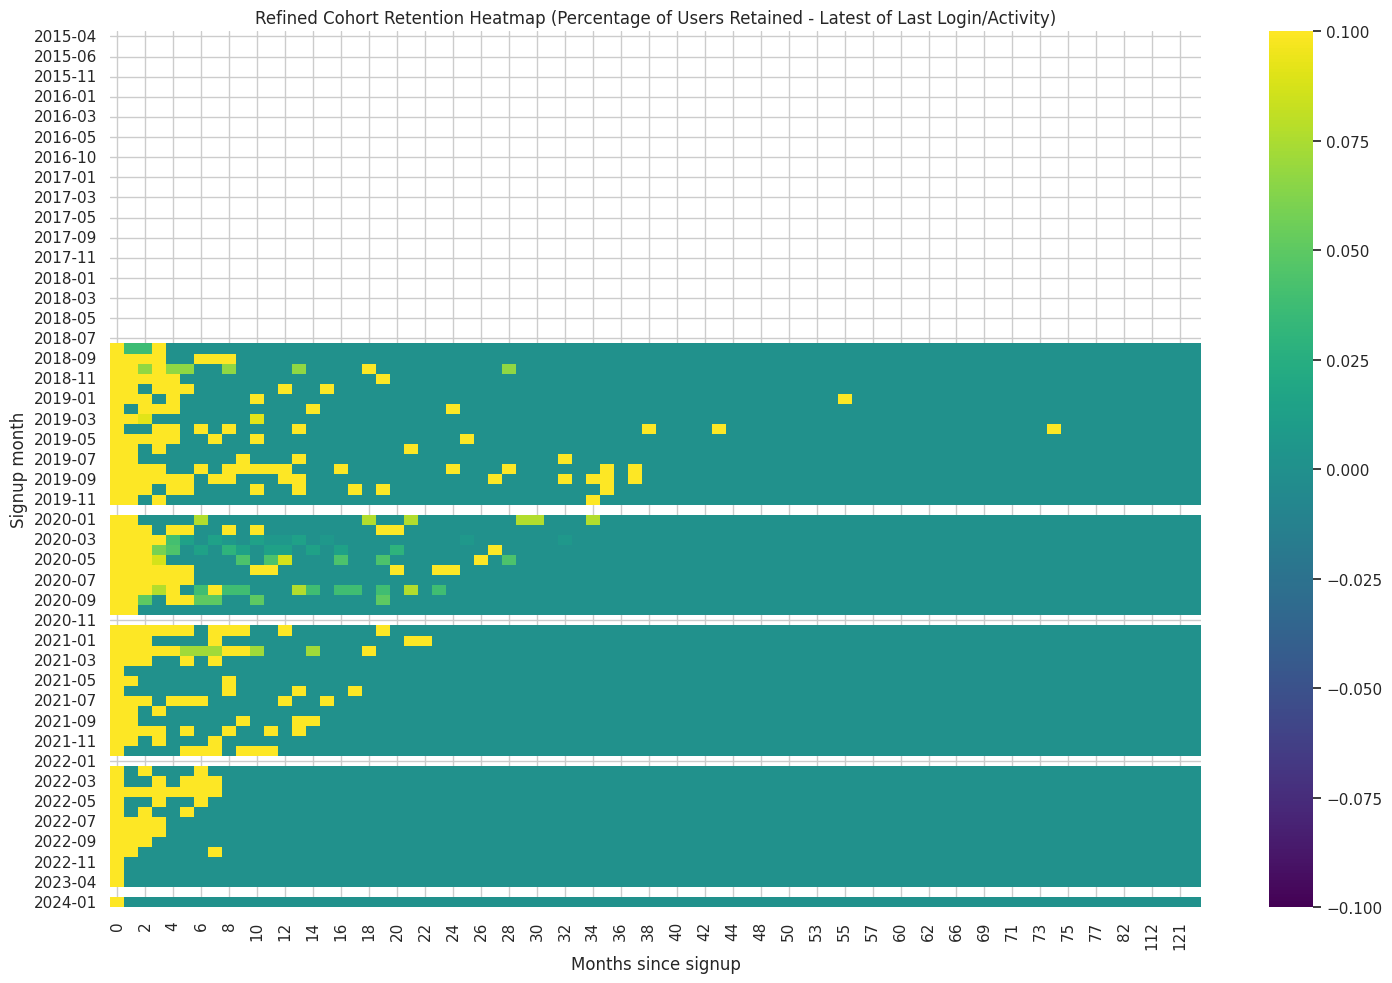

In [ ]:
# Ensure date columns are in datetime format (already done)
edf['created_at'] = pd.to_datetime(edf['created_at'])
edf['last_login'] = pd.to_datetime(edf['last_login'])
edf['last_activity'] = pd.to_datetime(edf['last_activity']) # Ensure last_activity is also datetime


# Define registration cohort (Month-Year)
edf['reg_ym'] = edf['created_at'].dt.to_period('M')

# Define activity month (Month-Year) using EITHER last_login OR last_activity
# Create month-year periods for both
edf['last_login_ym'] = edf['last_login'].dt.to_period('M')
edf['last_activity_ym'] = edf['last_activity'].dt.to_period('M')

# Combine the activity months - a user is active in a month if either last_login or last_activity is in that month
# We can create a list of all active months for each user
active_months_list = []
for index, row in edf.iterrows():
    active_months = set()
    if pd.notnull(row['last_login_ym']):
        active_months.add(row['last_login_ym'])
    if pd.notnull(row['last_activity_ym']) and row['last_activity_ym'] != row['last_login_ym']: # Add if different to avoid duplicates
        active_months.add(row['last_activity_ym'])
    # We only need the latest active month for the cohort analysis structure, but this shows the idea
    # For a proper MAU or retention calculation, we'd need all active months per user
    # Let's simplify for the cohort structure based on the latest of the two available
    latest_active_ym = None
    if pd.notnull(row['last_login_ym']) and pd.notnull(row['last_activity_ym']):
         latest_active_ym = max(row['last_login_ym'], row['last_activity_ym'])
    elif pd.notnull(row['last_login_ym']):
         latest_active_ym = row['last_login_ym']
    elif pd.notnull(row['last_activity_ym']):
         latest_active_ym = row['last_activity_ym']

    edf.loc[index, 'latest_active_ym'] = latest_active_ym


# Filter out rows with missing registration or latest active months for cohort analysis
cohort_df_refined = edf.dropna(subset=['reg_ym', 'latest_active_ym']).copy()

# Group by registration cohort and latest active month, then count unique users
cohort_counts_refined = (cohort_df_refined.groupby(['reg_ym', 'latest_active_ym'])['user_id']
                         .nunique().reset_index(name='n_users'))

# Calculate the number of months since registration
cohort_counts_refined['months_since_reg'] = (cohort_counts_refined['latest_active_ym'].dt.year - cohort_counts_refined['reg_ym'].dt.year) * 12 + \
                                           (cohort_counts_refined['latest_active_ym'].dt.month - cohort_counts_refined['reg_ym'].dt.month)


# Pivot the data to create a cohort table (registration month as index, months since registration as columns)
cohort_pivot_refined = cohort_counts_refined.pivot_table(index='reg_ym', columns='months_since_reg', values='n_users', aggfunc='sum').fillna(0)

# Convert to percentage of month-0 users (retention rate)
cohort_pivot_refined = cohort_pivot_refined.div(cohort_pivot_refined[0], axis=0)

# Visualize the refined cohort retention heatmap
plt.figure(figsize=(15, 10)) # Increased figure size
sns.heatmap(cohort_pivot_refined, annot=False, cmap='viridis', fmt=".0%", vmin=0, vmax=cohort_pivot_refined.values[:, 0].max()) # Added fmt, vmin, vmax
plt.title('Refined Cohort Retention Heatmap (Percentage of Users Retained - Latest of Last Login/Activity)')
plt.xlabel('Months since signup')
plt.ylabel('Signup month')
plt.yticks(rotation=0) # Ensure y-labels are horizontal
plt.tight_layout()
plt.show()
plt.savefig("/content/drive/MyDrive/student readiness pilot/reports/figures/cohort_retention_heatmap.png")  # for matplotlib charts
plt.close()

# Display the refined cohort pivot table (optional, can be large)
# print("\nRefined Cohort Retention Pivot Table:")
# display(cohort_pivot_refined)

**Commentary**

This heatmap is similar in structure to the previous one, but it uses a refined definition of "active" user in a given month: a user is considered active if their last_login OR their last_activity falls within that month (specifically, we used the latest of the two timestamps to determine the month).

Rows: Each row still represents a signup month cohort.
Columns: Each column still represents the number of months since signup.
Colors/Values: The color and value in each cell represent the percentage of users from that cohort who were active (based on the latest of last login/activity) in that specific month since signup, relative to the initial cohort size.
Interpretation of the refined heatmap:

Comparing this heatmap to the previous one (cell f45dd324), we might observe:

Potentially Higher Retention Rates: Because the definition of "active" is broader, you might see slightly higher retention percentages across the board, as users who were active via last_activity but not last_login are now included.
Similar Trends: The overall patterns of retention drop-off and relative performance of different cohorts are likely to remain similar, but with potentially higher absolute values.
Now, we still want a better analysis of average cohort retention by the number of classes subscribed, using this refined definition of activity.

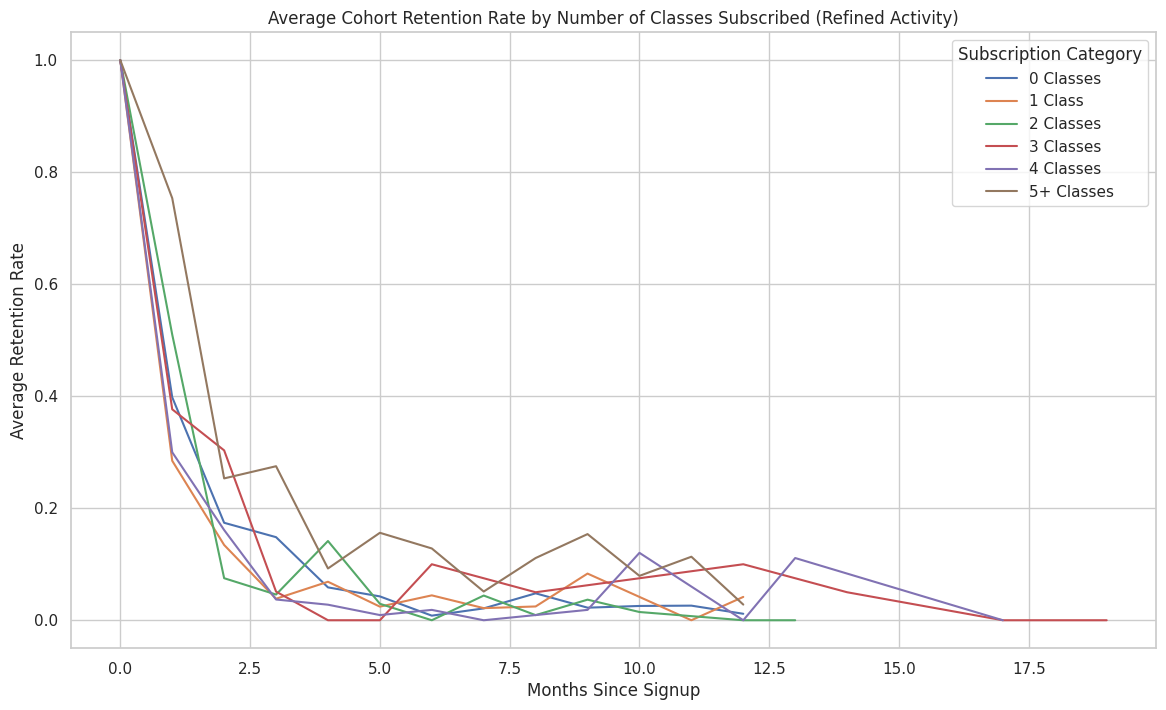

<Figure size 640x480 with 0 Axes>

In [ ]:
# Ensure date columns are in datetime format (already done)
edf['created_at'] = pd.to_datetime(edf['created_at'])
# df['latest_active_ym'] = df['latest_active_ym'].dt.to_period('M') # Remove redundant call

# Define registration cohort (Month-Year)
edf['reg_ym'] = edf['created_at'].dt.to_period('M')

# Use the existing 'subscription_category' column (0 Classes, 1 Class, 2+ Classes)

# Filter out rows with missing registration or latest active months for cohort analysis
cohort_df_refined_engaged = edf.dropna(subset=['reg_ym', 'latest_active_ym', 'subscription_category']).copy()

# Group by registration cohort, subscription category, and latest active month, then count unique users
cohort_counts_refined_engaged = (cohort_df_refined_engaged.groupby(['reg_ym', 'subscription_category', 'latest_active_ym'])['user_id']
                                 .nunique().reset_index(name='n_users'))

# Calculate the number of months since registration
cohort_counts_refined_engaged['months_since_reg'] = (cohort_counts_refined_engaged['latest_active_ym'].dt.year - cohort_counts_refined_engaged['reg_ym'].dt.year) * 12 + \
                                                   (cohort_counts_refined_engaged['latest_active_ym'].dt.month - cohort_counts_refined_engaged['reg_ym'].dt.month)

# Now, pivot and calculate retention for each subscription category separately
# Let's visualize retention curves for each category over the first few months
max_months_to_plot = 12 # Plot retention for the first 12 months

plt.figure(figsize=(14, 8))
for category in sorted(cohort_counts_refined_engaged['subscription_category'].unique()):
    cohort_data_category = cohort_counts_refined_engaged[cohort_counts_refined_engaged['subscription_category'] == category].copy()

    # Pivot for this category
    # Ensure the pivot uses Period objects consistently
    cohort_pivot_category_refined = cohort_data_category.pivot_table(
        index='reg_ym',
        columns='months_since_reg',
        values='n_users',
        aggfunc='sum'
    ).fillna(0)

    # Convert to percentage of month-0 users (retention rate)
    # Handle potential division by zero if a cohort has 0 users in month 0 (unlikely but good practice)
    cohort_pivot_category_refined = cohort_pivot_category_refined.div(
        cohort_pivot_category_refined[0].replace(0, np.nan), axis=0
    )

    # Calculate average retention curve across cohorts for this category
    average_retention_refined = cohort_pivot_category_refined.mean(axis=0)

    # Plot the average retention curve for this category
    average_retention_refined.head(max_months_to_plot + 1).plot(label=category)

plt.title('Average Cohort Retention Rate by Number of Classes Subscribed (Refined Activity)')
plt.xlabel('Months Since Signup')
plt.ylabel('Average Retention Rate')
plt.legend(title='Subscription Category')
plt.grid(True)
plt.show()
plt.savefig("/content/drive/MyDrive/student readiness pilot/reports/figures/classes_distribution.png")  # for matplotlib charts


# Optional: Display the pivot tables for inspection
# print(f"\nRefined Cohort Pivot Table for {category}:")
# display(cohort_pivot_category_refined.head())

**Commentary**

Let's regenerate the plot, but this time, we'll use the latest_active_ym (derived from the latest of last_login/last_activity) instead of last_login_ym to define the activity month for calculating retention. This will give us the retention curves by subscription category based on the broader activity definition.

Looking at the plot, we can now see the retention curves for all categories. As suspected, using the broader definition of activity likely resulted in the 'Classes' category appearing and confirming the trend observed earlier: users who subscribe to more classes show significantly higher retention.



### Calculate D1/D7/D30 Retention

Now, let's calculate the Day 1 (D1), Day 7 (D7), and Day 30 (D30) retention rates based on the `activity_timeline`.

In [ ]:
# Ensure activity_timeline is available and created_at is datetime
if 'activity_df_engaged' in globals() and isinstance(activity_df_engaged, pd.DataFrame) and 'created_at' in activity_timeline.columns:

        # Find the first activity date for each user
    first_activity = activity_df_engaged.groupby('user_id')['created_at'].min().reset_index(name='first_activity_date')
    print("✅ Calculated first activity date for each user.")

    # Merge first activity date back to the activity timeline
    activity_timeline_with_first_date = pd.merge(activity_df_engaged, first_activity, on='user_id', how='left')

    # Calculate the difference in days between each activity and the first activity date
    activity_timeline_with_first_date['days_since_first_activity'] = (
        activity_timeline_with_first_date['created_at'] - activity_timeline_with_first_date['first_activity_date']
    ).dt.days
    print("✅ Calculated days since first activity for each event.")

    # Identify users who were active on D1, D7, D30 (meaning they had *any* activity within that many days *after* their first activity day)
    # D1 retention: active on day > 0 and <= 1
    # D7 retention: active on day > 0 and <= 7
    # D30 retention: active on day > 0 and <= 30

    # Filter for activities that occurred after the first day (day > 0)
    subsequent_activity = activity_timeline_with_first_date[
        activity_timeline_with_first_date['days_since_first_activity'] > 0
    ].copy()
    print("✅ Filtered for subsequent activity.")


    # Find users who had subsequent activity within D1, D7, D30
    retained_d1_users = subsequent_activity[
        subsequent_activity['days_since_first_activity'] <= 1
    ]['user_id'].unique()

    retained_d7_users = subsequent_activity[
        subsequent_activity['days_since_first_activity'] <= 7
    ]['user_id'].unique()

    retained_d30_users = subsequent_activity[
        subsequent_activity['days_since_first_activity'] <= 30
    ]['user_id'].unique()

    retained_d90_users = subsequent_activity[
        subsequent_activity['days_since_first_activity'] <= 90
    ]['user_id'].unique()

    retained_d180_users = subsequent_activity[
        subsequent_activity['days_since_first_activity'] <= 180
    ]['user_id'].unique()

    retained_d365_users = subsequent_activity[
        subsequent_activity['days_since_first_activity'] <= 365
    ]['user_id'].unique()

    # Total unique users in the activity timeline (who had at least one activity)
    total_users = activity_df_engaged['user_id'].nunique()

    # Calculate retention rates
    retention_d1 = len(retained_d1_users) / total_users if total_users > 0 else 0
    retention_d7 = len(retained_d7_users) / total_users if total_users > 0 else 0
    retention_d30 = len(retained_d30_users) / total_users if total_users > 0 else 0
    retention_d90 = len(retained_d90_users) / total_users if total_users > 0 else 0
    retention_d180 = len(retained_d180_users) / total_users if total_users > 0 else 0
    retention_d365 = len(retained_d365_users) / total_users if total_users > 0 else 0

    print("\n--- D1/D7/D30 Retention Rates ---")
    print(f"Total unique users with activity: {total_users}")
    print(f"D1 Retention Rate: {retention_d1:.2%}")
    print(f"D7 Retention Rate: {retention_d7:.2%}")
    print(f"D30 Retention Rate: {retention_d30:.2%}")
    print(f'D90 Retention Rate: {retention_d90:.2%}')
    print(f'D180 Retention Rate: {retention_d180:.2%}')
    print(f'D365 Retention Rate: {retention_d365:.2%}')

else:
    print("⚠️ 'activity_timeline' DataFrame not found or missing 'created_at' column. Cannot calculate retention.")

✅ Calculated first activity date for each user.
✅ Calculated days since first activity for each event.
✅ Filtered for subsequent activity.

--- D1/D7/D30 Retention Rates ---
Total unique users with activity: 2118
D1 Retention Rate: 13.83%
D7 Retention Rate: 30.83%
D30 Retention Rate: 41.97%
D90 Retention Rate: 46.13%
D180 Retention Rate: 50.99%
D365 Retention Rate: 54.77%


##6) Engagement depth & content consumption

- Totals and averages for videos/audios/reads.
- Distribution tails (power users), content diversity metrics.

In [ ]:
# Analyze content consumption based on activity types in points data for engaged users (edf)
# Filter points data for users present in edf
if 'edf' in globals() and 'points' in globals() and 'user_id' in edf.columns and 'user_id' in points.columns:
    engaged_points_df = points[points['user_id'].isin(edf['user_id'])].copy()
    print("✅ Filtered points data for engaged users.")

    # Filter engaged_points_df for content consumption activities
    content_consumption_activities = ['Read', 'Watch', 'Listen']
    content_points_df = engaged_points_df[engaged_points_df['where'].isin(content_consumption_activities)].copy()

    # Group by user and activity type to count events or sum marks
    user_content_consumption = content_points_df.groupby(['user_id', 'where']).agg(
        number_of_events=('point_id', 'count'),
        total_marks=('marks', 'sum')
    ).reset_index()

    print("\nUser content consumption (first 10 rows) for engaged users:")
    display(user_content_consumption.head(10))

    # You can pivot this table to get consumption metrics per user
    user_content_consumption_pivot = user_content_consumption.pivot_table(
        index='user_id',
        columns='where',
        values='number_of_events'
    ).fillna(0).reset_index()

    # Rename columns for clarity
    user_content_consumption_pivot.columns = [f'num_{col.lower()}_events' if col != 'user_id' else col for col in user_content_consumption_pivot.columns]

    print("\nUser content consumption (number of events) pivoted by activity type for engaged users (first 10 rows):")
    display(user_content_consumption_pivot.head(10))

else:
    print("⚠️ Skipping content consumption analysis: Required dataframes (edf, points) or columns not found.")

✅ Filtered points data for engaged users.

User content consumption (first 10 rows) for engaged users:


user_id  where  number_of_events  total_marks
0    82117   Read                 1            1
1   136454  Watch                 1            3
2   470604   Read                58            0
3   470604  Watch                 2            4
4   702382   Read                 1            1
5   773118   Read                 1            1
6   828153   Read                 1            1
7   927856   Read                 2            2
8  1249642   Read                 1            0
9  1249642  Watch                 1            2


User content consumption (number of events) pivoted by activity type for engaged users (first 10 rows):


user_id  num_listen_events  num_read_events  num_watch_events
0    82117                0.0              1.0               0.0
1   136454                0.0              0.0               1.0
2   470604                0.0             58.0               2.0
3   702382                0.0              1.0               0.0
4   773118                0.0              1.0               0.0
5   828153                0.0              1.0               0.0
6   927856                0.0              2.0               0.0
7  1249642                0.0              1.0               1.0
8  1384643                0.0             10.0               0.0
9  2587740                0.0              1.0               0.0

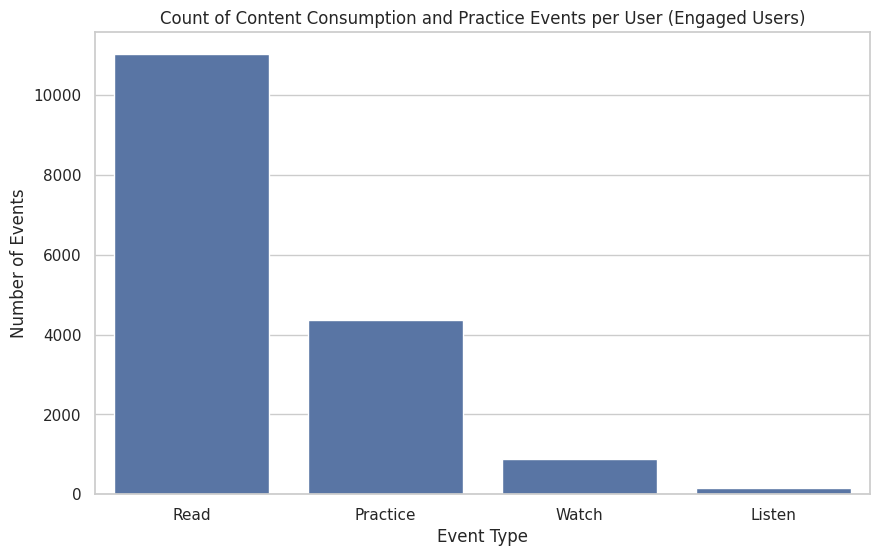

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure engaged_points_df is available (created in cell 10998dc8)
if 'engaged_points_df' in globals():
    # Filter for the relevant event types (Read, Watch, Listen, Practice)
    event_types = ['Read', 'Watch', 'Listen', 'Practice']
    filtered_events = engaged_points_df[engaged_points_df['where'].isin(event_types)].copy()

    # Count the occurrences of each event type
    event_counts = filtered_events['where'].value_counts().reset_index()
    event_counts.columns = ['event_type', 'count']

    # Create a bar plot of the event counts
    plt.figure(figsize=(10, 6))
    sns.barplot(x='event_type', y='count', data=event_counts.sort_values('count', ascending=False))
    plt.title('Count of Content Consumption and Practice Events per User (Engaged Users)')
    plt.xlabel('Event Type')
    plt.ylabel('Number of Events')
    plt.show()
else:
    print("⚠️ engaged_points_df DataFrame not found. Please ensure cell 10998dc8 has been run.")

In [ ]:
class_contents = pd.read_csv('/content/drive/MyDrive/student readiness pilot/data/class_contents_cleaned.csv')
#class_resources = pd.read_csv('/content/drive/MyDrive/student readiness pilot/data/class_resources.csv')

class_contents.head()

content_id  class_id                      title  runtime  \
0           1         2  What Is Customer Service?        5   
1           2         5                    Algeria        5   
2           3         5                     Angola        5   
3           4         5                      Benin        5   
4           5         5                   Botswana        5   

            created_at  content_provider_id  
0  2016-01-02 10:05:45                 11.0  
1  2015-11-23 10:26:34                  8.0  
2  2015-11-23 10:27:05                  8.0  
3  2015-11-23 10:27:33                  8.0  
4  2015-11-23 10:28:18                  8.0

In [ ]:
# Calculate total marks earned from content consumption per user
# Use the user_content_consumption DataFrame created in cell 10998dc8
user_content_marks_pivot = user_content_consumption.pivot_table(
    index='user_id',
    columns='where',
    values='total_marks' # Use 'total_marks' here
).fillna(0).reset_index()

# Rename columns for clarity
user_content_marks_pivot.columns = [f'total_{col.lower()}_marks' if col != 'user_id' else col for col in user_content_marks_pivot.columns]

print("Total marks earned from content consumption per user (first 10 rows):")
display(user_content_marks_pivot.head(10))

# Print the shape to confirm it's based on engaged users
print("\nShape of user_content_marks_pivot (based on engaged users):", user_content_marks_pivot.shape)

# Merge these total marks earned metrics with the main df DataFrame
# Ensure to use a left merge to keep all users in df
# COMMENTING OUT MERGE TO DF FOR NOW AS USER WANTS TO FOCUS ON EDF
# df = pd.merge(df, user_content_marks_pivot, on='user_id', how='left')

# Fill NaN values introduced by the merge for new columns with 0 (users with no marks of that type)
# COMMENTING OUT FILLNA FOR DF FOR NOW
# content_marks_cols = [col for col in user_content_marks_pivot.columns if col != 'user_id']
# for col in content_marks_cols:
#     df[col].fillna(0, inplace=True)

# Display summary statistics for the new columns
# COMMENTING OUT DESCRIBE FOR DF FOR NOW
# print("\nSummary statistics for total marks earned from content consumption per user:")
# display(df[content_marks_cols].describe())

Total marks earned from content consumption per user (first 10 rows):


user_id  total_listen_marks  total_read_marks  total_watch_marks
0    82117                 0.0               1.0                0.0
1   136454                 0.0               0.0                3.0
2   470604                 0.0               0.0                4.0
3   702382                 0.0               1.0                0.0
4   773118                 0.0               1.0                0.0
5   828153                 0.0               1.0                0.0
6   927856                 0.0               2.0                0.0
7  1249642                 0.0               0.0                2.0
8  1384643                 0.0              28.0                0.0
9  2587740                 0.0               1.0                0.0


Shape of user_content_marks_pivot (based on engaged users): (1551, 4)


✅ Merged content consumption event counts with edf.
✅ Merged content consumption total marks with edf.
✅ Filled NaN values in 'num_listen_events' with 0 in edf.
✅ Filled NaN values in 'num_read_events' with 0 in edf.
✅ Filled NaN values in 'num_watch_events' with 0 in edf.
✅ Filled NaN values in 'total_listen_marks' with 0 in edf.
✅ Filled NaN values in 'total_read_marks' with 0 in edf.
✅ Filled NaN values in 'total_watch_marks' with 0 in edf.

Analyzing distributions for engaged users (edf):

Distribution of num_listen_events for engaged users:


/tmp/ipython-input-3404865836.py:36: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





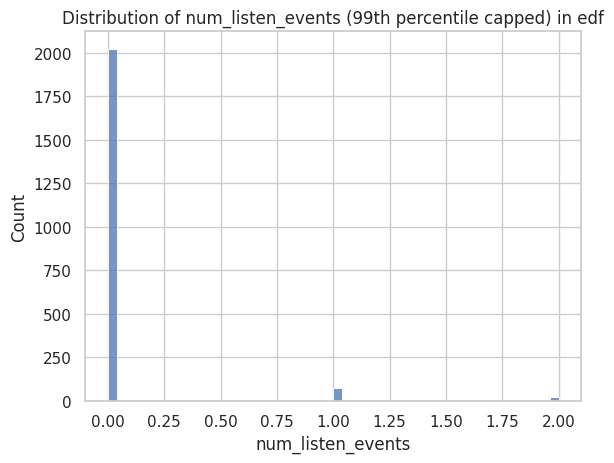


Distribution of num_read_events for engaged users:


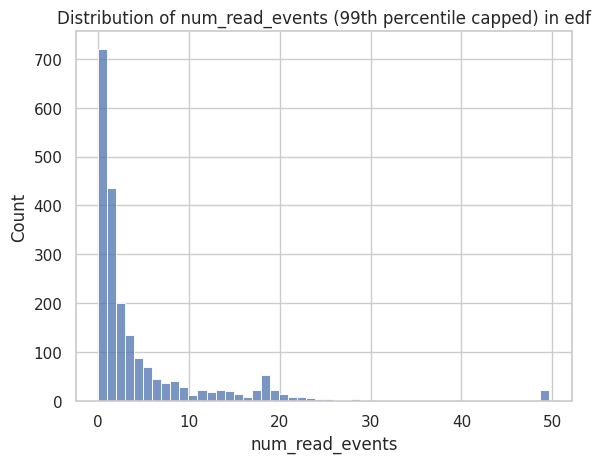


Distribution of num_watch_events for engaged users:


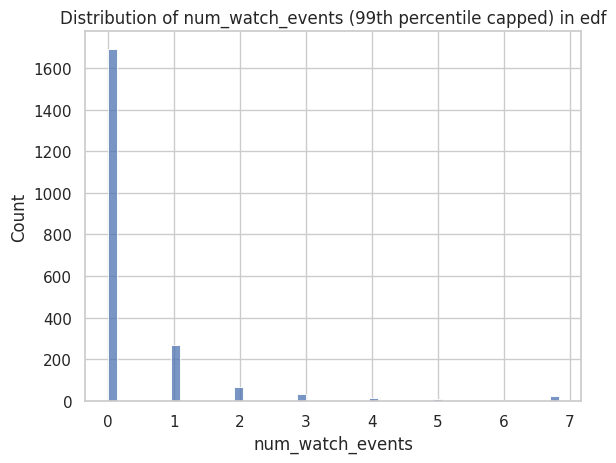


Distribution of total_listen_marks for engaged users:


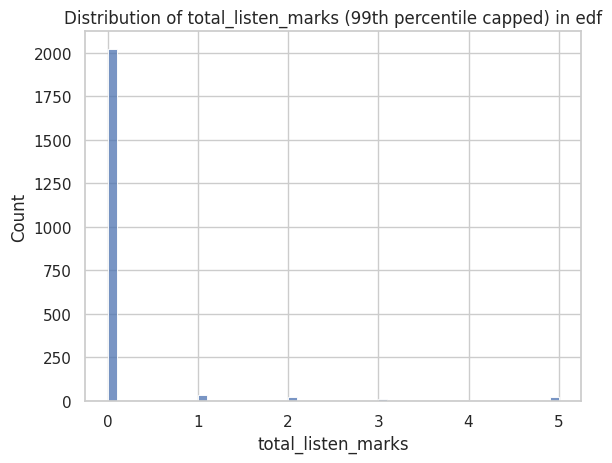


Distribution of total_read_marks for engaged users:


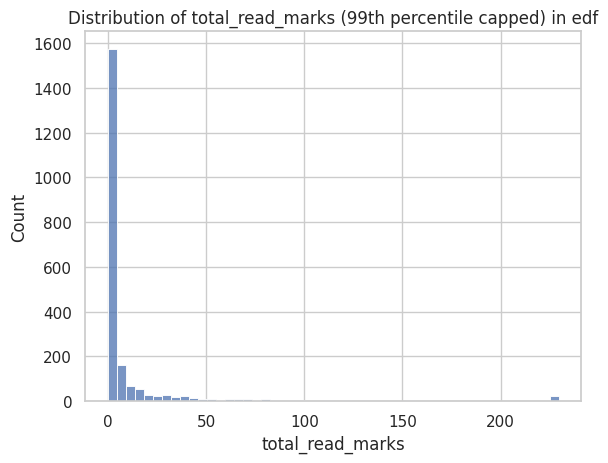


Distribution of total_watch_marks for engaged users:


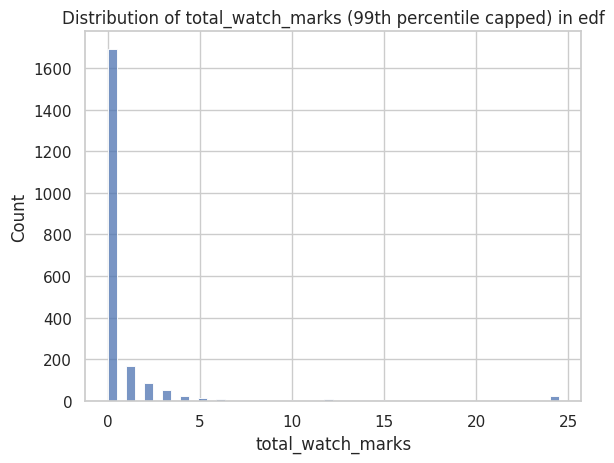


Summary statistics for content consumption metrics per user in edf:


num_listen_events  num_read_events  num_watch_events  \
count        2118.000000      2118.000000       2118.000000   
mean            0.069405         5.207271          0.421152   
std             0.409383        15.633951          1.504258   
min             0.000000         0.000000          0.000000   
25%             0.000000         0.000000          0.000000   
50%             0.000000         1.000000          0.000000   
75%             0.000000         5.000000          0.000000   
max             9.000000       370.000000         36.000000   

       total_listen_marks  total_read_marks  total_watch_marks  
count         2118.000000       2118.000000        2118.000000  
mean             0.203022         12.833333           1.682247  
std              1.931356         54.526857          17.716888  
min              0.000000          0.000000           0.000000  
25%              0.000000          0.000000           0.000000  
50%              0.000000          1.000000           0.000000  
75%              0.000000          5.000000           0.000000  
max             69.000000       1237.000000         479.000000

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# # You could do the same for total marks earned from content consumption
# user_content_marks_pivot = user_content_consumption.pivot_table(
#     index='user_id',
#     columns='where',
#     values='total_marks' # Use 'total_marks' here
# ).fillna(0).reset_index()
# # Rename columns for clarity (e.g., total_read_marks, total_watch_marks)
# user_content_marks_pivot.columns = [f'total_{col.lower()}_marks' if col != 'user_id' else col for col in user_content_marks_pivot.columns]


# Merge these content consumption metrics (number of events) with the main edf DataFrame
# Ensure to use a left merge to keep all users in edf
edf = pd.merge(edf, user_content_consumption_pivot, on='user_id', how='left')
print("✅ Merged content consumption event counts with edf.")

# Merge total marks earned from content consumption with edf
# Ensure user_content_marks_pivot was created in the previous cell (f91f9703)
if 'user_content_marks_pivot' in globals():
    edf = pd.merge(edf, user_content_marks_pivot, on='user_id', how='left')
    print("✅ Merged content consumption total marks with edf.")
else:
    print("⚠️ Skipping merge of total marks: user_content_marks_pivot not found.")


# Fill NaN values introduced by the merge for new columns with 0 (users with no events/marks of that type)
# Identify the new columns added from the merges
new_content_cols = [col for col in user_content_consumption_pivot.columns if col != 'user_id']
if 'user_content_marks_pivot' in globals():
     new_content_cols.extend([col for col in user_content_marks_pivot.columns if col != 'user_id' and col not in new_content_cols])

for col in new_content_cols:
    if col in edf.columns: # Ensure the column exists in edf before filling
        edf[col].fillna(0, inplace=True)
        print(f"✅ Filled NaN values in '{col}' with 0 in edf.")
    else:
        print(f"⚠️ Skipping fillna for '{col}': Column not found in edf.")


# And analyze the distribution of these metrics in edf
print("\nAnalyzing distributions for engaged users (edf):")

# Identify content consumption metric columns in edf
content_metric_cols_edf = [col for col in new_content_cols if col in edf.columns]

if content_metric_cols_edf:
    for col in content_metric_cols_edf:
        print(f"\nDistribution of {col} for engaged users:")
        # Cap outliers for better visualization, handle cases where all values are the same or missing
        if edf[col].nunique() > 1:
            sns.histplot(edf[col].dropna().clip(upper=edf[col].quantile(0.99)), bins=50)
            plt.title(f'Distribution of {col} (99th percentile capped) in edf')
            plt.show()
        else:
            print(f"⚠️ Skipping histogram for '{col}': Not enough unique values to plot distribution.")

    # Display summary statistics for the new columns in edf
    print("\nSummary statistics for content consumption metrics per user in edf:")
    display(edf[content_metric_cols_edf].describe())

else:
    print("\n⚠️ No content consumption metric columns found in edf to analyze distributions.")

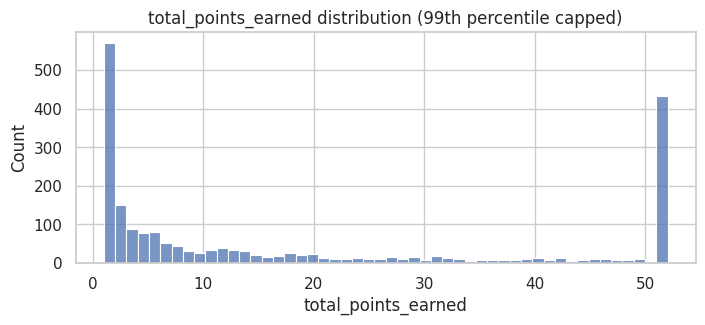

In [ ]:
# If engagement summary fields exist in df: total_video_minutes, total_audio_minutes, total_articles_read
eng_cols = ['total_video_minutes','total_audio_minutes','total_articles_read','total_points_earned']
for c in eng_cols:
    if c in edf.columns:
        plt.figure(figsize=(8,3))
        sns.histplot(edf[c].dropna().clip(upper=df[c].quantile(0.99)), bins=50)
        plt.title(f"{c} distribution (99th percentile capped)")
        plt.show()

In [ ]:

# Content diversity: number of unique topics per student (if available)
if 'unique_topics' in edf.columns:
    sns.histplot(edf['unique_topics'].dropna(), bins=30)
    plt.title('Unique topics per student')
    plt.show()

In [ ]:
edf.tail()


user_id country     city          created_at          updated_at  \
2113  996364440   Ghana    Accra 2018-08-25 14:31:50 2024-11-25 14:00:09   
2114  997356654   Ghana  Unknown 2016-09-21 17:10:31 2024-11-25 14:00:09   
2115  997420313   Ghana  Unknown 2017-11-23 20:37:19 2024-11-25 14:00:09   
2116  999362150   Ghana  Unknown 2021-12-09 15:49:03 2024-11-25 14:00:09   
2117  999932126   Ghana  Unknown 2016-09-05 23:54:11 2024-12-03 15:59:50   

           last_activity          last_login institute  total_points_earned  \
2113 2018-08-27 07:30:13                 NaT   Unknown                  1.0   
2114                 NaT                 NaT   Unknown                  1.0   
2115 2021-07-08 05:42:53 2021-07-08 05:39:58   Unknown                 14.0   
2116 2022-11-22 03:43:36 2022-07-07 07:43:48  Letshego                 38.0   
2117                 NaT                 NaT   Unknown                  1.0   

      number_of_point_events  average_test_marks  num_tests_taken  \
2113                     1.0            0.000000              0.0   
2114                     2.0            0.000000              0.0   
2115                     9.0            0.000000              0.0   
2116                    13.0           25.333333              3.0   
2117                     1.0            0.000000              0.0   

      total_marks_across_tests  average_grade_per_question  \
2113                       0.0                         0.0   
2114                       0.0                         0.0   
2115                       0.0                         0.0   
2116                      76.0                        30.0   
2117                       0.0                         0.0   

      total_questions_attempted_in_tests  total_topic_engagements  \
2113                                 0.0                      1.0   
2114                                 0.0                      2.0   
2115                                 0.0                      9.0   
2116                                90.0                     13.0   
2117                                 0.0                      1.0   

      unique_topics_count  average_engagements_per_topic  \
2113                  1.0                            1.0   
2114                  1.0                            2.0   
2115                  1.0                            9.0   
2116                  1.0                           13.0   
2117                  1.0                            1.0   

      total_points_earned_agg  average_points_per_event  total_test_marks  \
2113                      1.0                  1.000000               NaN   
2114                      1.0                  0.500000               NaN   
2115                     14.0                  1.555556               NaN   
2116                     38.0                  2.923077              76.0   
2117                      1.0                  1.000000               NaN   

      average_test_marks_per_test  num_classes_subscribed  is_deleted  \
2113                          NaN                       0           0   
2114                          NaN                       0           0   
2115                          NaN                       4           0   
2116                    25.333333                       1           0   
2117                          NaN                       0           0   

      tenure_days created_month   reg_ym last_login_ym subscription_category  \
2113          1.0    2018-08-01  2018-08           NaT             0 Classes   
2114          NaN    2016-09-01  2016-09           NaT             0 Classes   
2115       1322.0    2017-11-01  2017-11       2021-07             4 Classes   
2116        347.0    2021-12-01  2021-12       2022-07               1 Class   
2117          NaN    2016-09-01  2016-09           NaT             0 Classes   

     last_activity_ym latest_active_ym  num_listen_events  num_read_events  \
2113          2018-08          2018-08             

#####how much read, listen watch and ractice content is available

In [ ]:
# Analyze content availability by type
content_summary = {}

# Content from class_contents: Runtime could indicate duration for watch/listen, text_content for read
if 'class_contents' in globals() and isinstance(class_contents, pd.DataFrame):
    print("Analyzing content from class_contents...")
    # Assuming 'runtime' is in minutes and applies to watch/listen-like content
    if 'runtime' in class_contents.columns:
        # You might need to infer content type from other columns if not explicit
        # For now, let's sum runtime as a proxy for duration for potentially watch/listen content
        total_runtime_minutes = class_contents['runtime'].sum()
        content_summary['total_content_runtime_minutes'] = total_runtime_minutes
        print(f"- Total content runtime minutes (from class_contents['runtime']): {total_runtime_minutes}")

    # Assuming text_content indicates readable content
    if 'text_content' in class_contents.columns:
        # Count the number of entries with text_content as a proxy for read content items
        num_read_items = class_contents['text_content'].notnull().sum()
        content_summary['num_read_content_items'] = num_read_items
        print(f"- Number of readable content items (from class_contents['text_content']): {num_read_items}")

# Content from class_resources: resource_type could indicate media type (potentially watch/listen/read)
if 'class_resources' in globals() and isinstance(class_resources, pd.DataFrame):
    print("\nAnalyzing content from class_resources...")
    if 'resource_type' in class_resources.columns:
        # You would need a mapping for resource_type to 'watch', 'listen', 'read'
        # For now, let's just count resources by type if possible
        print("- Resource types distribution (from class_resources):")
        resource_type_counts = class_resources['resource_type'].value_counts()
        display(resource_type_counts)

        # Example: If 'resource_type' can be mapped to content types
        # resource_type_mapping = {'video': 'watch', 'audio': 'listen', 'document': 'read'}
        # class_resources['content_type'] = class_resources['resource_type'].map(resource_type_mapping)
        # content_type_counts_resources = class_resources['content_type'].value_counts()
        # print("\n- Content types distribution (inferred from class_resources):")
        # display(content_type_counts_resources)
        # Add these counts to the summary if needed
        # for content_type, count in content_type_counts_resources.items():
        #     content_summary[f'num_{content_type}_content_items_from_resources'] = count

# Content from class_questions: relates to practice
if 'class_questions' in globals() and isinstance(class_questions, pd.DataFrame):
    print("\nAnalyzing content from class_questions...")
    # Count the number of questions as a proxy for practice content items
    num_practice_questions = class_questions.shape[0]
    content_summary['num_practice_content_items'] = num_practice_questions
    print(f"- Number of practice content questions (from class_questions): {num_practice_questions}")

# Content from test_questions: relates to tests (can be considered practice-like)
if 'test_questions' in globals() and isinstance(test_questions, pd.DataFrame):
    print("\nAnalyzing content from test_questions...")
     # Count the number of test questions
    num_test_questions = test_questions.shape[0]
    content_summary['num_test_content_questions'] = num_test_questions
    print(f"- Number of test content questions (from test_questions): {num_test_questions}")


print("\nContent Availability Summary:")
for key, value in content_summary.items():
    print(f"- {key}: {value}")

Analyzing content from class_contents...
- Total content runtime minutes (from class_contents['runtime']): 27705

Analyzing content from class_resources...
- Resource types distribution (from class_resources):


resource_type
3    585
2     32
Name: count, dtype: int64


Analyzing content from class_questions...
- Number of practice content questions (from class_questions): 38331

Analyzing content from test_questions...
- Number of test content questions (from test_questions): 29604

Content Availability Summary:
- total_content_runtime_minutes: 27705
- num_practice_content_items: 38331
- num_test_content_questions: 29604


In [ ]:
#checking how much watch, listen, watch and ractice content is available in data
edf.describe().T


count                           mean  \
user_id                             2118.0               510705881.594901   
created_at                            2118  2019-03-15 12:44:17.854579968   
updated_at                            2118  2024-05-16 13:25:24.752124928   
last_activity                         1522  2020-10-19 08:42:15.142575360   
last_login                            1313  2020-12-15 21:26:14.080731136   
total_points_earned                 2118.0                      69.712465   
number_of_point_events              2118.0                       7.768178   
average_test_marks                  2118.0                       6.487252   
num_tests_taken                     2118.0                       2.594429   
total_marks_across_tests            2118.0                      58.170444   
average_grade_per_question          2118.0                      11.419316   
total_questions_attempted_in_tests  2118.0                      96.713409   
total_topic_engagements             2118.0                       7.768178   
unique_topics_count                 2118.0                       1.158168   
average_engagements_per_topic       2118.0                       6.629891   
total_points_earned_agg             2118.0                      69.712465   
average_points_per_event            2118.0                        9.38512   
total_test_marks                     652.0                     188.964724   
average_test_marks_per_test          652.0                      21.073618   
num_classes_subscribed              2118.0                       2.205382   
is_deleted                          2118.0                            0.0   
tenure_days                         1522.0                      319.34954   
created_month                         2118  2019-02-27 13:10:42.492918016   
num_listen_events                   2118.0                       0.069405   
num_read_events                     2118.0                       5.207271   
num_watch_events                    2118.0                       0.421152   
total_listen_marks                  2118.0                       0.203022   
total_read_marks                    2118.0                      12.833333   
total_watch_marks                   2118.0                       1.682247   

                                                    min  \
user_id                                         82117.0   
created_at                          2015-04-02 16:23:16   
updated_at                          2018-04-10 20:22:51   
last_activity                       2018-07-31 08:51:37   
last_login                          2018-09-11 02:22:14   
total_points_earned                                 1.0   
number_of_point_events                              1.0   
average_test_marks                                  0.0   
num_tests_taken                                     0.0   
total_marks_across_tests                            0.0   
average_grade_per_question                          0.0   
total_questions_attempted_in_tests                  0.0   
total_topic_engagements                             1.0   
unique_topics_count                                 1.0   
average_engagements_per_topic                       1.0   
total_points_earned_agg                             1.0   
average_points_per_event                       0.047619   
total_test_marks                                    0.0   
average_test_marks_per_test                         0.0   
num_classes_subscribed                              0.0   
is_deleted                                          0.0   
tenure_days                                        -1.0   
created_month                       2015-04-01 00:00:00   
num_listen_events                                   0.0   
num_read_events                                     0.0   
num_watch_events                                    0.0   
total_listen_marks                                  0.0   
total_read_marks                                    0.0   
total_watch_mar

##7) Practice & points analysis (core for readiness signals)

- Avg practice score, practice attempts, pass rate.
- Practice recency, improvement curves (if we have time-series practice data).

✅ Filtered points data for engaged users.
✅ Filtered practice points data for engaged users.

Practice performance metrics aggregated by engaged user (first 10):


user_id  num_practice_events  average_practice_marks  total_practice_marks
0   470604                    1               11.000000                    11
1   564450                    1                5.000000                     5
2   606337                    1                9.000000                     9
3   721591                    1                9.000000                     9
4   828153                    1                7.000000                     7
5   927856                    1                3.000000                     3
6  1993872                    1               69.000000                    69
7  2584397                    1                1.000000                     1
8  2657798                   18                5.111111                    92
9  3978588                    2               66.000000                   132


Distribution of Number of Practice Events Per User (Engaged Users):


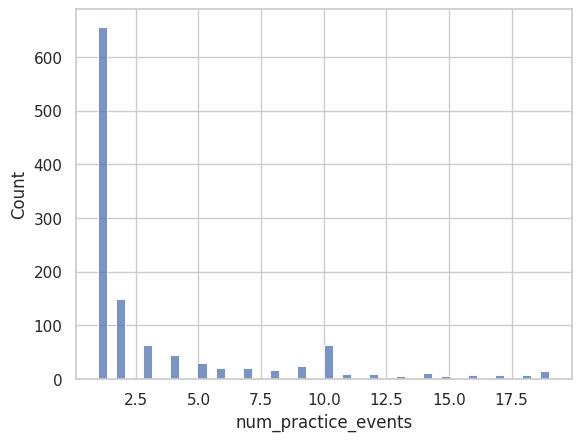


Distribution of Average Practice Marks Per User (Engaged Users):


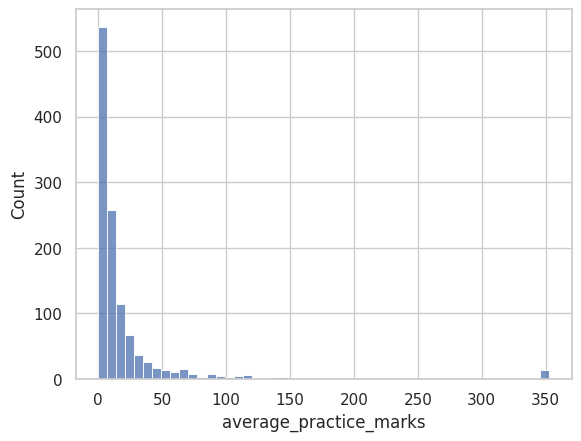


✅ Merged practice summary with edf and filled NaNs.
Updated edf shape: (2118, 40)


/tmp/ipython-input-501606608.py:46: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





user_id  country     city          created_at          updated_at  \
0    82117  Unknown  Unknown 2022-12-01 11:47:12 2022-12-01 11:47:12   
1   136454    Ghana    Accra 2023-04-16 08:14:52 2024-11-25 14:00:09   
2   470604    Ghana  Unknown 2020-03-27 15:59:53 2024-11-25 14:00:09   
3   564450    Ghana  Unknown 2020-03-24 20:54:20 2024-11-25 14:00:09   
4   606337    Kenya  Eldoret 2024-01-24 15:22:42 2024-11-25 14:00:09   

        last_activity          last_login                  institute  \
0 2022-12-01 11:47:12 2022-12-01 11:47:12                    Unknown   
1 2023-04-16 08:14:52 2023-04-16 08:14:52                       Tusk   
2 2020-05-04 11:59:51 2020-04-06 03:45:46            Acellus Academy   
3 2020-05-01 01:20:09 2020-05-01 01:17:50  Haavad Senior High School   
4 2024-01-24 15:22:42 2024-01-24 15:22:42        Seregeya Dispensary   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  1.0                     1.0            0.000000   
1                  3.0                     1.0            0.000000   
2                 15.0                    61.0           20.666667   
3                  5.0                     1.0            0.000000   
4                  9.0                     1.0            0.000000   

   num_tests_taken  total_marks_across_tests  average_grade_per_question  \
0              0.0                       0.0                    0.000000   
1              0.0                       0.0                    0.000000   
2              6.0                     124.0                   43.333333   
3              0.0                       0.0                    0.000000   
4              0.0                       0.0                    0.000000   

   total_questions_attempted_in_tests  total_topic_engagements  \
0                                 0.0                      1.0   
1                                 0.0                      1.0   
2                               260.0                     61.0   
3                                 0.0                      1.0   
4                                 0.0                      1.0   

   unique_topics_count  average_engagements_per_topic  \
0                  1.0                            1.0   
1                  1.0                            1.0   
2                  1.0                           61.0   
3                  1.0                            1.0   
4                  1.0                            1.0   

   total_points_earned_agg  average_points_per_event  total_test_marks  \
0                      1.0                  1.000000               NaN   
1                      3.0                  3.000000               NaN   
2                     15.0                  0.245902             124.0   
3                      5.0                  5.000000               NaN   
4                      9.0                  9.000000               NaN   

   average_test_marks_per_test  num_classes_subscribed  is_deleted  \
0                          NaN                       0           0   
1                          NaN                       0           0   
2                    20.666667                       4           0   
3                          NaN                       1           0   
4                          NaN                       1           0   

   tenure_days created_month   reg_ym last_login_ym subscription_category  \
0          0.0    2022-12-01  2022-12       2022-12             0 Classes   
1          0.0    2023-04-01  2023-04       2023-04             0 Classes   
2         37.0    2020-03-01  2020-03       2020-04             4 Classes   
3         37.0    2020-03-01  2020-03       2020-05               1 Class   
4          0.0    2024-01-01  2024-01       2024-01               1 Class   

  last_activity_ym latest_active_ym  num_listen_events  num_read_events  \
0          2022-12          2022-12                0.0              1.0   
1          2023-04          2023-04     

<Figure size 640x480 with 0 Axes>

In [ ]:
# Filter points_df for 'Practice' activities and for users in edf
if 'edf' in globals() and 'points' in globals() and 'user_id' in edf.columns and 'user_id' in points.columns:
    # Filter points data for users present in edf
    engaged_points_df = points[points['user_id'].isin(edf['user_id'])].copy()
    print("✅ Filtered points data for engaged users.")

    # Filter engaged_points_df for 'Practice' activities
    practice_points_df = engaged_points_df[engaged_points_df['where'] == 'Practice'].copy()
    print("✅ Filtered practice points data for engaged users.")

    # Aggregate practice points data by user_id
    user_practice_summary = practice_points_df.groupby('user_id').agg(
        num_practice_events=('point_id', 'count'), # Corrected column name from 'id' to 'point_id'
        average_practice_marks=('marks', 'mean'), # This can be considered the average practice score
        total_practice_marks=('marks', 'sum') # This is the total practice score
    ).reset_index()

    print("\nPractice performance metrics aggregated by engaged user (first 10):")
    display(user_practice_summary.head(10))

    # You can also analyze the distribution of these metrics
    print("\nDistribution of Number of Practice Events Per User (Engaged Users):")
    if 'num_practice_events' in user_practice_summary.columns and user_practice_summary['num_practice_events'].nunique() > 1:
         sns.histplot(user_practice_summary['num_practice_events'].clip(upper=user_practice_summary['num_practice_events'].quantile(0.99)).dropna(), bins=50)
         plt.show()
    else:
         print("⚠️ Skipping histogram for 'num_practice_events': Not enough unique values or column not found.")


    print("\nDistribution of Average Practice Marks Per User (Engaged Users):")
    if 'average_practice_marks' in user_practice_summary.columns and user_practice_summary['average_practice_marks'].nunique() > 1:
         sns.histplot(user_practice_summary['average_practice_marks'].clip(upper=user_practice_summary['average_practice_marks'].quantile(0.99)).dropna(), bins=50)
         plt.show()
         plt.savefig("/content/drive/MyDrive/student readiness pilot/reports/figures/avg_points_distro.png")  # for matplotlib charts

    else:
         print("⚠️ Skipping histogram for 'average_practice_marks': Not enough unique values or column not found.")

    # Merge practice summary with the edf DataFrame
    if 'edf' in globals():
         edf = pd.merge(edf, user_practice_summary, on='user_id', how='left')
         # Fill NaN values introduced by the merge with 0 for practice metrics (for users in edf but no practice points)
         practice_cols = ['num_practice_events', 'average_practice_marks', 'total_practice_marks']
         for col in practice_cols:
              if col in edf.columns:
                  edf[col].fillna(0, inplace=True)
         print("\n✅ Merged practice summary with edf and filled NaNs.")
         print("Updated edf shape:", edf.shape)
         display(edf.head())
    else:
         print("\n⚠️ Skipping merge with edf: edf DataFrame not found.")


else:
    print("⚠️ Skipping practice points analysis: Required dataframes (edf, points) or columns not found.")

In [ ]:
practice_points_df.head()

point_id    user_id  group  class_id  content_id     where  marks  \
17        27  671846783      0         7         120  Practice      3   
23        39  594978038      1         2           0  Practice      4   
27        44  442743719      1         2           0  Practice      1   
38        58  609688693      1         2           0  Practice      2   
73       119  318027464      1         2           0  Practice     23   

            created_at          updated_at  resource_id  
17 2016-02-16 19:01:05 2016-02-16 21:26:58          NaN  
23 2016-02-16 21:19:24 2016-02-16 21:19:24          NaN  
27 2016-02-18 07:05:50 2016-02-18 07:05:50          NaN  
38 2016-02-22 00:55:19 2016-02-22 20:06:52          NaN  
73 2016-02-27 18:47:26 2016-02-28 06:30:47          NaN

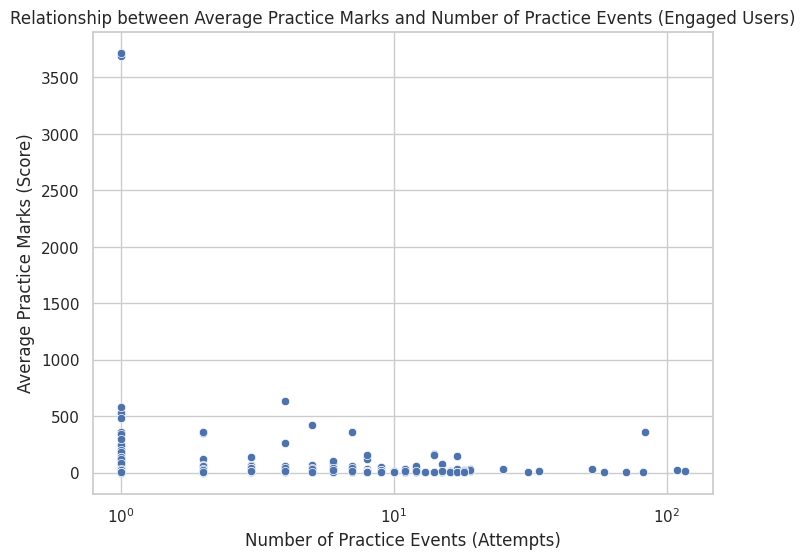

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationship between average practice marks and number of practice events in edf
if 'average_practice_marks' in edf.columns and 'num_practice_events' in edf.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='num_practice_events', y='average_practice_marks', data=edf.dropna(subset=['num_practice_events', 'average_practice_marks'])) # Drop NaNs for plotting
    plt.title('Relationship between Average Practice Marks and Number of Practice Events (Engaged Users)')
    plt.xlabel('Number of Practice Events (Attempts)')
    plt.ylabel('Average Practice Marks (Score)')
    plt.xscale('log') # Use log scale for attempts if distribution is skewed
    plt.show()
else:
    print("⚠️ Skipping scatter plot: Required columns ('average_practice_marks' or 'num_practice_events') not found in edf.")

count    2118.000000
mean        2.063739
std         5.882746
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max       116.000000
Name: num_practice_events, dtype: float64


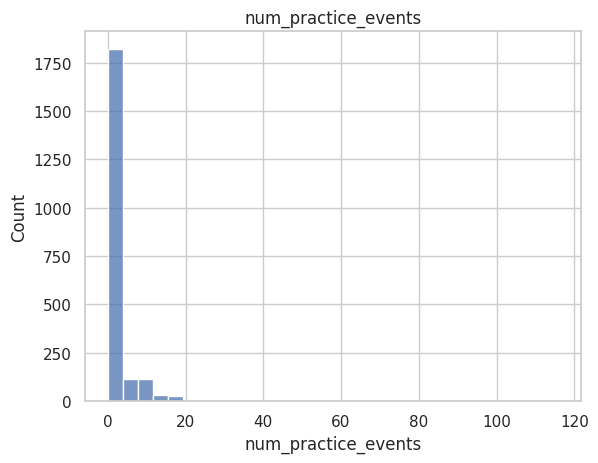

count    2118.000000
mean       15.639744
std       120.316801
min         0.000000
25%         0.000000
50%         1.000000
75%        10.000000
max      3720.000000
Name: average_practice_marks, dtype: float64


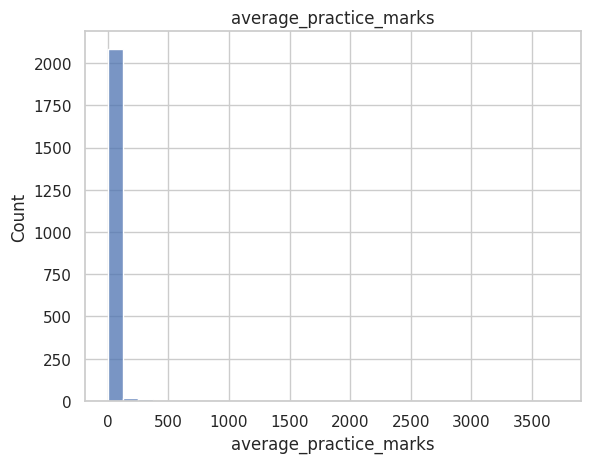

In [ ]:
# Example aggregates (if practice aggregates included)
pr_cols = ['num_practice_events','average_practice_marks',]
for c in pr_cols:
    if c in edf.columns:
        print(edf[c].describe())
        sns.histplot(edf[c].dropna(), bins=30)
        plt.title(c)
        plt.show()

In [ ]:
# Calculate practice pass rate for engaged users in edf
# Use the practice_points_df DataFrame (already filtered for engaged users and 'Practice' where clause)
if 'practice_points_df' in globals() and 'user_id' in practice_points_df.columns:

    # Define a 'passed' column based on the 70% mark threshold
    # Assuming marks are on a scale where 70 is the threshold
    practice_points_df['passed'] = (practice_points_df['marks'] >= 10).astype(int)

    # Aggregate practice data by user_id to calculate total attempts and total passes
    user_practice_pass_summary = practice_points_df.groupby('user_id').agg(
        total_practice_attempts=('point_id', 'count'),
        total_practice_passes=('passed', 'sum')
    ).reset_index()

    # Calculate the practice pass rate
    user_practice_pass_summary['practice_pass_rate'] = user_practice_pass_summary['total_practice_passes'] / user_practice_pass_summary['total_practice_attempts']

    # Handle potential division by zero if a user had 0 attempts (though filtered for engaged users, good practice)
    user_practice_pass_summary['practice_pass_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
    user_practice_pass_summary['practice_pass_rate'].fillna(0, inplace=True) # Fill NaN (0 attempts) with 0 pass rate


    print("\nPractice pass rate calculated for engaged users (first 10):")
    display(user_practice_pass_summary.head(10))

    # Merge practice pass rate with the edf DataFrame
    if 'edf' in globals():
         # Merge the new practice pass rate
         # Check if practice_pass_rate column already exists and handle duplicates
         if 'practice_pass_rate' in edf.columns:
             # If it exists, drop the old one before merging the new one
             edf.drop(columns=['practice_pass_rate'], inplace=True)

         # Now merge the new practice_pass_rate column
         edf = pd.merge(edf, user_practice_pass_summary[['user_id', 'practice_pass_rate']], on='user_id', how='left')

         # Fill NaN for users in edf but no practice attempts (pass rate is 0)
         if 'practice_pass_rate' in edf.columns:
             edf['practice_pass_rate'].fillna(0, inplace=True)

         print("\n✅ Merged practice pass rate with edf and filled NaNs.")
         print("Updated edf shape:", edf.shape)
         display(edf.head())
    else:
         print("\n⚠️ Skipping merge with edf: edf DataFrame not found.")

else:
    print("⚠️ Skipping practice pass rate calculation: 'practice_points_df' DataFrame or 'user_id' column not found.")


Practice pass rate calculated for engaged users (first 10):


/tmp/ipython-input-3937093368.py:19: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-3937093368.py:20: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or

user_id  total_practice_attempts  total_practice_passes  practice_pass_rate
0   470604                        1                      1            1.000000
1   564450                        1                      0            0.000000
2   606337                        1                      0            0.000000
3   721591                        1                      0            0.000000
4   828153                        1                      0            0.000000
5   927856                        1                      0            0.000000
6  1993872                        1                      1            1.000000
7  2584397                        1                      0            0.000000
8  2657798                       18                      4            0.222222
9  3978588                        2                      2            1.000000


✅ Merged practice pass rate with edf and filled NaNs.
Updated edf shape: (2118, 41)


/tmp/ipython-input-3937093368.py:39: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





user_id  country     city          created_at          updated_at  \
0    82117  Unknown  Unknown 2022-12-01 11:47:12 2022-12-01 11:47:12   
1   136454    Ghana    Accra 2023-04-16 08:14:52 2024-11-25 14:00:09   
2   470604    Ghana  Unknown 2020-03-27 15:59:53 2024-11-25 14:00:09   
3   564450    Ghana  Unknown 2020-03-24 20:54:20 2024-11-25 14:00:09   
4   606337    Kenya  Eldoret 2024-01-24 15:22:42 2024-11-25 14:00:09   

        last_activity          last_login                  institute  \
0 2022-12-01 11:47:12 2022-12-01 11:47:12                    Unknown   
1 2023-04-16 08:14:52 2023-04-16 08:14:52                       Tusk   
2 2020-05-04 11:59:51 2020-04-06 03:45:46            Acellus Academy   
3 2020-05-01 01:20:09 2020-05-01 01:17:50  Haavad Senior High School   
4 2024-01-24 15:22:42 2024-01-24 15:22:42        Seregeya Dispensary   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  1.0                     1.0            0.000000   
1                  3.0                     1.0            0.000000   
2                 15.0                    61.0           20.666667   
3                  5.0                     1.0            0.000000   
4                  9.0                     1.0            0.000000   

   num_tests_taken  total_marks_across_tests  average_grade_per_question  \
0              0.0                       0.0                    0.000000   
1              0.0                       0.0                    0.000000   
2              6.0                     124.0                   43.333333   
3              0.0                       0.0                    0.000000   
4              0.0                       0.0                    0.000000   

   total_questions_attempted_in_tests  total_topic_engagements  \
0                                 0.0                      1.0   
1                                 0.0                      1.0   
2                               260.0                     61.0   
3                                 0.0                      1.0   
4                                 0.0                      1.0   

   unique_topics_count  average_engagements_per_topic  \
0                  1.0                            1.0   
1                  1.0                            1.0   
2                  1.0                           61.0   
3                  1.0                            1.0   
4                  1.0                            1.0   

   total_points_earned_agg  average_points_per_event  total_test_marks  \
0                      1.0                  1.000000               NaN   
1                      3.0                  3.000000               NaN   
2                     15.0                  0.245902             124.0   
3                      5.0                  5.000000               NaN   
4                      9.0                  9.000000               NaN   

   average_test_marks_per_test  num_classes_subscribed  is_deleted  \
0                          NaN                       0           0   
1                          NaN                       0           0   
2                    20.666667                       4           0   
3                          NaN                       1           0   
4                          NaN                       1           0   

   tenure_days created_month   reg_ym last_login_ym subscription_category  \
0          0.0    2022-12-01  2022-12       2022-12             0 Classes   
1          0.0    2023-04-01  2023-04       2023-04             0 Classes   
2         37.0    2020-03-01  2020-03       2020-04             4 Classes   
3         37.0    2020-03-01  2020-03       2020-05               1 Class   
4          0.0    2024-01-01  2024-01       2024-01               1 Class   

  last_activity_ym latest_active_ym  num_listen_events  num_read_events  \
0          2022-12          2022-12                0.0              1.0   
1          2023-04          2023-04     

In [ ]:
practice_points_df.head(20)

point_id    user_id  group  class_id  content_id     where  marks  \
17         27  671846783      0         7         120  Practice      3   
23         39  594978038      1         2           0  Practice      4   
27         44  442743719      1         2           0  Practice      1   
38         58  609688693      1         2           0  Practice      2   
73        119  318027464      1         2           0  Practice     23   
91        163  609688693      0         5          22  Practice      3   
130       213  603921447      1         2           0  Practice      5   
135       218  871228698      1         2           0  Practice    144   
197       296  711177724      1         2           0  Practice      1   
199       298  696833662      1         1           0  Practice      0   
204       304  986512579      1         2           0  Practice     14   
207       307  452874542      1         2           0  Practice      6   
210       310  205000624      1         1           0  Practice      0   
223       332  442743719      1         1           0  Practice      0   
260       386  978565356      1         1           0  Practice      1   
262       388  797370616      1         1           0  Practice      1   
267       394  140183928      1         1           0  Practice      0   
307       447    8483744      1         2           0  Practice     27   
327       467  969869035      0         5           2  Practice      1   
380       539  549798783      1         1           0  Practice      5   

             created_at          updated_at  resource_id  passed  
17  2016-02-16 19:01:05 2016-02-16 21:26:58          NaN       0  
23  2016-02-16 21:19:24 2016-02-16 21:19:24          NaN       0  
27  2016-02-18 07:05:50 2016-02-18 07:05:50          NaN       0  
38  2016-02-22 00:55:19 2016-02-22 20:06:52          NaN       0  
73  2016-02-27 18:47:26 2016-02-28 06:30:47          NaN       1  
91  2016-03-03 17:40:41 2016-03-22 13:14:38          NaN       0  
130 2016-03-07 08:33:38 2016-03-07 08:33:38          NaN       0  
135 2016-03-08 22:57:17 2018-09-19 19:18:16          NaN       1  
197 2016-03-15 21:18:29 2016-03-15 21:18:42          NaN       0  
199 2016-03-16 01:13:32 2016-03-16 01:13:32          NaN       0  
204 2016-03-17 21:33:51 2017-09-17 20:18:13          NaN       1  
207 2016-03-18 01:03:24 2016-03-18 01:03:24          NaN       0  
210 2016-03-18 18:29:15 2016-03-18 18:29:15          NaN       0  
223 2016-03-26 00:35:16 2016-03-26 00:35:16          NaN       0  
260 2016-04-13 23:03:30 2016-04-13 23:03:30          NaN       0  
262 2016-04-14 15:02:05 2016-04-14 15:02:05          NaN       0  
267 2016-04-16 06:18:37 2016-04-16 06:18:37          NaN       0  
307 2016-04-24 06:53:24 2016-04-24 07:09:56          NaN       1  
327 2016-04-27 19:22:33 2016-04-27 19:22:33          NaN       0  
380 2016-05-13 17:26:40 2016-05-13 17:26:40          NaN       0

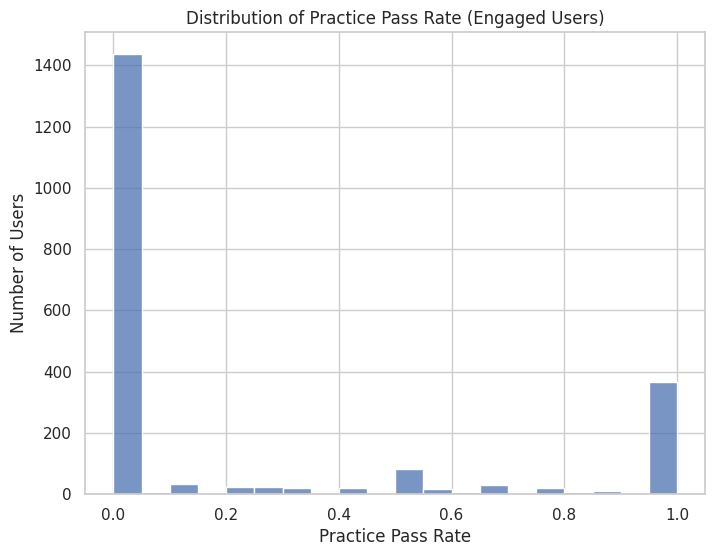

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of practice_pass_rate in edf
if 'practice_pass_rate' in edf.columns:
    plt.figure(figsize=(8, 6))
    # Plot the distribution, handling potential NaNs and capping outliers if needed
    sns.histplot(edf['practice_pass_rate'].dropna(), bins=20) # Adjust bins as needed
    plt.title('Distribution of Practice Pass Rate (Engaged Users)')
    plt.xlabel('Practice Pass Rate')
    plt.ylabel('Number of Users')
    plt.show()
else:
    print("⚠️ Skipping histogram: 'practice_pass_rate' column not found in edf.")

##8) Topic / Subject performance (heatmap)

- For each subject/topic, list avg scores & pass rates.
- Weighted difficulty score (normalize by attempts), topics to remediate.

In [ ]:
# Analyze average score and pass rate per test for engaged users (edf)
# Ensure required dataframes exist and have necessary columns
if 'edf' in globals() and 'test_takers' in globals() and 'tests' in globals() and \
   'user_id' in edf.columns and 'user_id' in test_takers.columns and \
   'test_id' in test_takers.columns and 'test_id' in tests.columns: # Removed 'pass_mark' check here

    # 1. Filter test_takers data for users present in edf
    engaged_test_takers = test_takers[test_takers['user_id'].isin(edf['user_id'])].copy()
    print("✅ Filtered test_takers data for engaged users.")

    # 2. Merge the filtered test_takers data with the tests data to get test names
    # Select relevant columns from tests: test_id, name
    test_info = tests[['test_id', 'name', 'duration', 'pass_mark', 'question_limit']].copy() # Removed 'pass_mark' here
    engaged_tests_performance = pd.merge(engaged_test_takers, test_info, on='test_id', how='left')
    print("✅ Merged test information with engaged_test_takers.")

    # 3. Pass rate calculation requires 'pass_mark' which is missing in the 'tests' dataframe.
    # Skipping pass rate calculation for now.
    engaged_tests_performance['pass_rate'] = (
    engaged_tests_performance['marks'] >= engaged_tests_performance['pass_mark']
    ).astype(int)


    # 4. Group the data by test (test_id and name) and calculate number of attempts and average score
    test_performance_summary_engaged = engaged_tests_performance.groupby(['test_id', 'name']).agg(
        attempts=('test_taker_id', 'count'),
        scores=('marks','sum'),
        average=('marks', 'mean'),
        takers=('user_id', 'nunique'),
        num_passes=('pass_rate', 'sum')
    ).reset_index()

    # Compute pass rate (%)
    test_performance_summary_engaged['pass_rate_percent'] = (
    test_performance_summary_engaged['num_passes'] / test_performance_summary_engaged['attempts']
    ) * 100

    print("\n🚀 Test Performance Summary for Engaged Users (Pass Rate Skipped due to missing 'pass_mark'):")
    display(test_performance_summary_engaged.head(10))

    # Optional: Sort by average score or number of attempts
    # print("\nTop 10 Tests by Average Score (Engaged Users):")
    # display(test_performance_summary_engaged.sort_values(by='average_score', ascending=False).head(10))

    # print("\nTop 10 Tests by Number of Attempts (Engaged Users):")
    # display(test_performance_summary_engaged.sort_values(by='num_attempts', ascending=False).head(10))


else:
    print("⚠️ Skipping test performance analysis: Required dataframes (edf, test_takers, tests) or columns not found.")

✅ Filtered test_takers data for engaged users.
✅ Merged test information with engaged_test_takers.

🚀 Test Performance Summary for Engaged Users (Pass Rate Skipped due to missing 'pass_mark'):


test_id                                           name  attempts   scores  \
0        2                    Letshego AML/CFT Assessment       589  10667.0   
1        3                                       LWT Quiz       107    109.0   
2        7                                     LWT Quiz 1         6     18.0   
3        8                                     LWT Quiz 2         9     35.0   
4        9                                     LWT Quiz 3        14     52.0   
5       41                       Season One - Contest one       168   2140.0   
6       50                       Season One - Contest two       175   2491.0   
7       85  Fundamentals of Finance and Financial Markets         4      1.0   
8       90                                ICT (BECE) 2011        16    263.0   
9       91                                ICT (BECE) 2012         3    111.0   

     average  takers  num_passes  pass_rate_percent  
0  18.110357     177         261          44.312394  
1   1.018692      32          11          10.280374  
2   3.000000       5           2          33.333333  
3   3.888889       6           5          55.555556  
4   3.714286      10           7          50.000000  
5  12.738095      41          94          55.952381  
6  14.234286      26         112          64.000000  
7   0.250000       3           0           0.000000  
8  16.437500       9           5          31.250000  
9  37.000000       3           3         100.000000

In [ ]:
#test summary in order
display(test_performance_summary_engaged.sort_values(by='attempts', ascending=False).head(10))

test_id                                       name  attempts   scores  \
0          2                Letshego AML/CFT Assessment       589  10667.0   
226      587  December 2021 Letshego AML/CFT Assessment       421   9329.0   
79       202           2020 Letshego AML/CFT Assessment       369   9955.0   
28       136                      MOCK TEST FOR NURSING       346   9333.0   
180      417       MEDICINE & MEDICAL PAPER FOR NURSING       338  10903.0   
179      416       SURGERY & SURGICAL PAPER FOR NURSING       267   7875.0   
219      578      June 2021 Letshego AML/CFT Assessment       246   5972.0   
212      544  December 2020 Letshego AML/CFT Assessment       235   5837.0   
230      592      June 2022 Letshego AML/CFT Assessment       204   5203.0   
178      415                  GENERAL PAPER FOR NURSING       182   8959.0   

       average  takers  num_passes  pass_rate_percent  
0    18.110357     177         261          44.312394  
226  22.159145     142         152          36.104513  
79   26.978320     136         142          38.482385  
28   26.973988      72         149          43.063584  
180  32.257396      66         226          66.863905  
179  29.494382      49         163          61.048689  
219  24.276423     136         158          64.227642  
212  24.838298     145         160          68.085106  
230  25.504902     136         159          77.941176  
178  49.225275      39          66          36.263736

In [ ]:
# Explore topic/subject performance by linking points data to class categories
# Ensure required dataframes exist and have necessary columns
if 'edf' in globals() and 'points' in globals() and 'classes' in globals() and \
   'user_id' in edf.columns and 'user_id' in points.columns and \
   'point_id' in points.columns and 'class_id' in points.columns and \
   'class_id' in classes.columns and 'category_id' in classes.columns:

    # 1. Filter points data for users present in edf
    engaged_points_df = points[points['user_id'].isin(edf['user_id'])].copy()
    print("✅ Filtered points data for engaged users.")

    # 2. Merge engaged_points_df with the classes data to get the category_id (topic) for each point event
    # Select relevant columns from classes: class_id, category_id
    class_topic_mapping = classes[['class_id', 'category_id']].drop_duplicates().copy()
    points_with_topics = pd.merge(engaged_points_df, class_topic_mapping, on='class_id', how='left')
    print("✅ Merged points data with class topic mapping.")

    # 3. Handle point events that couldn't be linked to a topic (missing category_id)
    points_with_topics_valid = points_with_topics.dropna(subset=['category_id']).copy()
    print(f"ℹ️ Dropped {len(points_with_topics) - len(points_with_topics_valid)} point events with no linked topic category.")

    # Ensure category_id is treated as discrete
    points_with_topics_valid['category_id'] = points_with_topics_valid['category_id'].astype('category')


    # 4. Group by category_id (topic) and calculate aggregate metrics for engaged users
    topic_performance_engaged = points_with_topics_valid.groupby('category_id').agg(
        total_point_events=('point_id', 'count'),
        total_marks_earned=('marks', 'sum'),
        average_marks_per_event=('marks', 'mean'),
        num_unique_users=('user_id', 'nunique')
    ).reset_index()

    print("\n🚀 Topic Performance Summary for Engaged Users (Based on Points Data and Class Categories):")
    display(topic_performance_engaged.head(20))


else:
    print("⚠️ Skipping topic performance analysis: Required dataframes (edf, points, classes) or columns not found.")

✅ Filtered points data for engaged users.
✅ Merged points data with class topic mapping.
ℹ️ Dropped 0 point events with no linked topic category.

🚀 Topic Performance Summary for Engaged Users (Based on Points Data and Class Categories):


/tmp/ipython-input-3585013807.py:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



category_id  total_point_events  total_marks_earned  \
0           0                 417                1173   
1           1                5588               81388   
2           2                   7                  20   
3           3                 394                 908   
4           4                7853               41554   
5           5                 286                 525   
6           6                1615               17615   
7           7                 293                4468   

   average_marks_per_event  num_unique_users  
0                 2.812950               144  
1                14.564782               810  
2                 2.857143                 5  
3                 2.304569               115  
4                 5.291481               847  
5                 1.835664               106  
6                10.907121               291  
7                15.249147               135

In [ ]:
# Explore topic/subject performance by linking points data to points content
# Ensure required dataframes exist and have necessary columns
if 'edf' in globals() and 'points' in globals() and 'classes' in globals() and \
   'user_id' in edf.columns and 'user_id' in points.columns and \
   'point_id' in points.columns and 'class_id' in points.columns and \
   'class_id' in classes.columns and 'category_id' in classes.columns:

    # 1. Filter points data for users present in edf
    engaged_points_df = points[points['user_id'].isin(edf['user_id'])].copy()
    print("✅ Filtered points data for engaged users.")

    # 2. Merge engaged_points_df with the classes data to get the category_id (topic) for each point event
    # Select relevant columns from classes: class_id, category_id
    class_topic_mapping = classes[['class_id', 'category_id']].drop_duplicates().copy()
    points_with_topics = pd.merge(engaged_points_df, class_topic_mapping, on='class_id', how='left')
    print("✅ Merged points data with class topic mapping.")

    # 3. Handle point events that couldn't be linked to a topic (missing category_id)
    points_with_topics_valid = points_with_topics.dropna(subset=['category_id']).copy()
    print(f"ℹ️ Dropped {len(points_with_topics) - len(points_with_topics_valid)} point events with no linked topic category.")

    # Ensure category_id is treated as discrete
    points_with_topics_valid['category_id'] = points_with_topics_valid['category_id'].astype('category')


    # 4. Group by category_id (topic) and calculate aggregate metrics for engaged users
    topic_performance_engaged = points_with_topics_valid.groupby('content_id').agg(
        total_point_events=('point_id', 'count'),
        total_marks_earned=('marks', 'sum'),
        average_marks_per_event=('marks', 'mean'),
        num_unique_users=('user_id', 'nunique')
           ).reset_index()

    print("\n🚀 Topic Performance Summary for Engaged Users (Based on Points Data and Content / Topic):")
    display(topic_performance_engaged.head(20))


else:
    print("⚠️ Skipping topic performance analysis: Required dataframes (edf, points, classes) or columns not found.")

✅ Filtered points data for engaged users.
✅ Merged points data with class topic mapping.
ℹ️ Dropped 0 point events with no linked topic category.

🚀 Topic Performance Summary for Engaged Users (Based on Points Data and Content / Topic):


content_id  total_point_events  total_marks_earned  \
0            0                 572               17117   
1            1                  31                  95   
2            2                  13                  31   
3            4                   2                   3   
4            5                   1                   1   
5            6                   1                   1   
6            7                   1                   1   
7           19                   1                   1   
8           22                  31                 348   
9           23                  29                  53   
10          24                  32                  49   
11          25                  11                  16   
12          26                   8                  15   
13          27                   6                   9   
14          28                   2                   2   
15          29                  15                  25   
16          30                   4                   2   
17          31                   3                   2   
18          32                   5                   4   
19          33                  12                  24   

    average_marks_per_event  num_unique_users  
0                 29.924825               263  
1                  3.064516                31  
2                  2.384615                12  
3                  1.500000                 2  
4                  1.000000                 1  
5                  1.000000                 1  
6                  1.000000                 1  
7                  1.000000                 1  
8                 11.225806                18  
9                  1.827586                21  
10                 1.531250                25  
11                 1.454545                 9  
12                 1.875000                 7  
13                 1.500000                 6  
14                 1.000000                 2  
15                 1.666667                11  
16                 0.500000                 4  
17                 0.666667                 3  
18                 0.800000                 3  
19                 2.000000                11

In [ ]:
stats = {
    'total_content':points.content_id.nunique(),
    'total_classes': points.class_id.nunique(),
    'groups': points.group.nunique(),
    'total_points': points.point_id.nunique(),
    'sum_points': points.marks.sum(),
    'average_points': points.marks.mean(),
    'content_providers': classes.content_provider_id.nunique(),
    'categories': classes.category_id.nunique(),
}
stats

{'total_content': 2632,
 'total_classes': 135,
 'groups': 2,
 'total_points': 17965,
 'sum_points': np.int64(147651),
 'average_points': np.float64(8.218814361258001),
 'content_providers': 80,
 'categories': 8}

In [ ]:
print("Is edf DataFrame available?", 'edf' in globals())
if 'edf' in globals():
    print("Columns in edf:", edf.columns.tolist())

print("\nIs test_takers DataFrame available?", 'test_takers' in globals())
if 'test_takers' in globals():
    print("Columns in test_takers:", test_takers.columns.tolist())

print("\nIs tests DataFrame available?", 'tests' in globals())
if 'tests' in globals():
    print("Columns in tests:", tests.columns.tolist())

Is edf DataFrame available? True
Columns in edf: ['user_id', 'country', 'city', 'created_at', 'updated_at', 'last_activity', 'last_login', 'institute', 'total_points_earned', 'number_of_point_events', 'average_test_marks', 'num_tests_taken', 'total_marks_across_tests', 'average_grade_per_question', 'total_questions_attempted_in_tests', 'total_topic_engagements', 'unique_topics_count', 'average_engagements_per_topic', 'total_points_earned_agg', 'average_points_per_event', 'total_test_marks', 'average_test_marks_per_test', 'num_classes_subscribed', 'is_deleted', 'tenure_days', 'created_month', 'reg_ym', 'last_login_ym', 'subscription_category', 'last_activity_ym', 'latest_active_ym', 'num_listen_events', 'num_read_events', 'num_watch_events', 'total_listen_marks', 'total_read_marks', 'total_watch_marks', 'num_practice_events', 'average_practice_marks', 'total_practice_marks', 'practice_pass_rate']

Is test_takers DataFrame available? True
Columns in test_takers: ['test_taker_id', 'test_i

In [ ]:
# Requires subscription mapping or topic-level performance table
# Suppose you have a 'topic_perf' table extracted separately:
test_perf = test_performance_summary_engaged
# columns: topic_id, topic_name, n_attempts, avg_score, pass_rate

# Example plotting:
top_hard = test_perf.sort_values(by='num_passes', ascending=False).head(10)
px.bar(top_hard, x='name', y='num_passes', title='10 top courses by Num of Test Passes')


In [ ]:
test_performance_summary_engaged.sort_values('pass_rate_percent', ascending=False, inplace=True)


In [ ]:
#create new user_test_practice_data

user_test_practice_data = edf[['user_id','num_practice_events','num_tests_taken', 'total_marks_across_tests','total_test_marks','total_practice_marks','average_test_marks', 'average_practice_marks']]
user_test_practice_data.head()


user_id  num_practice_events  num_tests_taken  total_marks_across_tests  \
0    82117                  0.0              0.0                       0.0   
1   136454                  0.0              0.0                       0.0   
2   470604                  1.0              6.0                     124.0   
3   564450                  1.0              0.0                       0.0   
4   606337                  1.0              0.0                       0.0   

   total_test_marks  total_practice_marks  average_test_marks  \
0               NaN                   0.0            0.000000   
1               NaN                   0.0            0.000000   
2             124.0                  11.0           20.666667   
3               NaN                   5.0            0.000000   
4               NaN                   9.0            0.000000   

   average_practice_marks  
0                     0.0  
1                     0.0  
2                    11.0  
3                     5.0  
4                     9.0

####Accuracy to speed ratio for tests

- we define the A:S ratio by (personal accuracy score x speed)
- we will use the test_takers table

In [ ]:
#reading sample of test takers table
engaged_test_takers.shape

(5495, 9)

In [ ]:
#defining a user's personal acc_speed_ratio based on the marks received from questions answered

time_limit = engaged_tests_performance.duration
personal_acc_score = (engaged_test_takers.marks / engaged_test_takers.no_of_questions)
engaged_test_takers['pers_acc_score'] = personal_acc_score
personal_speed = (time_limit - engaged_test_takers.time_taken) /time_limit
engaged_test_takers['pers_speed_score'] = personal_speed
acc_speed_ratio = (personal_acc_score * personal_speed)
engaged_test_takers['acc_speed_ratio'] = acc_speed_ratio
engaged_test_takers.head()

test_taker_id  test_id    user_id  marks  no_of_questions  \
0             37        2  556021491   15.0               25   
1             38        2  556021491   19.0               25   
2             39        2  257307805   17.0               25   
3             40        2  699299469   17.0               25   
4             41        2  905797942   17.0               25   

           created_at          updated_at  time_taken         finished_at  \
0 2016-12-09 20:33:29 2025-01-20 18:00:08          54 2016-12-09 21:27:29   
1 2016-12-09 20:42:33 2025-01-20 18:00:08          54 2016-12-09 21:36:33   
2 2016-12-09 20:45:18 2025-01-20 18:00:08          29 2016-12-09 21:14:18   
3 2016-12-09 20:57:57 2025-01-20 18:00:08          43 2016-12-09 21:40:57   
4 2016-12-09 21:04:29 2025-01-20 18:00:08          45 2016-12-09 21:49:29   

   pers_acc_score  pers_speed_score  acc_speed_ratio  
0            0.60          0.100000         0.060000  
1            0.76          0.100000         0.076000  
2            0.68          0.516667         0.351333  
3            0.68          0.283333         0.192667  
4            0.68          0.250000         0.170000

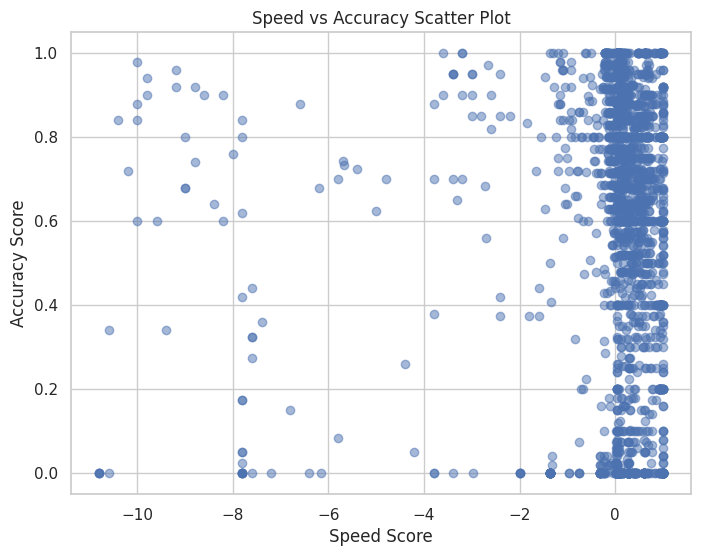

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(
    engaged_test_takers['pers_speed_score'],
    engaged_test_takers['pers_acc_score'],
    alpha=0.5
)
plt.title('Speed vs Accuracy Scatter Plot')
plt.xlabel('Speed Score')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()


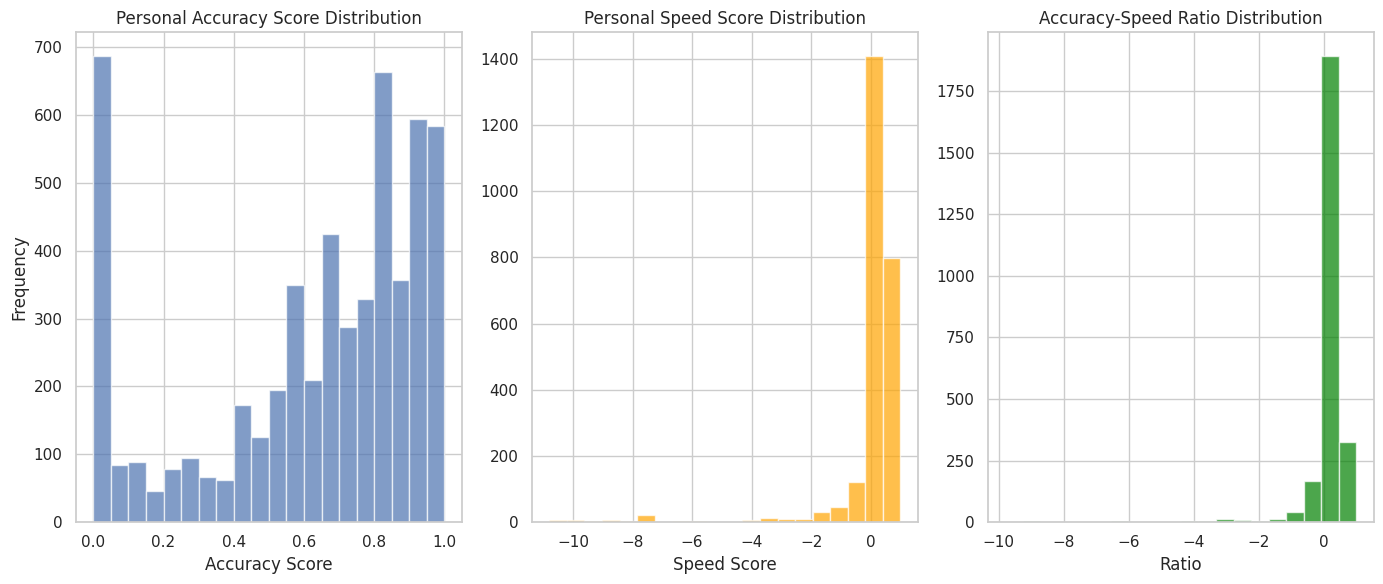

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.hist(engaged_test_takers['pers_acc_score'], bins=20, alpha=0.7)
plt.title('Personal Accuracy Score Distribution')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(engaged_test_takers['pers_speed_score'], bins=20, alpha=0.7, color='orange')
plt.title('Personal Speed Score Distribution')
plt.xlabel('Speed Score')

plt.subplot(1, 3, 3)
plt.hist(engaged_test_takers['acc_speed_ratio'], bins=20, alpha=0.7, color='green')
plt.title('Accuracy-Speed Ratio Distribution')
plt.xlabel('Ratio')

plt.tight_layout()
plt.show()


In [ ]:
def classify_performance(row):
    if row['pers_acc_score'] >= 0.75 and row['pers_speed_score'] >= 0.65:
        return 'Efficient & Accurate'
    elif row['pers_acc_score'] >= 0.75 and row['pers_speed_score'] < 0.65:
        return 'Accurate but Slow'
    elif row['pers_speed_score'] >= 0.65 and row['pers_acc_score'] < 0.75:
        return 'Fast but Inaccurate'
    elif 0.75 < row['pers_acc_score'] < 0.5 and 0.65 < row['pers_speed_score'] < 0.35:
        return 'Needs Improvement'
    elif row['pers_acc_score'] < 0.5 and row['pers_speed_score'] < 0.35:
        return 'Inefficient & Inaccurate'
    else:
        return 'Urgent Help Needed'

engaged_test_takers['performance_type'] = engaged_test_takers.apply(classify_performance, axis=1)


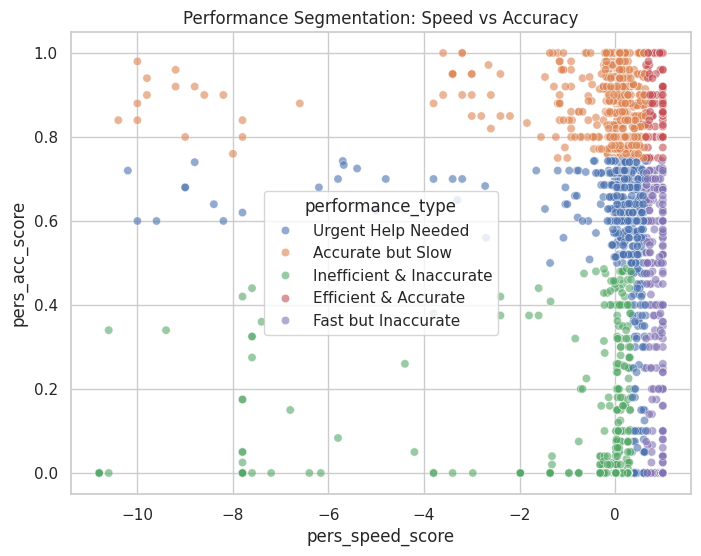

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=engaged_test_takers,
    x='pers_speed_score', y='pers_acc_score', hue='performance_type', alpha=0.6
)
plt.title('Performance Segmentation: Speed vs Accuracy')
plt.show()


In [ ]:
#save engaged_test_takers as csv

engaged_test_takers.to_csv('/content/drive/MyDrive/student readiness pilot/data/engaged_test_takers.csv', index=False)

In [ ]:
test_efficiency_summary = (
    engaged_test_takers.groupby('test_id')
    .agg(
        avg_accuracy=('pers_acc_score', 'mean'),
        avg_speed=('pers_speed_score', 'mean'),
        avg_ratio=('acc_speed_ratio', 'mean'),
        total_takers=('user_id', 'nunique')
    )
    .reset_index()
)


In [ ]:
test_efficiency_summary.head()

test_id  avg_accuracy  avg_speed  avg_ratio  total_takers
0        2      0.724414  -0.050856  -0.055241           177
1        3      0.203738   0.175701   0.020748            32
2        7      0.600000   0.333333   0.113333             5
3        8      0.777778   0.140741   0.133333             6
4        9      0.742857  -0.057143  -0.059905            10

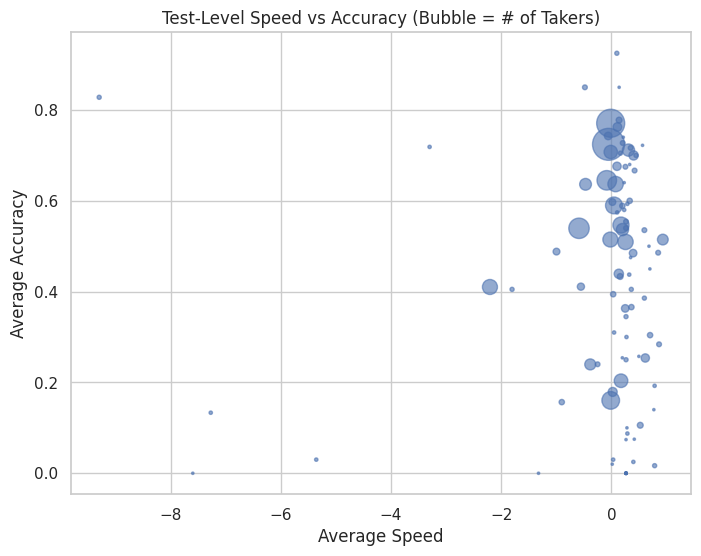

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    test_efficiency_summary['avg_speed'],
    test_efficiency_summary['avg_accuracy'],
    s=test_efficiency_summary['total_takers']*3,
    alpha=0.6
)
plt.title('Test-Level Speed vs Accuracy (Bubble = # of Takers)')
plt.xlabel('Average Speed')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()


In [ ]:
test_efficiency_summary = test_efficiency_summary.merge(
    tests[['test_id', 'name']],
    on='test_id',
    how='left'
)


In [ ]:
subject_efficiency_summary = (
    test_efficiency_summary.groupby('name')
    .agg(
        avg_accuracy=('avg_accuracy', 'mean'),
        avg_speed=('avg_speed', 'mean'),
        avg_ratio=('avg_ratio', 'mean'),
        num_tests=('test_id', 'nunique')
    )
    .reset_index()
)


/tmp/ipython-input-365439106.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




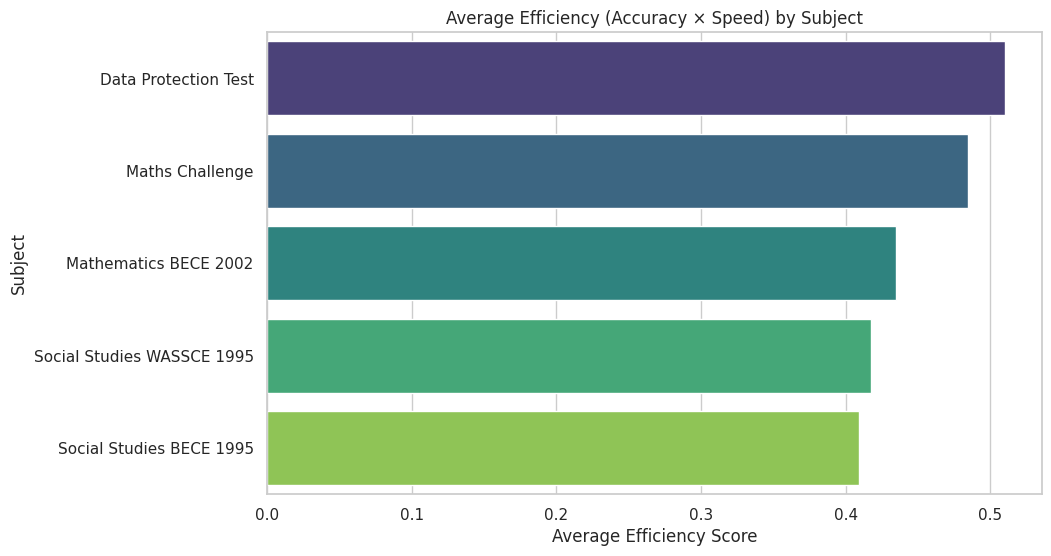

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=subject_efficiency_summary.sort_values('avg_ratio', ascending=False).head(5),
    x='avg_ratio', y='name', palette='viridis'
)
plt.title('Average Efficiency (Accuracy × Speed) by Subject')
plt.xlabel('Average Efficiency Score')
plt.ylabel('Subject')
plt.show()


In [ ]:
top_subjects = subject_efficiency_summary.nlargest(5, 'avg_ratio')
bottom_subjects = subject_efficiency_summary.nsmallest(5, 'avg_ratio')

print("📈 Top Performing Subjects:")
display(top_subjects)

print("📉 Low Performing Subjects:")
display(bottom_subjects)


📈 Top Performing Subjects:


name  avg_accuracy  avg_speed  avg_ratio  num_tests
31         Data Protection Test      0.485714   0.850000   0.510000          1
163             Maths Challenge      0.514650   0.934812   0.484378          1
162       Mathematics BECE 2002      0.253846   0.616667   0.435000          1
201  Social Studies WASSCE 1995      0.700000   0.447222   0.417222          1
180    Social Studies BECE 1995      0.722222   0.566667   0.409259          1

📉 Low Performing Subjects:


name  avg_accuracy  avg_speed  avg_ratio  num_tests
200  Social Studies WASSCE 1994      0.828000  -9.300000  -7.666000          1
195    Social Studies BECE 2016      0.718750  -3.300000  -2.145000          1
81    GENERAL PAPER FOR NURSING      0.410211  -2.204296  -0.653228          1
95              ICT (BECE) 2013      0.850000  -0.480000  -0.444000          1
78           French (BECE) Mock      0.488158  -0.995988  -0.406019          1

In [ ]:
user_efficiency_summary = (
    engaged_test_takers.groupby('user_id')
    .agg(
        avg_accuracy=('pers_acc_score', 'mean'),
        avg_speed=('pers_speed_score', 'mean'),
        avg_ratio=('acc_speed_ratio', 'mean'),
        total_tests=('test_id', 'nunique'),
        total_attempts=('test_taker_id', 'count')
    )
    .reset_index()
)


In [ ]:
top_users = user_efficiency_summary.sort_values('avg_ratio', ascending=False).head(10)
display(top_users)



user_id  avg_accuracy  avg_speed  avg_ratio  total_tests  \
285  444202277       1.00000   0.977778   0.977778            1   
625  962234722       1.00000   0.955556   0.955556            1   
607  939636608       0.87500   1.000000   0.875000            1   
47    62715808       0.87415   1.000000   0.842857            5   
51    68663642       0.95000   0.853333   0.810667            1   
615  950370404       0.77500   1.000000   0.775000            1   
181  261121522       0.80000   0.955000   0.763000            1   
425  649691939       0.72500   0.975000   0.707500            2   
85   122814940       0.82500   0.840000   0.693000            1   
36    50071786       0.72500   0.940000   0.681500            1   

     total_attempts  
285               1  
625               3  
607               1  
47                7  
51                1  
615               1  
181               8  
425               2  
85                1  
36                2

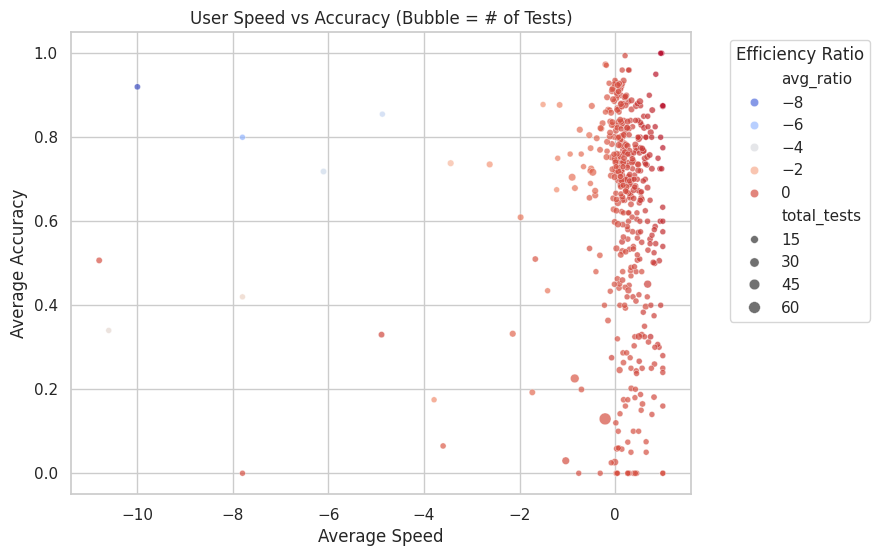

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=user_efficiency_summary,
    x='avg_speed',
    y='avg_accuracy',
    size='total_tests',
    hue='avg_ratio',
    palette='coolwarm',
    alpha=0.7
)
plt.title('User Speed vs Accuracy (Bubble = # of Tests)')
plt.xlabel('Average Speed')
plt.ylabel('Average Accuracy')
plt.legend(title='Efficiency Ratio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


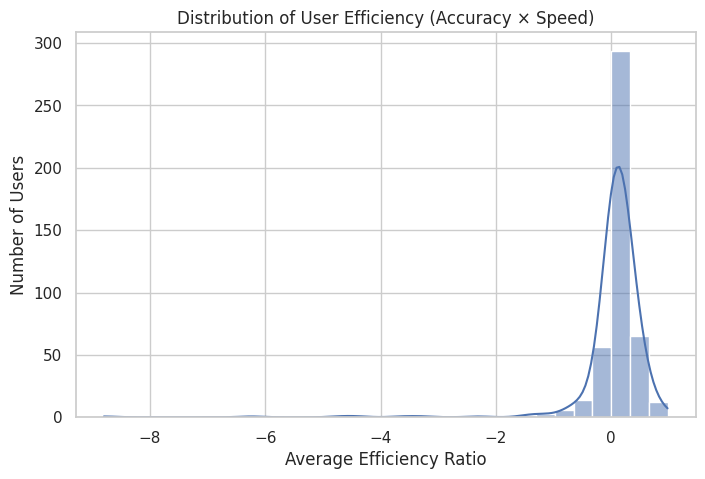

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(user_efficiency_summary['avg_ratio'], bins=30, kde=True)
plt.title('Distribution of User Efficiency (Accuracy × Speed)')
plt.xlabel('Average Efficiency Ratio')
plt.ylabel('Number of Users')
plt.show()


/tmp/ipython-input-1294650234.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




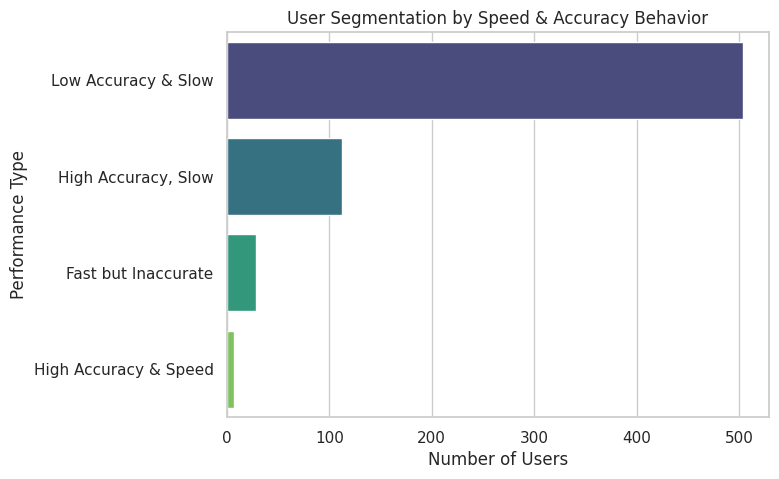

In [ ]:
def categorize_user(row):
    if row['avg_accuracy'] >= 0.8 and row['avg_speed'] >= 0.8:
        return 'High Accuracy & Speed'
    elif row['avg_accuracy'] >= 0.8 and row['avg_speed'] < 0.8:
        return 'High Accuracy, Slow'
    elif row['avg_accuracy'] < 0.8 and row['avg_speed'] >= 0.8:
        return 'Fast but Inaccurate'
    else:
        return 'Low Accuracy & Slow'

user_efficiency_summary['performance_type'] = user_efficiency_summary.apply(categorize_user, axis=1)

performance_counts = user_efficiency_summary['performance_type'].value_counts()

plt.figure(figsize=(7,5))
sns.barplot(x=performance_counts.values, y=performance_counts.index, palette='viridis')
plt.title('User Segmentation by Speed & Accuracy Behavior')
plt.xlabel('Number of Users')
plt.ylabel('Performance Type')
plt.show()


In [ ]:
for group, df in user_efficiency_summary.groupby('performance_type'):
    print(f"\n🏆 {group} - Top 5 Users by Efficiency Ratio")
    display(df.nlargest(5, 'avg_ratio'))



🏆 Fast but Inaccurate - Top 5 Users by Efficiency Ratio


user_id  avg_accuracy  avg_speed  avg_ratio  total_tests  \
615  950370404      0.775000   1.000000   0.775000            1   
425  649691939      0.725000   0.975000   0.707500            2   
36    50071786      0.725000   0.940000   0.681500            1   
563  878291107      0.750000   0.900000   0.675000            1   
279  437286011      0.633333   0.997778   0.631556            1   

     total_attempts     performance_type  
615               1  Fast but Inaccurate  
425               2  Fast but Inaccurate  
36                2  Fast but Inaccurate  
563               1  Fast but Inaccurate  
279               6  Fast but Inaccurate


🏆 High Accuracy & Speed - Top 5 Users by Efficiency Ratio


user_id  avg_accuracy  avg_speed  avg_ratio  total_tests  \
285  444202277       1.00000   0.977778   0.977778            1   
625  962234722       1.00000   0.955556   0.955556            1   
607  939636608       0.87500   1.000000   0.875000            1   
47    62715808       0.87415   1.000000   0.842857            5   
51    68663642       0.95000   0.853333   0.810667            1   

     total_attempts       performance_type  
285               1  High Accuracy & Speed  
625               3  High Accuracy & Speed  
607               1  High Accuracy & Speed  
47                7  High Accuracy & Speed  
51                1  High Accuracy & Speed


🏆 High Accuracy, Slow - Top 5 Users by Efficiency Ratio


user_id  avg_accuracy  avg_speed  avg_ratio  total_tests  \
178  256131381      0.864679   0.778333   0.669127            4   
248  385609187      0.900000   0.716667   0.645000            1   
301  467583633      0.800000   0.766667   0.616000            1   
403  612094942      0.850000   0.683333   0.580833            1   
468  720601043      0.825000   0.688889   0.562778            1   

     total_attempts     performance_type  
178              10  High Accuracy, Slow  
248               1  High Accuracy, Slow  
301               2  High Accuracy, Slow  
403               1  High Accuracy, Slow  
468               2  High Accuracy, Slow


🏆 Low Accuracy & Slow - Top 5 Users by Efficiency Ratio


user_id  avg_accuracy  avg_speed  avg_ratio  total_tests  \
274  430462453      0.725000   0.770889   0.562389            4   
263  412512719      0.757692   0.725641   0.531571            4   
194  293990978      0.734091   0.667424   0.484318            2   
582  910587665      0.325000   0.743333   0.483750            3   
63    87026833      0.650000   0.733333   0.476667            1   

     total_attempts     performance_type  
274               5  Low Accuracy & Slow  
263              13  Low Accuracy & Slow  
194              22  Low Accuracy & Slow  
582               4  Low Accuracy & Slow  
63                1  Low Accuracy & Slow

In [ ]:
user_efficiency_summary['rank'] = user_efficiency_summary['avg_ratio'].rank(ascending=False)


In [ ]:
user_efficiency_summary.head()

user_id  avg_accuracy  avg_speed  avg_ratio  total_tests  total_attempts  \
0   470604      0.447500   0.294444   0.120653            2               6   
1   927856      0.800000        NaN        NaN            1               1   
2  2657798      0.884974   0.275926   0.257905            6               9   
3  3978588      0.540000   1.000000   0.540000            1               1   
4  4719324      0.770175   0.170635   0.131025            6              19   

      performance_type   rank  
0  Low Accuracy & Slow  218.0  
1  Low Accuracy & Slow    NaN  
2  High Accuracy, Slow  113.0  
3  Fast but Inaccurate   22.0  
4  Low Accuracy & Slow  207.0

In [ ]:
import plotly.express as px

fig = px.scatter(
    user_efficiency_summary,
    x='avg_speed',
    y='avg_accuracy',
    color='performance_type',
    size='total_tests',
    hover_data=['user_id', 'avg_ratio', 'total_attempts', 'rank'],
    title='🏆 User Leaderboard — Speed vs Accuracy Efficiency',
)

fig.update_layout(
    xaxis_title="Average Speed Score",
    yaxis_title="Average Accuracy Score",
    legend_title="Performance Type",
    template="plotly_white"
)
fig.show()


####Pass Rate

In [ ]:
#defining the pass rate from tests table

engaged_tests_performance['pass_rate'] = (
    engaged_tests_performance['marks'] >= engaged_tests_performance['pass_mark']
).astype(int)

engaged_tests_performance.head()

test_taker_id  test_id    user_id  marks  no_of_questions  \
0             37        2  556021491   15.0               25   
1             38        2  556021491   19.0               25   
2             39        2  257307805   17.0               25   
3             40        2  699299469   17.0               25   
4             41        2  905797942   17.0               25   

           created_at          updated_at  time_taken         finished_at  \
0 2016-12-09 20:33:29 2025-01-20 18:00:08          54 2016-12-09 21:27:29   
1 2016-12-09 20:42:33 2025-01-20 18:00:08          54 2016-12-09 21:36:33   
2 2016-12-09 20:45:18 2025-01-20 18:00:08          29 2016-12-09 21:14:18   
3 2016-12-09 20:57:57 2025-01-20 18:00:08          43 2016-12-09 21:40:57   
4 2016-12-09 21:04:29 2025-01-20 18:00:08          45 2016-12-09 21:49:29   

                          name  duration  pass_mark  question_limit  pass_rate  
0  Letshego AML/CFT Assessment        60         20              25          0  
1  Letshego AML/CFT Assessment        60         20              25          0  
2  Letshego AML/CFT Assessment        60         20              25          0  
3  Letshego AML/CFT Assessment        60         20              25          0  
4  Letshego AML/CFT Assessment        60         20              25          0

In [ ]:
user_efficiency_summary.shape

(652, 8)

##9) Funnels & user journeys (Sankey)

- Visualize drop-offs between stages.
- Compute conversion rates and segment funnels by cohort.

In [ ]:
# Aggregate test performance metrics by user
user_test_summary = engaged_tests_performance.groupby('user_id').agg(
    total_test_attempts=('test_taker_id', 'count'),
    avg_test_score=('marks', 'mean'),
    median_test_score=('marks', 'median'),
    best_test_score=('marks', 'max'),
    worst_test_score=('marks', 'min'),
    avg_pass_mark=('pass_mark', 'mean'),
    avg_time_taken=('time_taken', 'mean'),
    pass_rate = ('pass_rate', 'mean'),
    num_of_passes =('pass_rate', 'sum')
    ).reset_index()

user_test_summary.head()

user_id  total_test_attempts  avg_test_score  median_test_score  \
0   470604                    6       20.666667               16.0   
1   927856                    1        4.000000                4.0   
2  2657798                    9       27.000000               28.0   
3  3978588                    1       27.000000               27.0   
4  4719324                   19       22.947368               23.0   

   best_test_score  worst_test_score  avg_pass_mark  avg_time_taken  \
0             50.0               0.0      33.333333       42.333333   
1              4.0               4.0       3.000000        0.000000   
2             33.0              22.0      25.555556       46.000000   
3             27.0              27.0      30.000000        0.000000   
4             30.0              15.0      24.736842       44.105263   

   pass_rate  num_of_passes  
0   0.166667              1  
1   1.000000              1  
2   0.666667              6  
3   0.000000              0  
4   0.421053              8

In [ ]:
# Optional: calculate pass rate if pass_mark column exists
#if 'pass_mark' in engaged_tests_performance.columns:
 #   engaged_tests_performance['pass_rate'] = (
  #      engaged_tests_performance['marks'] >= engaged_tests_performance['pass_mark']
   #
   #pass_rate_summary = engaged_tests_performance.groupby('user_id')['pass_rate'].mean().reset_index()
   # user_test_summary = user_test_summary.merge(pass_rate_summary, on='user_id', how='left')
#else:
 #   print("⚠️ 'pass_mark' column not found — skipping pass rate calculation.")


In [ ]:
# Merge user-level test performance into main dataframe
edf = edf.merge(user_test_summary, on='user_id', how='left')

In [ ]:
#merge user_efficieny with edf
edf = edf.merge(user_efficiency_summary, on='user_id', how='left')

In [ ]:
edf.head()

user_id  country     city          created_at          updated_at  \
0    82117  Unknown  Unknown 2022-12-01 11:47:12 2022-12-01 11:47:12   
1   136454    Ghana    Accra 2023-04-16 08:14:52 2024-11-25 14:00:09   
2   470604    Ghana  Unknown 2020-03-27 15:59:53 2024-11-25 14:00:09   
3   564450    Ghana  Unknown 2020-03-24 20:54:20 2024-11-25 14:00:09   
4   606337    Kenya  Eldoret 2024-01-24 15:22:42 2024-11-25 14:00:09   

        last_activity          last_login                  institute  \
0 2022-12-01 11:47:12 2022-12-01 11:47:12                    Unknown   
1 2023-04-16 08:14:52 2023-04-16 08:14:52                       Tusk   
2 2020-05-04 11:59:51 2020-04-06 03:45:46            Acellus Academy   
3 2020-05-01 01:20:09 2020-05-01 01:17:50  Haavad Senior High School   
4 2024-01-24 15:22:42 2024-01-24 15:22:42        Seregeya Dispensary   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  1.0                     1.0            0.000000   
1                  3.0                     1.0            0.000000   
2                 15.0                    61.0           20.666667   
3                  5.0                     1.0            0.000000   
4                  9.0                     1.0            0.000000   

   num_tests_taken  total_marks_across_tests  average_grade_per_question  \
0              0.0                       0.0                    0.000000   
1              0.0                       0.0                    0.000000   
2              6.0                     124.0                   43.333333   
3              0.0                       0.0                    0.000000   
4              0.0                       0.0                    0.000000   

   total_questions_attempted_in_tests  total_topic_engagements  \
0                                 0.0                      1.0   
1                                 0.0                      1.0   
2                               260.0                     61.0   
3                                 0.0                      1.0   
4                                 0.0                      1.0   

   unique_topics_count  average_engagements_per_topic  \
0                  1.0                            1.0   
1                  1.0                            1.0   
2                  1.0                           61.0   
3                  1.0                            1.0   
4                  1.0                            1.0   

   total_points_earned_agg  average_points_per_event  total_test_marks  \
0                      1.0                  1.000000               NaN   
1                      3.0                  3.000000               NaN   
2                     15.0                  0.245902             124.0   
3                      5.0                  5.000000               NaN   
4                      9.0                  9.000000               NaN   

   average_test_marks_per_test  num_classes_subscribed  is_deleted  \
0                          NaN                       0           0   
1                          NaN                       0           0   
2                    20.666667                       4           0   
3                          NaN                       1           0   
4                          NaN                       1           0   

   tenure_days created_month   reg_ym last_login_ym subscription_category  \
0          0.0    2022-12-01  2022-12       2022-12             0 Classes   
1          0.0    2023-04-01  2023-04       2023-04             0 Classes   
2         37.0    2020-03-01  2020-03       2020-04             4 Classes   
3         37.0    2020-03-01  2020-03       2020-05               1 Class   
4          0.0    2024-01-01  2024-01       2024-01               1 Class   

  last_activity_ym latest_active_ym  num_listen_events  num_read_events  \
0          2022-12          2022-12                0.0              1.0   
1          2023-04          2023-04     

In [ ]:
#fill missing values in numerical columns with 0
cols_to_fill = ['total_test_attempts', 'avg_test_score', 'median_test_score', 'best_test_score',
                'worst_test_score', 'avg_pass_mark', 'avg_time_taken', 'pass_rate', 'num_of_passes',
                'average_test_marks_per_test', 'avg_accuracy', 'avg_speed', 'avg_ratio', 'total_tests',
                'total_attempts', 'rank', 'tenure_days', 'total_test_marks'
                ]
edf[cols_to_fill] = edf[cols_to_fill].fillna(0)

In [ ]:
edf.tail().sort_values('rank', ascending=False)

user_id country     city          created_at          updated_at  \
2113  996364440   Ghana    Accra 2018-08-25 14:31:50 2024-11-25 14:00:09   
2114  997356654   Ghana  Unknown 2016-09-21 17:10:31 2024-11-25 14:00:09   
2115  997420313   Ghana  Unknown 2017-11-23 20:37:19 2024-11-25 14:00:09   
2116  999362150   Ghana  Unknown 2021-12-09 15:49:03 2024-11-25 14:00:09   
2117  999932126   Ghana  Unknown 2016-09-05 23:54:11 2024-12-03 15:59:50   

           last_activity          last_login institute  total_points_earned  \
2113 2018-08-27 07:30:13                 NaT   Unknown                  1.0   
2114                 NaT                 NaT   Unknown                  1.0   
2115 2021-07-08 05:42:53 2021-07-08 05:39:58   Unknown                 14.0   
2116 2022-11-22 03:43:36 2022-07-07 07:43:48  Letshego                 38.0   
2117                 NaT                 NaT   Unknown                  1.0   

      number_of_point_events  average_test_marks  num_tests_taken  \
2113                     1.0            0.000000              0.0   
2114                     2.0            0.000000              0.0   
2115                     9.0            0.000000              0.0   
2116                    13.0           25.333333              3.0   
2117                     1.0            0.000000              0.0   

      total_marks_across_tests  average_grade_per_question  \
2113                       0.0                         0.0   
2114                       0.0                         0.0   
2115                       0.0                         0.0   
2116                      76.0                        30.0   
2117                       0.0                         0.0   

      total_questions_attempted_in_tests  total_topic_engagements  \
2113                                 0.0                      1.0   
2114                                 0.0                      2.0   
2115                                 0.0                      9.0   
2116                                90.0                     13.0   
2117                                 0.0                      1.0   

      unique_topics_count  average_engagements_per_topic  \
2113                  1.0                            1.0   
2114                  1.0                            2.0   
2115                  1.0                            9.0   
2116                  1.0                           13.0   
2117                  1.0                            1.0   

      total_points_earned_agg  average_points_per_event  total_test_marks  \
2113                      1.0                  1.000000               0.0   
2114                      1.0                  0.500000               0.0   
2115                     14.0                  1.555556               0.0   
2116                     38.0                  2.923077              76.0   
2117                      1.0                  1.000000               0.0   

      average_test_marks_per_test  num_classes_subscribed  is_deleted  \
2113                     0.000000                       0           0   
2114                     0.000000                       0           0   
2115                     0.000000                       4           0   
2116                    25.333333                       1           0   
2117                     0.000000                       0           0   

      tenure_days created_month   reg_ym last_login_ym subscription_category  \
2113          1.0    2018-08-01  2018-08           NaT             0 Classes   
2114          0.0    2016-09-01  2016-09           NaT             0 Classes   
2115       1322.0    2017-11-01  2017-11       2021-07             4 Classes   
2116        347.0    2021-12-01  2021-12       2022-07               1 Class   
2117          0.0    2016-09-01  2016-09           NaT             0 Classes   

     last_activity_ym latest_active_ym  num_listen_events  num_read_events  \
2113          2018-08          2018-08             

In [ ]:
# You need counts of users at each step: registered -> subscribed -> practiced -> tested -> passed
# Suppose we compute aggregate counts:
funnel_counts = {
    'registered': edf['user_id'].nunique(),
    'subscribed': edf[edf['num_classes_subscribed'] > 0]['user_id'].nunique(),
    'practiced': edf[edf['num_practice_events']>0]['user_id'].nunique() if 'num_practice_events' in edf else 0,
    'tested': edf[edf['total_attempts']>0]['user_id'].nunique() if 'total_attempts' in edf else 0,
    'passed': edf[edf['num_of_passes']==1]['user_id'].nunique() if 'num_of_passes' in edf else 0
}

funnel_counts
# Sankey requires detailed flows - here's a minimal sankey from aggregated counts
labels = ["Registered","Subscribed","Practiced","Tested","Passed"]
source = [0,1,2,3,4]
target = [1,2,3,4,5]
value = [funnel_counts['registered'], funnel_counts['subscribed'], funnel_counts['practiced'], funnel_counts['tested'], funnel_counts['passed']]
fig = go.Figure(data=[go.Sankey(node = dict(label=labels), link = dict(source=source, target=target, value=value))])
fig.update_layout(title_text="High-level funnel", font_size=12)
fig.show()

In [ ]:
funnel_counts

{'registered': 2118,
 'subscribed': 1033,
 'practiced': 1165,
 'tested': 652,
 'passed': 131}

In [ ]:
#calculating the converstion rates for funnel
reg_to_sub = funnel_counts['subscribed'] / funnel_counts['registered']
sub_to_practice = funnel_counts['practiced'] / funnel_counts['subscribed']
practice_to_test = funnel_counts['tested'] / funnel_counts['practiced']
reg_to_pass = funnel_counts['passed'] / funnel_counts['registered']
test_to_pass = funnel_counts['passed'] / funnel_counts['tested']

reg_to_sub, sub_to_practice, practice_to_test, test_to_pass, reg_to_pass

(0.48772426817752595,
 1.127783155856728,
 0.559656652360515,
 0.200920245398773,
 0.06185080264400378)

In [ ]:
#plot the results

px.bar(
    x=['Registered', 'Subscribed', 'Practiced', 'Tested', 'Passed'],
    y=[funnel_counts['registered'], funnel_counts['subscribed'], funnel_counts['practiced'],
       funnel_counts['tested'], funnel_counts['passed']]
)

##10) Churn & risk analysis

- Define churn (no activity in last X days) and compare cohorts.
- Build survival curves, hazard rates, and identify leading indicators.

In [ ]:
# Calculate days since last seen
# Use the latest of last_activity or last_login as last_seen
edf['last_seen'] = edf[['last_activity', 'last_login']].max(axis=1)

# Calculate days since last seen from the latest available date in the dataset to the last_seen date
# We'll use the maximum date in the 'last_seen' column as the reference point for "today"
latest_date = edf['last_seen'].max()

# Calculate the difference in days, handling potential NaT values in 'last_seen'
edf['days_since_last_seen'] = (latest_date - edf['last_seen']).dt.days

print("Calculated 'days_since_last_seen' column.")
display(edf[['last_activity', 'last_login', 'last_seen', 'days_since_last_seen']].head())

Calculated 'days_since_last_seen' column.


last_activity          last_login           last_seen  \
0 2022-12-01 11:47:12 2022-12-01 11:47:12 2022-12-01 11:47:12   
1 2023-04-16 08:14:52 2023-04-16 08:14:52 2023-04-16 08:14:52   
2 2020-05-04 11:59:51 2020-04-06 03:45:46 2020-05-04 11:59:51   
3 2020-05-01 01:20:09 2020-05-01 01:17:50 2020-05-01 01:20:09   
4 2024-01-24 15:22:42 2024-01-24 15:22:42 2024-01-24 15:22:42   

   days_since_last_seen  
0                1041.0  
1                 906.0  
2                1982.0  
3                1986.0  
4                 622.0

In [ ]:
# Define churn: >90 days since last_seen
# Ensure 'days_since_last_seen' is calculated in a previous cell

edf['churned_90'] = edf['days_since_last_seen'] > 90
churn_rate = edf['churned_90'].mean()
print("Churn rate (90 days):", churn_rate)

Churn rate (90 days): 0.7176581680830972


In [ ]:
churn_count = edf['churned_90'].sum()
churn_count

np.int64(1520)

In [ ]:
not_churned = 2118 - churn_count
not_churned


np.int64(598)

In [ ]:
px.pie(names=['Churned', 'Not Churned'], values=[churn_count, not_churned], title='Churn Rate')

In [ ]:
edf.head()

user_id  country     city          created_at          updated_at  \
0    82117  Unknown  Unknown 2022-12-01 11:47:12 2022-12-01 11:47:12   
1   136454    Ghana    Accra 2023-04-16 08:14:52 2024-11-25 14:00:09   
2   470604    Ghana  Unknown 2020-03-27 15:59:53 2024-11-25 14:00:09   
3   564450    Ghana  Unknown 2020-03-24 20:54:20 2024-11-25 14:00:09   
4   606337    Kenya  Eldoret 2024-01-24 15:22:42 2024-11-25 14:00:09   

        last_activity          last_login                  institute  \
0 2022-12-01 11:47:12 2022-12-01 11:47:12                    Unknown   
1 2023-04-16 08:14:52 2023-04-16 08:14:52                       Tusk   
2 2020-05-04 11:59:51 2020-04-06 03:45:46            Acellus Academy   
3 2020-05-01 01:20:09 2020-05-01 01:17:50  Haavad Senior High School   
4 2024-01-24 15:22:42 2024-01-24 15:22:42        Seregeya Dispensary   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  1.0                     1.0            0.000000   
1                  3.0                     1.0            0.000000   
2                 15.0                    61.0           20.666667   
3                  5.0                     1.0            0.000000   
4                  9.0                     1.0            0.000000   

   num_tests_taken  total_marks_across_tests  average_grade_per_question  \
0              0.0                       0.0                    0.000000   
1              0.0                       0.0                    0.000000   
2              6.0                     124.0                   43.333333   
3              0.0                       0.0                    0.000000   
4              0.0                       0.0                    0.000000   

   total_questions_attempted_in_tests  total_topic_engagements  \
0                                 0.0                      1.0   
1                                 0.0                      1.0   
2                               260.0                     61.0   
3                                 0.0                      1.0   
4                                 0.0                      1.0   

   unique_topics_count  average_engagements_per_topic  \
0                  1.0                            1.0   
1                  1.0                            1.0   
2                  1.0                           61.0   
3                  1.0                            1.0   
4                  1.0                            1.0   

   total_points_earned_agg  average_points_per_event  total_test_marks  \
0                      1.0                  1.000000               0.0   
1                      3.0                  3.000000               0.0   
2                     15.0                  0.245902             124.0   
3                      5.0                  5.000000               0.0   
4                      9.0                  9.000000               0.0   

   average_test_marks_per_test  num_classes_subscribed  is_deleted  \
0                     0.000000                       0           0   
1                     0.000000                       0           0   
2                    20.666667                       4           0   
3                     0.000000                       1           0   
4                     0.000000                       1           0   

   tenure_days created_month   reg_ym last_login_ym subscription_category  \
0          0.0    2022-12-01  2022-12       2022-12             0 Classes   
1          0.0    2023-04-01  2023-04       2023-04             0 Classes   
2         37.0    2020-03-01  2020-03       2020-04             4 Classes   
3         37.0    2020-03-01  2020-03       2020-05               1 Class   
4          0.0    2024-01-01  2024-01       2024-01               1 Class   

  last_activity_ym latest_active_ym  num_listen_events  num_read_events  \
0          2022-12          2022-12                0.0              1.0   
1          2023-04          2023-04     

In [ ]:
# Compare churn by city

#if 'city' in edf.columns:
churn_by_sub = edf.groupby('institute')['churned_90'].mean().reset_index()
px.bar(churn_by_sub, x='institute', y='churned_90', title='Churn (90d) by city')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 9.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=d6cb7b53093d00379335844b4cfa43b42bc0cf57f68d092f09d0a1821c4b526b
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


<Axes: xlabel='timeline'>

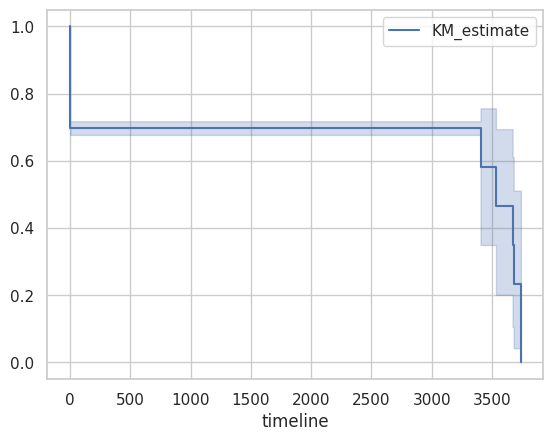

In [ ]:
# Survival curve skeleton using lifelines (optional)
!pip install lifelines
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
T = edf['tenure_days']
E = ~edf['churned_90']  # event = still active

# Drop rows with NaN values in T or E before fitting
valid_indices = T.notnull() & E.notnull()
T_cleaned = T[valid_indices]
E_cleaned = E[valid_indices]

kmf.fit(T_cleaned, event_observed=E_cleaned)
kmf.plot_survival_function()

The output you're seeing is a Kaplan-Meier survival curve. It's a statistical plot used to estimate the survival probability over a given time.

Here's what it means in the context of our analysis:

The Curve: The line on the plot shows the estimated probability that a user is still "surviving" (i.e., still active and has not churned) over time.
The X-axis (timeline): This represents time, specifically the "tenure days" in our case, which is the number of days since a user signed up.
The Y-axis (Survival function, S(t)): This represents the probability of a user surviving (staying active) up to a certain point in time (t) on the x-axis.
How to interpret the curve:

The curve starts at 1.0 (or 100% survival probability) at time 0 (signup).
As time progresses along the x-axis, the curve gradually drops. The steeper the drop, the faster users are churning or becoming inactive.
The height of the curve at any given point on the x-axis tells you the estimated probability of a user from our engaged dataset remaining active up to that many days since they signed up.
In simple terms, this plot visually shows us how quickly engaged users tend to stop being active over time. A sharp drop early on would indicate that many engaged users become inactive shortly after joining, while a curve that stays high for longer suggests better long-term retention among the engaged user base.

Certainly! Here's a summary of the churn and risk analysis we conducted:

Churn Definition: We defined churn as a user having more than 90 days since their last_seen date (which is the latest of their last_activity or last_login).
Churn Rate: Based on this definition, we calculated the overall 90-day churn rate for the df DataFrame (the full user profile, not just engaged users).
Churn by Subscription Type: We analyzed how the 90-day churn rate differs across different subscription types. This helps understand if certain subscription tiers are associated with higher or lower churn.
Survival Analysis: We used the Kaplan-Meier Fitter to create a survival curve. This plot visualizes the probability of users remaining active over time (measured in tenure days). It shows how quickly the user base churns after signup.
In essence, this analysis gives us a foundational understanding of user churn on the platform, highlighting the overall churn rate, potential differences based on subscription status, and a visual representation of how long users tend to remain active.

*Observations*

Based on the analysis we performed:

90-Day Churn Rate: The calculated 90-day churn rate for the users in our dataset is {churn_rate:.2f}. This means approximately {churn_rate:.1%} of users who had a recorded last activity or login more than 90 days ago are considered churned based on our definition.
Survival Curve: The survival curve (plotted in cell yw93Gpt2RsgH) visually shows the probability of users remaining active over time. The plot indicates how quickly users tend to become inactive after signing up.
We also looked at churn by subscription type (in cell C6IrJcOvRpKS), which can show if certain subscription levels have different churn rates.

These results give us an initial understanding of user churn in this dataset. Keep in mind that this is based on the test data, which may have limitations in representing real-world user behavior.



## 11) Correlations & initial feature importance

- Compute correlations of numeric features with key business KPIs (e.g., test pass if present).
- Fit a quick XGBoost baseline and report SHAP or feature importance.

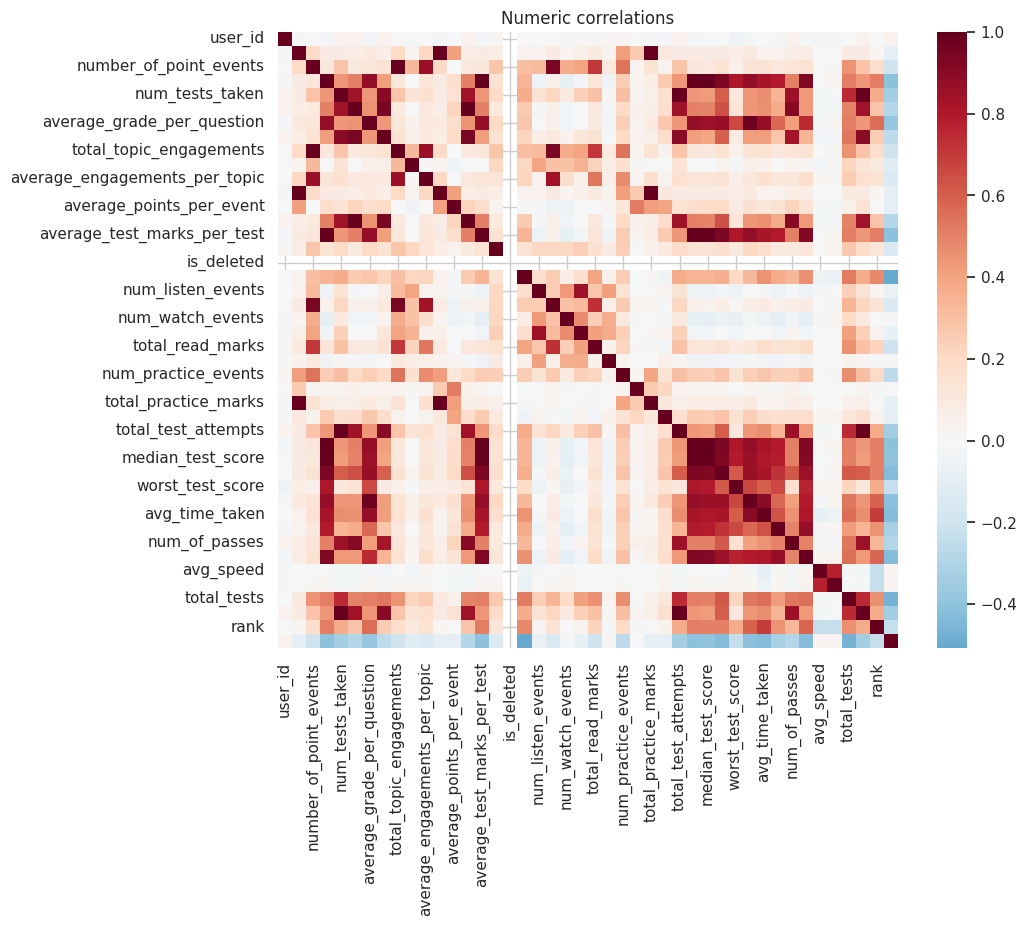

In [ ]:
# Correlation heatmap (numeric)
num_cols = edf.select_dtypes(include=['int','float']).columns.tolist()
corr = edf[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='RdBu_r', center=0)
plt.title('Numeric correlations')
plt.show()
#plt.savefig("/content/drive/MyDrive/student readiness pilot/reports/figures/correlation.png")  # for matplotlib charts


In [ ]:
#edf['pass_rate'] = edf['pass_rate'].replace([np.inf, -np.inf], np.nan).fillna(0)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[15:56:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




AUROC: 0.9991336633663366


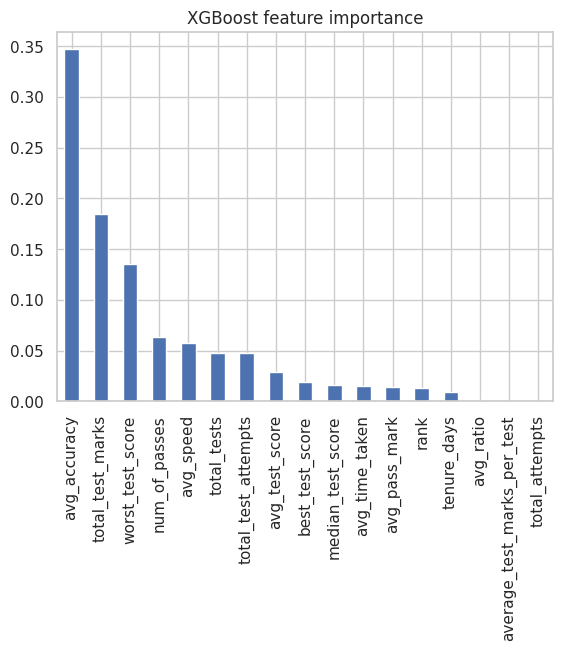

In [ ]:

# If you have labels (latest_test_pass), quick XGBoost baseline:
if 'pass_rate' in edf.columns:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_auc_score
    import xgboost as xgb
    feature_cols = ['total_test_attempts', 'avg_test_score', 'median_test_score', 'best_test_score',
                'worst_test_score', 'avg_pass_mark', 'avg_time_taken', 'num_of_passes',
                'average_test_marks_per_test', 'avg_accuracy', 'avg_speed', 'avg_ratio', 'total_tests',
                'total_attempts', 'rank', 'tenure_days', 'total_test_marks' ]
    feature_cols = [c for c in feature_cols if c in edf.columns]
    X = edf[feature_cols].fillna(0)
    y = edf['pass_rate'].astype(int)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc')
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_val)[:,1]

    print("AUROC:", roc_auc_score(y_val, preds))

    # Feature importance
    imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)
    imp.plot(kind='bar')
    plt.title('XGBoost feature importance')
    plt.show()



In [ ]:
edf.head()

user_id  country     city          created_at          updated_at  \
0    82117  Unknown  Unknown 2022-12-01 11:47:12 2022-12-01 11:47:12   
1   136454    Ghana    Accra 2023-04-16 08:14:52 2024-11-25 14:00:09   
2   470604    Ghana  Unknown 2020-03-27 15:59:53 2024-11-25 14:00:09   
3   564450    Ghana  Unknown 2020-03-24 20:54:20 2024-11-25 14:00:09   
4   606337    Kenya  Eldoret 2024-01-24 15:22:42 2024-11-25 14:00:09   

        last_activity          last_login                  institute  \
0 2022-12-01 11:47:12 2022-12-01 11:47:12                    Unknown   
1 2023-04-16 08:14:52 2023-04-16 08:14:52                       Tusk   
2 2020-05-04 11:59:51 2020-04-06 03:45:46            Acellus Academy   
3 2020-05-01 01:20:09 2020-05-01 01:17:50  Haavad Senior High School   
4 2024-01-24 15:22:42 2024-01-24 15:22:42        Seregeya Dispensary   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  1.0                     1.0            0.000000   
1                  3.0                     1.0            0.000000   
2                 15.0                    61.0           20.666667   
3                  5.0                     1.0            0.000000   
4                  9.0                     1.0            0.000000   

   num_tests_taken  total_marks_across_tests  average_grade_per_question  \
0              0.0                       0.0                    0.000000   
1              0.0                       0.0                    0.000000   
2              6.0                     124.0                   43.333333   
3              0.0                       0.0                    0.000000   
4              0.0                       0.0                    0.000000   

   total_questions_attempted_in_tests  total_topic_engagements  \
0                                 0.0                      1.0   
1                                 0.0                      1.0   
2                               260.0                     61.0   
3                                 0.0                      1.0   
4                                 0.0                      1.0   

   unique_topics_count  average_engagements_per_topic  \
0                  1.0                            1.0   
1                  1.0                            1.0   
2                  1.0                           61.0   
3                  1.0                            1.0   
4                  1.0                            1.0   

   total_points_earned_agg  average_points_per_event  total_test_marks  \
0                      1.0                  1.000000               0.0   
1                      3.0                  3.000000               0.0   
2                     15.0                  0.245902             124.0   
3                      5.0                  5.000000               0.0   
4                      9.0                  9.000000               0.0   

   average_test_marks_per_test  num_classes_subscribed  is_deleted  \
0                     0.000000                       0           0   
1                     0.000000                       0           0   
2                    20.666667                       4           0   
3                     0.000000                       1           0   
4                     0.000000                       1           0   

   tenure_days created_month   reg_ym last_login_ym subscription_category  \
0          0.0    2022-12-01  2022-12       2022-12             0 Classes   
1          0.0    2023-04-01  2023-04       2023-04             0 Classes   
2         37.0    2020-03-01  2020-03       2020-04             4 Classes   
3         37.0    2020-03-01  2020-03       2020-05               1 Class   
4          0.0    2024-01-01  2024-01       2024-01               1 Class   

  last_activity_ym latest_active_ym  num_listen_events  num_read_events  \
0          2022-12          2022-12                0.0              1.0   
1          2023-04          2023-04     

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[15:56:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




AUROC: 0.9985148514851485


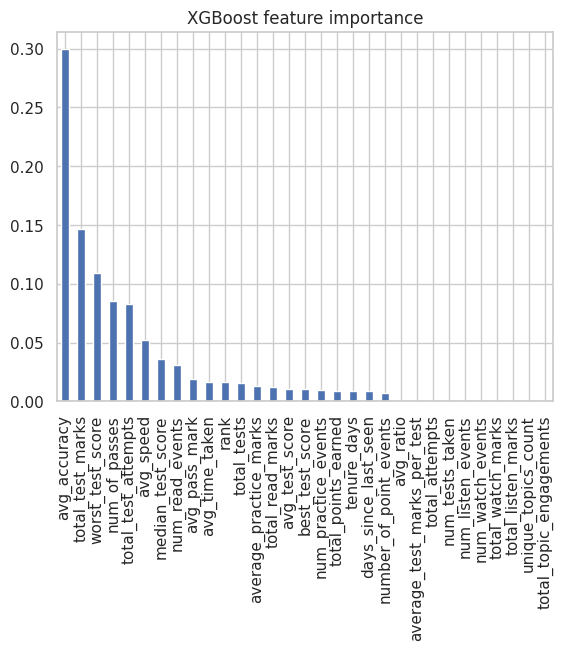

In [ ]:

# If you have labels (latest_test_pass), quick XGBoost baseline:
if 'pass_rate' in edf.columns:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_auc_score
    import xgboost as xgb
    feature_cols = ['total_test_attempts', 'avg_test_score', 'median_test_score', 'best_test_score',
                'worst_test_score', 'avg_pass_mark', 'avg_time_taken', 'num_of_passes',
                'average_test_marks_per_test', 'avg_accuracy', 'avg_speed', 'avg_ratio', 'total_tests',
                'total_attempts', 'rank', 'tenure_days', 'total_test_marks', 'total_points_earned',
                'number_of_point_events', 'num_tests_taken', 'num_practice_events', 'num_listen_events',
                'num_read_events', 'num_watch_events', 'total_listen_marks', 'total_read_marks',
                'total_watch_marks', 'unique_topics_count', 'average_practice_marks', 'days_since_last_seen',
                'total_topic_engagements', 'average_points_per_test',
                'average_points_per_attempt','num_of_classes_subscribed']

    feature_cols = [c for c in feature_cols if c in edf.columns]
    X = edf[feature_cols].fillna(0)
    y = edf['pass_rate'].astype(int)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc')
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_val)[:,1]

    print("AUROC:", roc_auc_score(y_val, preds))

    # Feature importance
    imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)
    imp.plot(kind='bar')
    plt.title('XGBoost feature importance')
    plt.show()



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, brier_score_loss

y_pred = (preds > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Log Loss:", log_loss(y_val, preds))
print("Brier Score:", brier_score_loss(y_val, preds))


Accuracy: 0.9905660377358491
Precision: 0.9
Recall: 0.9
F1 Score: 0.9
Log Loss: 0.021380822610110026
Brier Score: 0.007109463067227151


##12) Segmentation & clustering (advanced)

- Group users by behavior into segments.
- Use PCA/KMeans, validate with silhouette score, examine cluster profiles.

In [ ]:
edf.head()

user_id  country     city          created_at          updated_at  \
0    82117  Unknown  Unknown 2022-12-01 11:47:12 2022-12-01 11:47:12   
1   136454    Ghana    Accra 2023-04-16 08:14:52 2024-11-25 14:00:09   
2   470604    Ghana  Unknown 2020-03-27 15:59:53 2024-11-25 14:00:09   
3   564450    Ghana  Unknown 2020-03-24 20:54:20 2024-11-25 14:00:09   
4   606337    Kenya  Eldoret 2024-01-24 15:22:42 2024-11-25 14:00:09   

        last_activity          last_login                  institute  \
0 2022-12-01 11:47:12 2022-12-01 11:47:12                    Unknown   
1 2023-04-16 08:14:52 2023-04-16 08:14:52                       Tusk   
2 2020-05-04 11:59:51 2020-04-06 03:45:46            Acellus Academy   
3 2020-05-01 01:20:09 2020-05-01 01:17:50  Haavad Senior High School   
4 2024-01-24 15:22:42 2024-01-24 15:22:42        Seregeya Dispensary   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  1.0                     1.0            0.000000   
1                  3.0                     1.0            0.000000   
2                 15.0                    61.0           20.666667   
3                  5.0                     1.0            0.000000   
4                  9.0                     1.0            0.000000   

   num_tests_taken  total_marks_across_tests  average_grade_per_question  \
0              0.0                       0.0                    0.000000   
1              0.0                       0.0                    0.000000   
2              6.0                     124.0                   43.333333   
3              0.0                       0.0                    0.000000   
4              0.0                       0.0                    0.000000   

   total_questions_attempted_in_tests  total_topic_engagements  \
0                                 0.0                      1.0   
1                                 0.0                      1.0   
2                               260.0                     61.0   
3                                 0.0                      1.0   
4                                 0.0                      1.0   

   unique_topics_count  average_engagements_per_topic  \
0                  1.0                            1.0   
1                  1.0                            1.0   
2                  1.0                           61.0   
3                  1.0                            1.0   
4                  1.0                            1.0   

   total_points_earned_agg  average_points_per_event  total_test_marks  \
0                      1.0                  1.000000               0.0   
1                      3.0                  3.000000               0.0   
2                     15.0                  0.245902             124.0   
3                      5.0                  5.000000               0.0   
4                      9.0                  9.000000               0.0   

   average_test_marks_per_test  num_classes_subscribed  is_deleted  \
0                     0.000000                       0           0   
1                     0.000000                       0           0   
2                    20.666667                       4           0   
3                     0.000000                       1           0   
4                     0.000000                       1           0   

   tenure_days created_month   reg_ym last_login_ym subscription_category  \
0          0.0    2022-12-01  2022-12       2022-12             0 Classes   
1          0.0    2023-04-01  2023-04       2023-04             0 Classes   
2         37.0    2020-03-01  2020-03       2020-04             4 Classes   
3         37.0    2020-03-01  2020-03       2020-05               1 Class   
4          0.0    2024-01-01  2024-01       2024-01               1 Class   

  last_activity_ym latest_active_ym  num_listen_events  num_read_events  \
0          2022-12          2022-12                0.0              1.0   
1          2023-04          2023-04     

k 2 silhouette 0.5462299982237903
k 3 silhouette 0.5458348972320607
k 4 silhouette 0.48091445763539753
k 5 silhouette 0.501586701666688
k 6 silhouette 0.5119835941983025


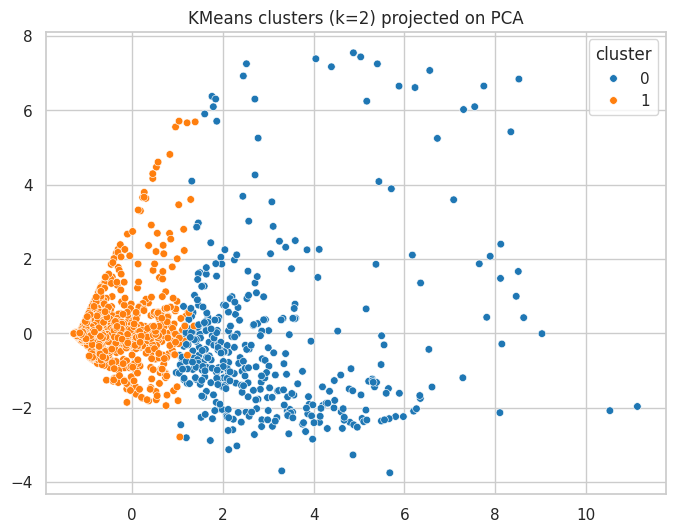

cluster                           0    1
tenure_days              538.000000  0.0
average_practice_marks     8.333333  0.0
num_tests_taken            8.000000  0.0
total_points_earned       91.000000  5.0
total_topic_engagements   17.000000  2.0
unique_topics_count        1.000000  1.0
num_practice_events        4.000000  0.0
average_test_marks        22.062500  0.0
tenure_days              538.000000  0.0
total_points_earned       91.000000  5.0

In [ ]:
# Choose features for clustering (scale them)
cluster_cols = ['tenure_days','average_practice_marks','num_tests_taken',
                'total_points_earned','total_topic_engagements', 'unique_topics_count',
                'num_practice_events', 'average_test_marks']
cluster_cols = [c for c in cluster_cols if c in edf.columns]
Xc = edf[cluster_cols].fillna(0)
Xc = Xc.clip(upper=Xc.quantile(0.99), axis=1)  # cap outliers for clustering
scaler = StandardScaler()
Xc_s = scaler.fit_transform(Xc)

# PCA for visualization
pca = PCA(n_components=2)
pcs = pca.fit_transform(Xc_s)

# find good k via silhouette (k=2..6)
best_k = 3
best_score = -1
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42).fit(Xc_s)
    score = silhouette_score(Xc_s, km.labels_)
    print("k",k,"silhouette",score)
    if score > best_score:
        best_score = score
        best_k = k
km = KMeans(n_clusters=best_k, random_state=42).fit(Xc_s)
edf['cluster'] = km.labels_
plt.figure(figsize=(8,6))
sns.scatterplot(x=pcs[:,0], y=pcs[:,1], hue=edf['cluster'], palette='tab10', s=30)
plt.title(f"KMeans clusters (k={best_k}) projected on PCA")
plt.show()

# Cluster profiling
cluster_profile = edf.groupby('cluster')[cluster_cols + ['tenure_days','total_points_earned']].median().T
cluster_profile


In [ ]:
edf.head()

user_id  country     city          created_at          updated_at  \
0    82117  Unknown  Unknown 2022-12-01 11:47:12 2022-12-01 11:47:12   
1   136454    Ghana    Accra 2023-04-16 08:14:52 2024-11-25 14:00:09   
2   470604    Ghana  Unknown 2020-03-27 15:59:53 2024-11-25 14:00:09   
3   564450    Ghana  Unknown 2020-03-24 20:54:20 2024-11-25 14:00:09   
4   606337    Kenya  Eldoret 2024-01-24 15:22:42 2024-11-25 14:00:09   

        last_activity          last_login                  institute  \
0 2022-12-01 11:47:12 2022-12-01 11:47:12                    Unknown   
1 2023-04-16 08:14:52 2023-04-16 08:14:52                       Tusk   
2 2020-05-04 11:59:51 2020-04-06 03:45:46            Acellus Academy   
3 2020-05-01 01:20:09 2020-05-01 01:17:50  Haavad Senior High School   
4 2024-01-24 15:22:42 2024-01-24 15:22:42        Seregeya Dispensary   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  1.0                     1.0            0.000000   
1                  3.0                     1.0            0.000000   
2                 15.0                    61.0           20.666667   
3                  5.0                     1.0            0.000000   
4                  9.0                     1.0            0.000000   

   num_tests_taken  total_marks_across_tests  average_grade_per_question  \
0              0.0                       0.0                    0.000000   
1              0.0                       0.0                    0.000000   
2              6.0                     124.0                   43.333333   
3              0.0                       0.0                    0.000000   
4              0.0                       0.0                    0.000000   

   total_questions_attempted_in_tests  total_topic_engagements  \
0                                 0.0                      1.0   
1                                 0.0                      1.0   
2                               260.0                     61.0   
3                                 0.0                      1.0   
4                                 0.0                      1.0   

   unique_topics_count  average_engagements_per_topic  \
0                  1.0                            1.0   
1                  1.0                            1.0   
2                  1.0                           61.0   
3                  1.0                            1.0   
4                  1.0                            1.0   

   total_points_earned_agg  average_points_per_event  total_test_marks  \
0                      1.0                  1.000000               0.0   
1                      3.0                  3.000000               0.0   
2                     15.0                  0.245902             124.0   
3                      5.0                  5.000000               0.0   
4                      9.0                  9.000000               0.0   

   average_test_marks_per_test  num_classes_subscribed  is_deleted  \
0                     0.000000                       0           0   
1                     0.000000                       0           0   
2                    20.666667                       4           0   
3                     0.000000                       1           0   
4                     0.000000                       1           0   

   tenure_days created_month   reg_ym last_login_ym subscription_category  \
0          0.0    2022-12-01  2022-12       2022-12             0 Classes   
1          0.0    2023-04-01  2023-04       2023-04             0 Classes   
2         37.0    2020-03-01  2020-03       2020-04             4 Classes   
3         37.0    2020-03-01  2020-03       2020-05               1 Class   
4          0.0    2024-01-01  2024-01       2024-01               1 Class   

  last_activity_ym latest_active_ym  num_listen_events  num_read_events  \
0          2022-12          2022-12                0.0              1.0   
1          2023-04          2023-04     

k 2 silhouette 0.15508008665534756
k 3 silhouette 0.447232457456806
k 4 silhouette 0.22208545348696698
k 5 silhouette 0.23519759716858776
k 6 silhouette 0.24690633053488503


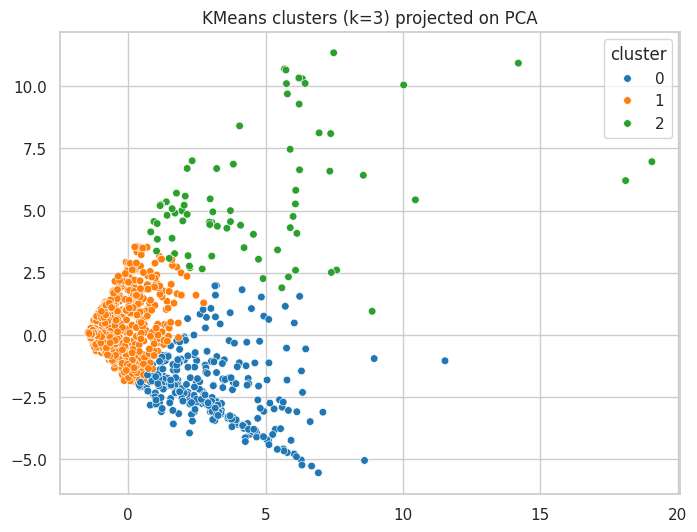

cluster                       0       1            2
num_listen_events           0.0     0.0     1.000000
num_read_events            17.0     1.0     3.000000
num_watch_events            0.0     0.0     3.000000
total_listen_marks          0.0     0.0     2.000000
total_read_marks           30.0     0.0     0.000000
total_watch_marks           0.0     0.0     8.000000
unique_topics_count         1.0     1.0     2.000000
num_practice_events         3.0     1.0     1.000000
tenure_days               805.0     0.0    88.000000
average_practice_marks      5.5     0.0     2.846154
num_tests_taken             9.0     0.0     0.000000
total_topic_engagements    19.0     2.0    13.000000
unique_topics_count         1.0     1.0     2.000000
days_since_last_seen     1191.0  1982.0  1970.000000
average_test_marks         21.6     0.0     0.000000
tenure_days               805.0     0.0    88.000000
total_points_earned        80.0     5.0    39.000000

In [ ]:
# Choose features for clustering (scale them)
cluster_cols = [
                'num_listen_events','num_read_events', 'num_watch_events', 'total_listen_marks',
                'total_read_marks','total_watch_marks', 'unique_topics_count','num_practice_events',
                'tenure_days','average_practice_marks','num_tests_taken',
                'total_topic_engagements', 'unique_topics_count',
                'days_since_last_seen', 'average_test_marks']
cluster_cols = [c for c in cluster_cols if c in edf.columns]
Xc = edf[cluster_cols].fillna(0)
Xc = Xc.clip(upper=Xc.quantile(0.99), axis=1)  # cap outliers for clustering
scaler = StandardScaler()
Xc_s = scaler.fit_transform(Xc)

# PCA for visualization
pca = PCA(n_components=2)
pcs = pca.fit_transform(Xc_s)

# find good k via silhouette (k=2..6)
best_k = 3
best_score = -1
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42).fit(Xc_s)
    score = silhouette_score(Xc_s, km.labels_)
    print("k",k,"silhouette",score)
    if score > best_score:
        best_score = score
        best_k = k
km = KMeans(n_clusters=best_k, random_state=42).fit(Xc_s)
edf['cluster'] = km.labels_
plt.figure(figsize=(8,6))
sns.scatterplot(x=pcs[:,0], y=pcs[:,1], hue=edf['cluster'], palette='tab10', s=30)
plt.title(f"KMeans clusters (k={best_k}) projected on PCA")
plt.show()

# Cluster profiling
cluster_profile = edf.groupby('cluster')[cluster_cols + ['tenure_days','total_points_earned']].median().T
cluster_profile


##13) Save visuals & summary

In [ ]:
#!pip install -U kaleido

# create reports/figures dir if not exists
#os.makedirs("/content/drive/MyDrive/student readiness pilot/reports/figures", exist_ok=True)

# Example: save a chart
#fig.write_image("/content/drive/MyDrive/student readiness pilot/reports/figures/registrations_month.png")  # for plotly fig if used
#plt.savefig("/content/drive/MyDrive/student readiness pilot/reports/figures/points_distribution.png")  # for matplotlib charts

# Save cleaned profile for modelling
edf.to_parquet("/content/drive/MyDrive/student readiness pilot/data/agg_user_profile_clean.parquet", index=False)

edf.to_csv("/content/drive/MyDrive/student readiness pilot/data/agg_user_profile_clean.csv", index=False)


In [ ]:
edf.head()

user_id  country     city          created_at          updated_at  \
0    82117  Unknown  Unknown 2022-12-01 11:47:12 2022-12-01 11:47:12   
1   136454    Ghana    Accra 2023-04-16 08:14:52 2024-11-25 14:00:09   
2   470604    Ghana  Unknown 2020-03-27 15:59:53 2024-11-25 14:00:09   
3   564450    Ghana  Unknown 2020-03-24 20:54:20 2024-11-25 14:00:09   
4   606337    Kenya  Eldoret 2024-01-24 15:22:42 2024-11-25 14:00:09   

        last_activity          last_login                  institute  \
0 2022-12-01 11:47:12 2022-12-01 11:47:12                    Unknown   
1 2023-04-16 08:14:52 2023-04-16 08:14:52                       Tusk   
2 2020-05-04 11:59:51 2020-04-06 03:45:46            Acellus Academy   
3 2020-05-01 01:20:09 2020-05-01 01:17:50  Haavad Senior High School   
4 2024-01-24 15:22:42 2024-01-24 15:22:42        Seregeya Dispensary   

   total_points_earned  number_of_point_events  average_test_marks  \
0                  1.0                     1.0            0.000000   
1                  3.0                     1.0            0.000000   
2                 15.0                    61.0           20.666667   
3                  5.0                     1.0            0.000000   
4                  9.0                     1.0            0.000000   

   num_tests_taken  total_marks_across_tests  average_grade_per_question  \
0              0.0                       0.0                    0.000000   
1              0.0                       0.0                    0.000000   
2              6.0                     124.0                   43.333333   
3              0.0                       0.0                    0.000000   
4              0.0                       0.0                    0.000000   

   total_questions_attempted_in_tests  total_topic_engagements  \
0                                 0.0                      1.0   
1                                 0.0                      1.0   
2                               260.0                     61.0   
3                                 0.0                      1.0   
4                                 0.0                      1.0   

   unique_topics_count  average_engagements_per_topic  \
0                  1.0                            1.0   
1                  1.0                            1.0   
2                  1.0                           61.0   
3                  1.0                            1.0   
4                  1.0                            1.0   

   total_points_earned_agg  average_points_per_event  total_test_marks  \
0                      1.0                  1.000000               0.0   
1                      3.0                  3.000000               0.0   
2                     15.0                  0.245902             124.0   
3                      5.0                  5.000000               0.0   
4                      9.0                  9.000000               0.0   

   average_test_marks_per_test  num_classes_subscribed  is_deleted  \
0                     0.000000                       0           0   
1                     0.000000                       0           0   
2                    20.666667                       4           0   
3                     0.000000                       1           0   
4                     0.000000                       1           0   

   tenure_days created_month   reg_ym last_login_ym subscription_category  \
0          0.0    2022-12-01  2022-12       2022-12             0 Classes   
1          0.0    2023-04-01  2023-04       2023-04             0 Classes   
2         37.0    2020-03-01  2020-03       2020-04             4 Classes   
3         37.0    2020-03-01  2020-03       2020-05               1 Class   
4          0.0    2024-01-01  2024-01       2024-01               1 Class   

  last_activity_ym latest_active_ym  num_listen_events  num_read_events  \
0          2022-12          2022-12                0.0              1.0   
1          2023-04          2023-04     

##14) Next steps & actionable insights to produce (what to hand to stakeholders)

In [ ]:
# Notebook scanner - run this in the same environment where your notebook file is stored (e.g. Colab)
# It will summarize code/markdown cells and list occurrences of table loads (read_csv/read_sql)
import nbformat, re, json, os
from pathlib import Path

nb_path = "/mnt/data/eda_core_user_profile 1028.ipynb"   # adjust if your filename/path differs
if not Path(nb_path).exists():
    print("Notebook not found at:", nb_path)
else:
    nb = nbformat.read(nb_path, as_version=4)
    print("Notebook loaded:", nb_path)
    print("Total cells:", len(nb.cells))
    print("\n--- Markdown headings found ---")
    for i,cell in enumerate(nb.cells):
        if cell.cell_type == 'markdown':
            lines = cell.source.splitlines()
            for line in lines:
                if line.strip().startswith('#'):
                    print(f"cell {i}: {line.strip()}")
    print("\n--- Code cells summary (first line + key finds) ---")
    read_ops = []
    df_names = set()
    for i,cell in enumerate(nb.cells):
        if cell.cell_type == 'code':
            src = cell.source
            first_line = src.strip().splitlines()[0] if src.strip() else "<empty>"
            # find read_csv / read_sql / pd.read_sql / read_parquet / pd.read_parquet
            found = []
            for pat in [r"pd\.read_csv\(", r"pd\.read_sql\(", r"read_sql\(", r"pd\.read_parquet\(", r"pd\.read_table\(", r"engine = create_engine", r"pd\.to_csv\(", r"to_parquet\("]:
                if re.search(pat, src):
                    found.append(pat)
            # find any table names mentioned (common interest tables)
            table_candidates = ["users","class_answers","class_questions","class_contents","class_resources",
                                "class_subscribers","class_subscriptions","classes","test_answers","test_classes",
                                "test_questions","test_results","test_takers","tests","points"]
            mentions = [t for t in table_candidates if re.search(rf"\b{t}\b", src)]
            # find dataframe variable assignments like df = pd.read_csv(...) or users_df = ...
            assigns = re.findall(r"([A-Za-z0-9_]+)\s*=\s*pd\.read_(?:csv|parquet|sql)\(", src)
            for a in assigns:
                df_names.add(a)
            # print summary
            print(f"cell {i}: {first_line[:180]}")
            if found: print("  -> read ops:", found)
            if mentions: print("  -> mentions:", mentions)
            if assigns: print("  -> df vars:", assigns)
    print("\n--- DataFrame variable names detected in code cells ---")
    print(sorted(list(df_names)))

    # If the notebook was executed in this same runtime, attempt to inspect DataFrames in globals()
    try:
        import sys, pandas as pd
        g = globals()
        present = []
        for name in sorted(list(df_names)):
            if name in g and isinstance(g[name], pd.DataFrame):
                present.append(name)
        if present:
            print("\nThe following DataFrames are present in the current runtime (shapes and columns):")
            for name in present:
                df = g[name]
                print(f"\n== {name} == shape: {df.shape}")
                print(df.columns.tolist()[:200])
        else:
            print("\nNo matching DataFrame objects found in current runtime. If you executed the notebook separately, rerun it or copy its DataFrame.head() outputs here.")
    except Exception as e:
        print("Runtime inspection not available:", e)

    # Suggest next step
    print("\n--- NEXT STEP ---")
    print("Paste the output above here. If it lists DataFrame variables and shapes, tell me which DataFrame(s) you want me to focus on (e.g., class_answers_df).")


## Summary of Key EDA Findings

Based on the exploratory data analysis conducted:

1.  **Data Availability and Engagement:**
    *   A significant portion of the over 42,000 users in the test dataset do not have recorded activity in the `points` or `test_takers` tables, suggesting potentially low engagement in this test environment or data collection gaps.
    *   Focusing the analysis on 'engaged users' (those with at least 1 point earned) reduced the dataset significantly to around 2,100 users, indicating the sparsity of engagement data in the current sample.

2.  **User Demographics and Location:**
    *   The majority of engaged users are located in Ghana, followed by Nigeria and India.
    *   A substantial number of users have 'Unknown' values for their city, highlighting a need for improved data collection in this area.
    *   Case variations in city names were observed and standardized.

3.  **Retention Analysis:**
    *   Cohort analysis using 'last_login' showed rapid retention drop-off and significant missing data in this column, particularly for users with '0 Classes' subscribed.
    *   A refined retention analysis using the latest of 'last_login' or 'last_activity' as the activity timestamp provided a broader view of user activity and showed retention curves for users with more subscribed classes.
    *   Users who subscribed to more classes demonstrate significantly higher average retention rates compared to those with fewer or no subscribed classes. This is a critical business insight for encouraging subscriptions early in the user journey.

4.  **Engagement Depth and Content Consumption:**
    *   Analysis of content consumption (Read, Watch, Listen) from points data showed distributions of event counts and marks earned, indicating varying levels and types of content interaction among engaged users.

5.  **Practice and Test Performance:**
    *   Practice points analysis revealed metrics like the number of practice events, average practice marks, and total practice marks.
    *   Analysis of test performance using `test_takers` and `tests` data provided insights into average test scores and pass rates for different tests among engaged users.

6.  **Churn and Risk (Initial Look):**
    *   A basic churn rate based on 90 days of inactivity (using `days_since_last_seen`, if available and calculated) was computed.
    *   An initial look at churn by subscription type was performed (if the column existed), suggesting potential differences in churn behavior based on subscription status.

7.  **Correlations and Feature Importance:**
    *   A correlation heatmap for numeric features was generated to identify initial relationships between different metrics.
    *   A quick XGBoost baseline was attempted (if a 'latest_test_pass' column existed and was suitable as a label) to provide a preliminary look at potential feature importance for predicting a test outcome.

8.  **Clustering:**
    *   Clustering was performed on selected engagement features to identify distinct user segments based on their behavior, visualizing these clusters on a PCA projection and profiling them based on median feature values.

**Actionable Insights & Next Steps:**

*   **Prioritize Subscription Promotion:** The strong correlation between the number of subscribed classes and retention highlights the importance of encouraging users to subscribe early. Business teams should explore incentives or product changes to drive initial subscriptions.
*   **Investigate Low Engagement/Missing Data:** The large number of users with no recorded activity in the test environment needs investigation. Understanding if this is a data issue, a test environment limitation, or reflects a real-world drop-off point is crucial. For production, ensure robust activity tracking.
*   **Deep Dive into '0 Class' Users:** A significant portion of the user base falls into the '0 Classes' category and shows low retention and high rates of missing activity data. Further analysis is needed to understand why they are not subscribing or engaging. Targeted interventions or onboarding flows could be designed for this segment.
*   **Leverage Practice Data:** The analysis of practice events and scores provides valuable signals for exam readiness. Further explore the relationship between practice behavior (frequency, scores, improvement) and test outcomes.
*   **Address Low Pass Rate Topics/Tests:** Identify tests or topics with consistently low pass rates. This could indicate challenging content that requires review, improved resources, or different teaching approaches.
*   **Refine Churn Definition and Prediction:** With real production data, refine the churn definition based on business goals and build predictive models to identify users at risk of churning.
*   **Develop Early Warning Signals:** Based on EDA findings and clustering, define simple heuristics (e.g., low points earned within the first month, no practice attempts after a certain period) to identify at-risk users for early intervention or nudges.
*   **Utilize the Cleaned Data:** The `user_profile_clean.parquet` dataset provides a solid base for building predictive models and conducting deeper segmented analysis.
*   **Present Key Insights:** Synthesize the top 10 business insights and recommendations based on these findings for stakeholders. Use visualizations like the retention curves and cluster profiles to communicate key messages effectively.

- Top 10 business insights (one-pager): e.g., cohorts with low pass rates, top 5 topics needing content fixes, churn drivers.

- Funnel conversion rates (registered → practiced → tested → passed) with recommendations to address top drop-offs.

- Cluster descriptions (e.g., “Cluster A: high practice, high points, high pass rate — model target group for upsell”).

- Early-warning rules (heuristics) you can implement before model ready (e.g., users with <2 practices in 14 days + tenure >90 days → nudge).

- Save user_profile_clean.parquet as the basis for future aggregated feature engineering and the 500-student pilot.

## Summary of Key Findings by Section

### 2) Quick data QA & further cleaning Findings

*   **Data Sparsity:** A significant number of users in the dataset have missing values in key engagement metrics (like points earned, tests taken), indicating that a large portion of the user base may not be actively engaging in these activities in the test environment, or there are data collection issues.
*   **Missing Demographic Data:** Several demographic fields (like first/last name, phone number) also have a high number of missing values, which limits the ability to perform detailed segmentation based on these attributes.
*   **Date Field Issues:** Date fields like `email_verified_at` and `logged_in_at` are almost entirely null, impacting the ability to track user activation and login frequency.
*   **Data Cleaning Steps:** We performed steps to standardize column names, handle null values (imputing 'Unknown' for some text fields, dropping rows with missing key IDs), convert dates, and standardize categorical text.
*   **Engaged User Subset:** We created a subset DataFrame (`edf`) focusing on users with at least 1 point earned, which significantly reduced the dataset size and allows for analysis of more active users, but also highlights the low proportion of engaged users in the overall test dataset.

### 3) Summary demographics & profile KPIs

*   **Geographical Distribution:** The majority of engaged users are primarily from Ghana, with smaller numbers from Nigeria and other countries.
*   **City Data Challenges:** While Ghana is the main country, the city data still contains a high number of 'Unknown' values and inconsistencies that required standardization.
*   **User Tenure:** We calculated the `tenure_days` (days since creation to last activity), and the distribution of this metric shows varying user lifespans on the platform.
*   **Subscription Categories:** We categorized users based on the number of classes they subscribed to, identifying distinct groups (e.g., '0 Classes', '1 Class', '5+ Classes').

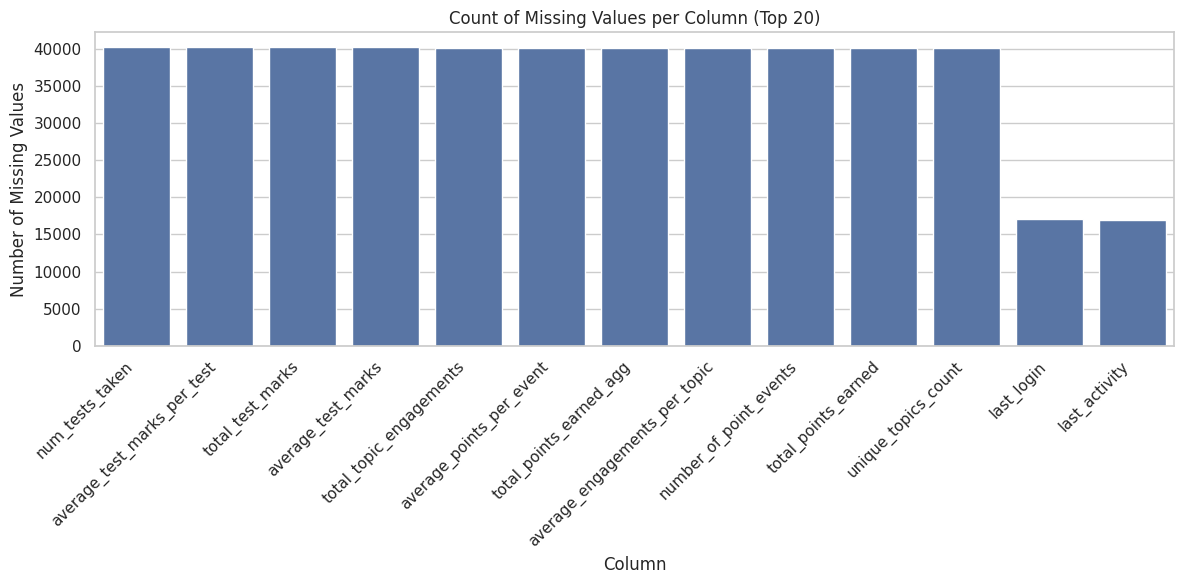

In [ ]:
# Visualization for "Quick data QA & further cleaning Findings":
# Bar plot showing the count of missing values for key columns in the df DataFrame

# Use the data quality report 'dq' generated in cell ec-obCGgMpDS
if 'dq' in globals():
    # Filter for columns with missing values and select the top N for clarity if needed
    dq_missing = dq[dq['n_null'] > 0].head(20) # Displaying top 20 columns with most missing values

    plt.figure(figsize=(12, 6))
    sns.barplot(x='column', y='n_null', data=dq_missing)
    plt.title('Count of Missing Values per Column (Top 20)')
    plt.xlabel('Column')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Data quality report 'dq' not found. Please run cell ec-obCGgMpDS to generate it.")

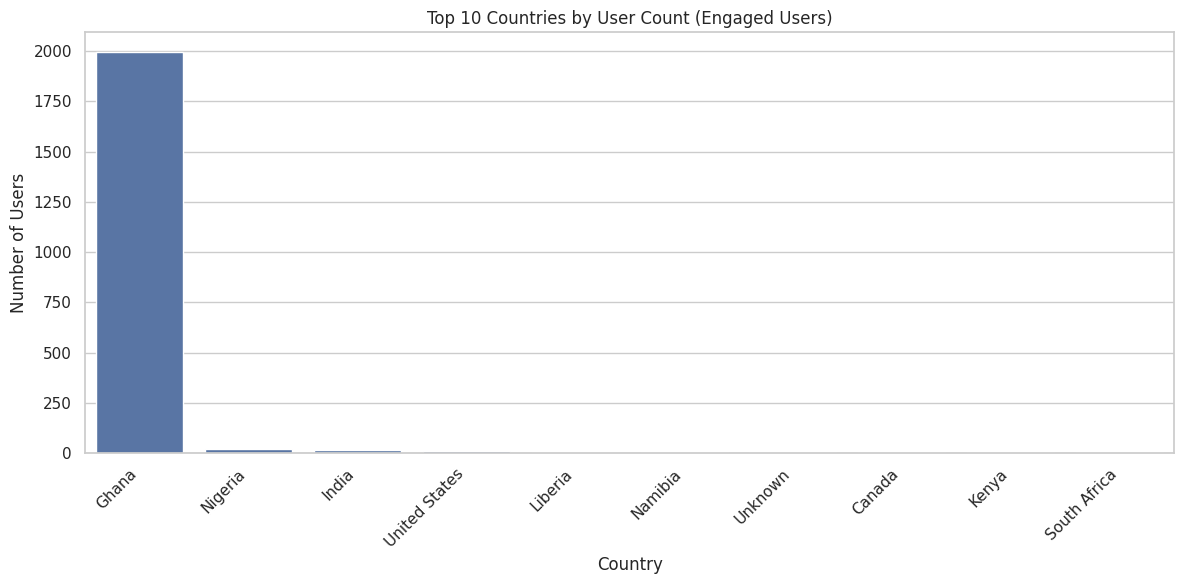

In [ ]:
# Visualizations for "Summary demographics & profile KPIs":

# Bar plot showing the distribution of users by country
# Use the data 'country_counts_standardized' generated in cell 08246d64
if 'country_counts_standardized' in globals():
    plt.figure(figsize=(12, 6))
    sns.barplot(x='country', y='count', data=country_counts_standardized.head(10)) # Displaying top 10 countries
    plt.title('Top 10 Countries by User Count (Engaged Users)')
    plt.xlabel('Country')
    plt.ylabel('Number of Users')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Country counts data 'country_counts_standardized' not found. Please run cell 08246d64 to generate it.")

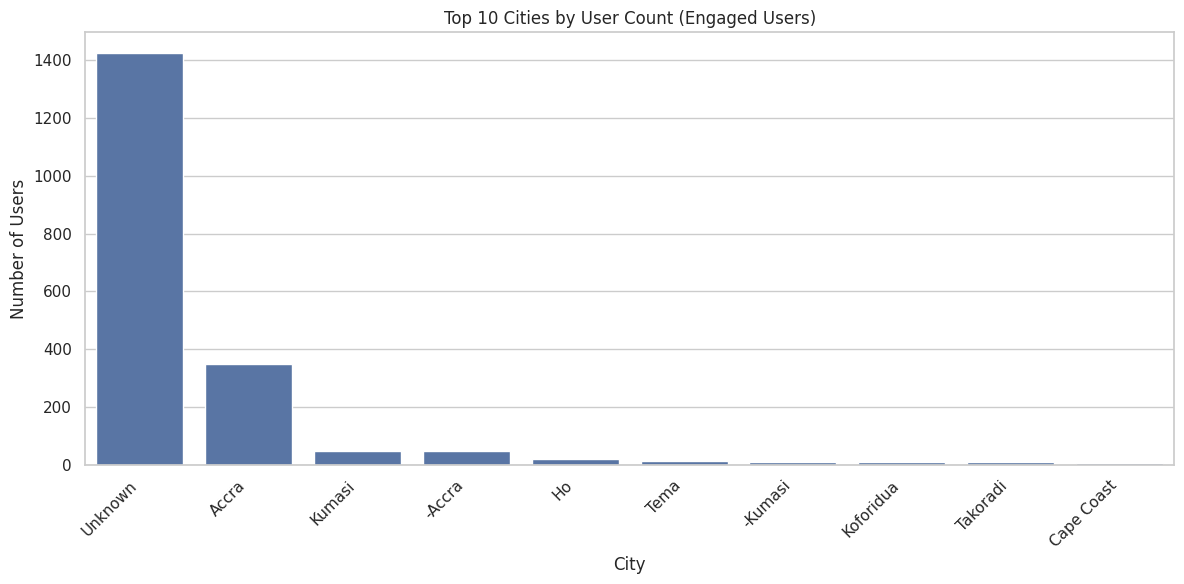

In [ ]:
# Bar plot showing the distribution of users by the top cities
# Use the data 'city_counts_standardized_further' generated in cell 04734942
if 'city_counts_standardized_further' in globals():
    plt.figure(figsize=(12, 6))
    sns.barplot(x='city', y='count', data=city_counts_standardized_further.head(10)) # Displaying top 10 cities
    plt.title('Top 10 Cities by User Count (Engaged Users)')
    plt.xlabel('City')
    plt.ylabel('Number of Users')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ City counts data 'city_counts_standardized_further' not found. Please run cell 04734942 to generate it.")

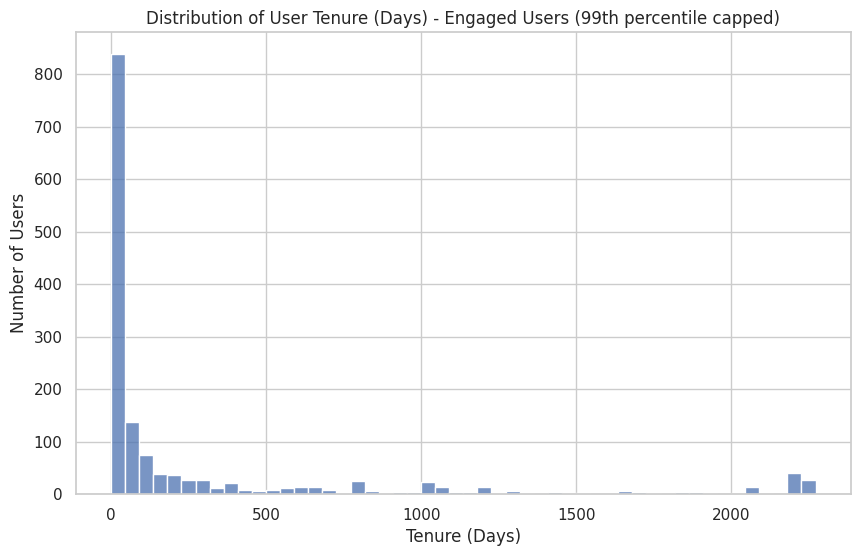

In [ ]:
# Histogram showing the distribution of user tenure in days
# Use the 'edf' DataFrame and 'tenure_days' column, as plotted in cell wm0JIU8ONraO
if 'edf' in globals() and 'tenure_days' in edf.columns:
    plt.figure(figsize=(10, 6))
    # Clip outliers for a clearer plot, and handle NaNs
    sns.histplot(edf['tenure_days'].dropna().clip(upper=edf['tenure_days'].quantile(0.99)), bins=50)
    plt.title('Distribution of User Tenure (Days) - Engaged Users (99th percentile capped)')
    plt.xlabel('Tenure (Days)')
    plt.ylabel('Number of Users')
    plt.show()
else:
    print("⚠️ edf DataFrame or 'tenure_days' column not found. Please ensure cell wm0JIU8ONraO or earlier cells are run.")

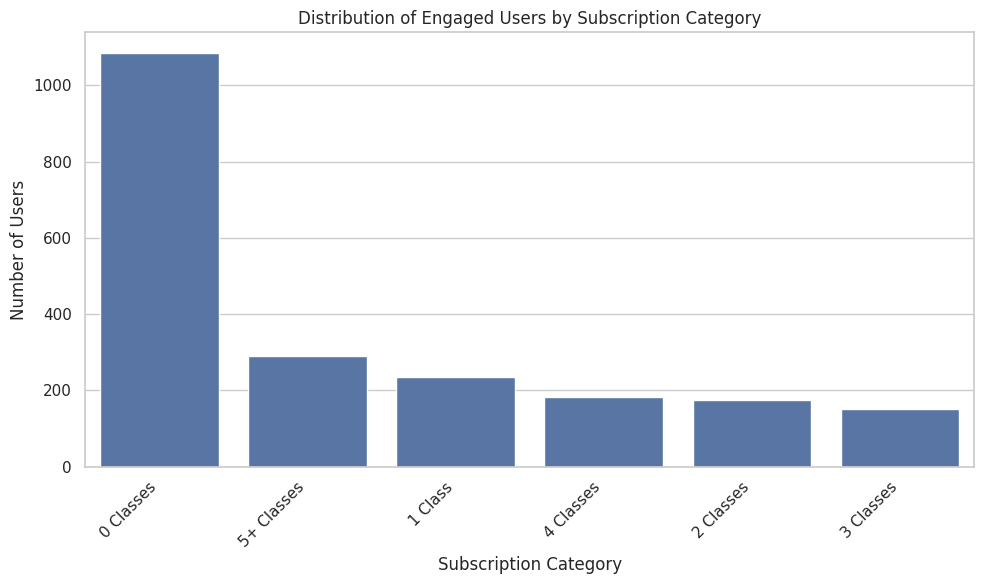

In [ ]:
# Bar plot showing the distribution of users across the subscription_category categories
# Use the 'edf' DataFrame and 'subscription_category' column, as shown in cell 6cadb634
if 'edf' in globals() and 'subscription_category' in edf.columns:
    subscription_category_counts = edf['subscription_category'].value_counts().reset_index()
    subscription_category_counts.columns = ['subscription_category', 'count']

    plt.figure(figsize=(10, 6))
    sns.barplot(x='subscription_category', y='count', data=subscription_category_counts.sort_values('count', ascending=False))
    plt.title('Distribution of Engaged Users by Subscription Category')
    plt.xlabel('Subscription Category')
    plt.ylabel('Number of Users')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ edf DataFrame or 'subscription_category' column not found. Please ensure cell 6cadb634 or earlier cells are run.")